In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))



---


#**Data Extraction from various sources**


---



In [ ]:
import glob
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = '/kaggle/input/betting'

# Get a list of CSV file paths in the folder
csv_files = glob.glob(folder_path + '/*.csv')

# Initialize an empty list to store the dataframes
dfs = []

# Read and append each CSV file to the list of dataframes
for file in csv_files:
    # Extract the year from the filename (assuming the filename is in the format 'YYYY.csv')
    year = int(file.split('/')[-1].split('.')[0])

    # Read the CSV file and add a 'Year' column with the extracted year
    df = pd.read_csv(file)
    df['Year'] = year

    # Append the dataframe to the list
    dfs.append(df)

# Concatenate the dataframes vertically
combined_df = pd.concat(dfs, ignore_index=True)



In [ ]:
combined_df

Div        Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0     E0    18/08/12     Arsenal   Sunderland   0.0   0.0   D   0.0   0.0   D   
1     E0    18/08/12      Fulham      Norwich   5.0   0.0   H   2.0   0.0   H   
2     E0    18/08/12   Newcastle    Tottenham   2.0   1.0   H   0.0   0.0   D   
3     E0    18/08/12         QPR      Swansea   0.0   5.0   A   0.0   1.0   A   
4     E0    18/08/12     Reading        Stoke   1.0   1.0   D   0.0   1.0   A   
...   ..         ...         ...          ...   ...   ...  ..   ...   ...  ..   
4176  E0  15/05/2016       Stoke     West Ham   2.0   1.0   H   0.0   1.0   A   
4177  E0  15/05/2016     Swansea     Man City   1.0   1.0   D   1.0   1.0   D   
4178  E0  15/05/2016     Watford   Sunderland   2.0   2.0   D   0.0   1.0   A   
4179  E0  15/05/2016   West Brom    Liverpool   1.0   1.0   D   1.0   1.0   D   
4180  E0  17/05/2016  Man United  Bournemouth   3.0   1.0   H   1.0   0.0   H   

      ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  \
0     ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
1     ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
2     ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
3     ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
4     ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
...   ...      ...   ...       ...       ...    ...    ...      ...      ...   
4176  ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
4177  ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
4178  ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
4179  ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   
4180  ...      NaN   NaN       NaN       NaN    NaN    NaN      NaN      NaN   

      AvgCAHH  AvgCAHA  
0         NaN      NaN  
1         NaN      NaN  
2         NaN      NaN  
3         NaN      NaN  
4         NaN      NaN  
...       ...      ...  
4176      NaN      NaN  
4177      NaN      NaN  
4178      NaN      NaN  
4179      NaN      NaN  
4180      NaN      NaN  

[4181 rows x 137 columns]

In [ ]:
# Extracting matchweek and season information from another dataframe

mw=pd.read_csv("/kaggle/input/premier-league-matches-19922022/premier-league-matches.csv")

In [ ]:
combined_df['Year'].value_counts()

Year
2015    381
2013    380
2014    380
2021    380
2017    380
2019    380
2020    380
2023    380
2018    380
2022    380
2016    380
Name: count, dtype: int64

In [ ]:
# Extracting team rating data

rating = pd.read_csv("/kaggle/input/rating/rating_csv.csv")

In [ ]:
rating.sample(5)

Name  Overall  Attack  Midfield  Defence  Year
149         Newcastle United        76      77        77       76  2016
47   Wolverhampton Wanderers        79      80        82       77  2021
194              Southampton        74      78        73       71  2014
148             Swansea City        77      76        75       76  2016
161          Manchester City        82      83        82       81  2015

## **Concatenating MatchWeek number and Year**

In [ ]:
# observing the matchweek dataset

mw

Season_End_Year  Wk        Date            Home  HomeGoals  AwayGoals  \
0                 1993   1  1992-08-15   Coventry City          2          1   
1                 1993   1  1992-08-15    Leeds United          2          1   
2                 1993   1  1992-08-15   Sheffield Utd          2          1   
3                 1993   1  1992-08-15  Crystal Palace          3          3   
4                 1993   1  1992-08-15         Arsenal          2          4   
...                ...  ..         ...             ...        ...        ...   
12021             2023  38  2023-05-28         Everton          1          0   
12022             2023  38  2023-05-28  Leicester City          2          1   
12023             2023  38  2023-05-28     Aston Villa          2          1   
12024             2023  38  2023-05-28    Leeds United          1          4   
12025             2023  38  2023-05-28       Brentford          1          0   

                  Away FTR  
0        Middlesbrough   H  
1            Wimbledon   H  
2       Manchester Utd   H  
3            Blackburn   D  
4         Norwich City   A  
...                ...  ..  
12021      Bournemouth   H  
12022         West Ham   H  
12023         Brighton   H  
12024        Tottenham   A  
12025  Manchester City   H  

[12026 rows x 8 columns]

In [ ]:
# Obtaining the unique year values in the 'combined_data' dataset (team properties)

y_value=combined_df['Year'].unique().tolist()

In [ ]:
# Observing the value counts of year values

combined_df['Year'].value_counts()

Year
2015    381
2013    380
2014    380
2021    380
2017    380
2019    380
2020    380
2023    380
2018    380
2022    380
2016    380
Name: count, dtype: int64

In [ ]:
# Extracting the available match week number data for the season under consideration

mw_pl = mw[mw['Season_End_Year'].isin(y_value)][['Season_End_Year', 'Date', 'Home', 'Away', 'Wk']]

In [ ]:
# Observing the selected season's matchweek dataset

mw_pl

Season_End_Year        Date            Home             Away  Wk
7846              2013  2012-08-18         Arsenal       Sunderland   1
7847              2013  2012-08-18          Fulham     Norwich City   1
7848              2013  2012-08-18   Newcastle Utd        Tottenham   1
7849              2013  2012-08-18       West Brom        Liverpool   1
7850              2013  2012-08-18        West Ham      Aston Villa   1
...                ...         ...             ...              ...  ..
12021             2023  2023-05-28         Everton      Bournemouth  38
12022             2023  2023-05-28  Leicester City         West Ham  38
12023             2023  2023-05-28     Aston Villa         Brighton  38
12024             2023  2023-05-28    Leeds United        Tottenham  38
12025             2023  2023-05-28       Brentford  Manchester City  38

[4180 rows x 5 columns]

In [ ]:
# length of the dataset considered for building the model

len(mw_pl)

4180

In [ ]:
# copying values of combined csv files into a new dataframe 'pl'

pl = combined_df

In [ ]:
# Team names appearing over various seasons in the dataset

pl['HomeTeam'].unique()

array(['Arsenal', 'Fulham', 'Newcastle', 'QPR', 'Reading', 'West Brom',
       'West Ham', 'Man City', 'Wigan', 'Everton', 'Chelsea',
       'Aston Villa', 'Man United', 'Norwich', 'Southampton', 'Swansea',
       'Tottenham', 'Liverpool', 'Stoke', 'Sunderland', 'Leicester',
       'Burnley', 'Crystal Palace', 'Hull', nan, 'Cardiff', 'Brighton',
       'Sheffield United', 'Leeds', 'Wolves', 'Middlesbrough',
       'Bournemouth', 'Watford', 'Huddersfield', 'Brentford',
       "Nott'm Forest"], dtype=object)

In [ ]:
pl['Year'].value_counts()

Year
2015    381
2013    380
2014    380
2021    380
2017    380
2019    380
2020    380
2023    380
2018    380
2022    380
2016    380
Name: count, dtype: int64

In [ ]:

pl = pl.sort_values(by=['Year']).groupby(['HomeTeam','AwayTeam']).apply(lambda x: x.reset_index(drop=True))

In [ ]:
pl

Div        Date HomeTeam     AwayTeam  FTHG  FTAG FTR  \
HomeTeam AwayTeam                                                              
Arsenal  Aston Villa 0  E0    23/02/13  Arsenal  Aston Villa   2.0   1.0   H   
                     1  E0    17/08/13  Arsenal  Aston Villa   1.0   3.0   A   
                     2  E0    01/02/15  Arsenal  Aston Villa   5.0   0.0   H   
                     3  E0  15/05/2016  Arsenal  Aston Villa   4.0   0.0   H   
                     4  E0  22/09/2019  Arsenal  Aston Villa   3.0   2.0   H   
...                     ..         ...      ...          ...   ...   ...  ..   
Wolves   West Ham    0  E0  29/01/2019   Wolves     West Ham   3.0   0.0   H   
                     1  E0  04/12/2019   Wolves     West Ham   2.0   0.0   H   
                     2  E0  05/04/2021   Wolves     West Ham   2.0   3.0   A   
                     3  E0  20/11/2021   Wolves     West Ham   1.0   0.0   H   
                     4  E0  14/01/2023   Wolves     West Ham   1.0   0.0   H   

                        HTHG  HTAG HTR  ... AvgC<2.5  AHCh  B365CAHH  \
HomeTeam AwayTeam                       ...                            
Arsenal  Aston Villa 0   1.0   0.0   H  ...      NaN   NaN       NaN   
                     1   1.0   1.0   D  ...      NaN   NaN       NaN   
                     2   1.0   0.0   H  ...      NaN   NaN       NaN   
                     3   1.0   0.0   H  ...      NaN   NaN       NaN   
                     4   0.0   1.0   A  ...     2.95 -1.25      1.97   
...                      ...   ...  ..  ...      ...   ...       ...   
Wolves   West Ham    0   0.0   0.0   D  ...      NaN   NaN       NaN   
                     1   1.0   0.0   H  ...     2.03 -0.75      1.88   
                     2   1.0   3.0   A  ...     1.64  0.00      2.03   
                     3   0.0   0.0   D  ...     1.85  0.25      1.81   
                     4   0.0   0.0   D  ...     1.66 -0.25      2.11   

                        B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  \
HomeTeam AwayTeam                                                           
Arsenal  Aston Villa 0       NaN    NaN    NaN      NaN      NaN      NaN   
                     1       NaN    NaN    NaN      NaN      NaN      NaN   
                     2       NaN    NaN    NaN      NaN      NaN      NaN   
                     3       NaN    NaN    NaN      NaN      NaN      NaN   
                     4      1.96   1.94   2.00     1.99     2.05     1.91   
...                          ...    ...    ...      ...      ...      ...   
Wolves   West Ham    0       NaN    NaN    NaN      NaN      NaN      NaN   
                     1      2.05   1.88   2.05     1.95     2.06     1.87   
                     2      1.90   2.02   1.90     2.08     2.01     2.01   
                     3      2.09   1.84   2.10     1.93     2.13     1.83   
                     4      1.82   2.15   1.80     2.19     1.84     2.13   

                        AvgCAHA  
HomeTeam AwayTeam                
Arsenal  Aston Villa 0      NaN  
                     1      NaN  
                     2      NaN  
                     3      NaN  
                     4     1.99  
...                         ...  
Wolves   West Ham    0      NaN  
                     1     2.01  
                     2     1.87  
                     3     2.06  
                     4     1.77  

[4180 rows x 137 columns]

In [ ]:
# Convert 'Date' column to datetime format

mw_pl['Date'] = pd.to_datetime(mw_pl['Date'], format='%Y-%m-%d')


In [ ]:
# Sort the values in Alphabetical order of Home Team and Away Team

mw_pl=mw_pl.sort_values(by=['Season_End_Year']).groupby(['Home','Away']).apply(lambda x: x.reset_index(drop=True))
mw_pl

Season_End_Year       Date     Home         Away  Wk
Home    Away                                                               
Arsenal Aston Villa 0             2013 2013-02-23  Arsenal  Aston Villa  27
                    1             2014 2013-08-17  Arsenal  Aston Villa   1
                    2             2015 2015-02-01  Arsenal  Aston Villa  23
                    3             2016 2016-05-15  Arsenal  Aston Villa  38
                    4             2020 2019-09-22  Arsenal  Aston Villa   6
...                                ...        ...      ...          ...  ..
Wolves  West Ham    0             2019 2019-01-29   Wolves     West Ham  24
                    1             2020 2019-12-04   Wolves     West Ham  15
                    2             2021 2021-04-05   Wolves     West Ham  30
                    3             2022 2021-11-20   Wolves     West Ham  12
                    4             2023 2023-01-14   Wolves     West Ham  20

[4180 rows x 5 columns]

In [ ]:
pl = pl.reset_index(drop=True)
mw_pl = mw_pl.reset_index(drop=True)

# Copy the matchweek number and year value to create a new feature in 'pl' dataset

pl['MW'] = mw_pl['Wk']
pl['Date'] = mw_pl['Date']

In [ ]:
# Observing the premier league (pl) dataset with matchweek and season information added

pl

Div       Date HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0     E0 2013-02-23  Arsenal  Aston Villa   2.0   1.0   H   1.0   0.0   H   
1     E0 2013-08-17  Arsenal  Aston Villa   1.0   3.0   A   1.0   1.0   D   
2     E0 2015-02-01  Arsenal  Aston Villa   5.0   0.0   H   1.0   0.0   H   
3     E0 2016-05-15  Arsenal  Aston Villa   4.0   0.0   H   1.0   0.0   H   
4     E0 2019-09-22  Arsenal  Aston Villa   3.0   2.0   H   0.0   1.0   A   
...   ..        ...      ...          ...   ...   ...  ..   ...   ...  ..   
4175  E0 2019-01-29   Wolves     West Ham   3.0   0.0   H   0.0   0.0   D   
4176  E0 2019-12-04   Wolves     West Ham   2.0   0.0   H   1.0   0.0   H   
4177  E0 2021-04-05   Wolves     West Ham   2.0   3.0   A   1.0   3.0   A   
4178  E0 2021-11-20   Wolves     West Ham   1.0   0.0   H   0.0   0.0   D   
4179  E0 2023-01-14   Wolves     West Ham   1.0   0.0   H   0.0   0.0   D   

      ...  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  \
0     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
1     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
2     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
3     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
4     ... -1.25      1.97      1.96   1.94   2.00     1.99     2.05     1.91   
...   ...   ...       ...       ...    ...    ...      ...      ...      ...   
4175  ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
4176  ... -0.75      1.88      2.05   1.88   2.05     1.95     2.06     1.87   
4177  ...  0.00      2.03      1.90   2.02   1.90     2.08     2.01     2.01   
4178  ...  0.25      1.81      2.09   1.84   2.10     1.93     2.13     1.83   
4179  ... -0.25      2.11      1.82   2.15   1.80     2.19     1.84     2.13   

      AvgCAHA  MW  
0         NaN  27  
1         NaN   1  
2         NaN  23  
3         NaN  38  
4        1.99   6  
...       ...  ..  
4175      NaN  24  
4176     2.01  15  
4177     1.87  30  
4178     2.06  12  
4179     1.77  20  

[4180 rows x 138 columns]

In [ ]:
# Checking for null values in MW column of the dataset

pl['MW'].isna().value_counts()

MW
False    4180
Name: count, dtype: int64

In [ ]:
# Observing number of match data available in each season of the dataset

pl['Year'].value_counts()

Year
2013    380
2014    380
2015    380
2016    380
2020    380
2021    380
2022    380
2023    380
2017    380
2018    380
2019    380
Name: count, dtype: int64

In [ ]:
# Observing the number of matches in each matchweek in the entire dataset

mw_pl['Wk'].value_counts()

Wk
27    110
29    110
2     110
12    110
20    110
24    110
17    110
34    110
35    110
33    110
1     110
11    110
21    110
14    110
16    110
25    110
31    110
3     110
18    110
22    110
10    110
36    110
23    110
38    110
6     110
8     110
9     110
5     110
19    110
13    110
4     110
28    110
26    110
7     110
37    110
15    110
32    110
30    110
Name: count, dtype: int64

In [ ]:
pl['MW'].value_counts()

MW
27    110
29    110
2     110
12    110
20    110
24    110
17    110
34    110
35    110
33    110
1     110
11    110
21    110
14    110
16    110
25    110
31    110
3     110
18    110
22    110
10    110
36    110
23    110
38    110
6     110
8     110
9     110
5     110
19    110
13    110
4     110
28    110
26    110
7     110
37    110
15    110
32    110
30    110
Name: count, dtype: int64

In [ ]:
pl

Div       Date HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0     E0 2013-02-23  Arsenal  Aston Villa   2.0   1.0   H   1.0   0.0   H   
1     E0 2013-08-17  Arsenal  Aston Villa   1.0   3.0   A   1.0   1.0   D   
2     E0 2015-02-01  Arsenal  Aston Villa   5.0   0.0   H   1.0   0.0   H   
3     E0 2016-05-15  Arsenal  Aston Villa   4.0   0.0   H   1.0   0.0   H   
4     E0 2019-09-22  Arsenal  Aston Villa   3.0   2.0   H   0.0   1.0   A   
...   ..        ...      ...          ...   ...   ...  ..   ...   ...  ..   
4175  E0 2019-01-29   Wolves     West Ham   3.0   0.0   H   0.0   0.0   D   
4176  E0 2019-12-04   Wolves     West Ham   2.0   0.0   H   1.0   0.0   H   
4177  E0 2021-04-05   Wolves     West Ham   2.0   3.0   A   1.0   3.0   A   
4178  E0 2021-11-20   Wolves     West Ham   1.0   0.0   H   0.0   0.0   D   
4179  E0 2023-01-14   Wolves     West Ham   1.0   0.0   H   0.0   0.0   D   

      ...  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  \
0     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
1     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
2     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
3     ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
4     ... -1.25      1.97      1.96   1.94   2.00     1.99     2.05     1.91   
...   ...   ...       ...       ...    ...    ...      ...      ...      ...   
4175  ...   NaN       NaN       NaN    NaN    NaN      NaN      NaN      NaN   
4176  ... -0.75      1.88      2.05   1.88   2.05     1.95     2.06     1.87   
4177  ...  0.00      2.03      1.90   2.02   1.90     2.08     2.01     2.01   
4178  ...  0.25      1.81      2.09   1.84   2.10     1.93     2.13     1.83   
4179  ... -0.25      2.11      1.82   2.15   1.80     2.19     1.84     2.13   

      AvgCAHA  MW  
0         NaN  27  
1         NaN   1  
2         NaN  23  
3         NaN  38  
4        1.99   6  
...       ...  ..  
4175      NaN  24  
4176     2.01  15  
4177     1.87  30  
4178     2.06  12  
4179     1.77  20  

[4180 rows x 138 columns]

## **Adding rating values to `HomeTeam` and `AwayTeam` from `rating` csv file**

In [ ]:
# Sorting HomeTeam names alphabetically in 'pl' dataset containing match stats

pl = pl.sort_values(by=['HomeTeam'])

In [ ]:
# Observing the team names present in HomeTeam feature of 'pl'

pl['HomeTeam'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Hull', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Middlesbrough',
       'Newcastle', 'Norwich', "Nott'm Forest", 'QPR', 'Reading',
       'Sheffield United', 'Southampton', 'Stoke', 'Sunderland',
       'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham',
       'Wigan', 'Wolves'], dtype=object)

In [ ]:
len(pl['HomeTeam'].unique())

35

In [ ]:
# Sorting Names alphabetically in 'rating' dataset containing team ratings

rating = rating.sort_values(by=['Name'])

In [ ]:
# Observing the team names present in Squad feature of 'rating'

rating['Name'].unique()

array(['AFC Bournemouth ', 'Arsenal ', 'Aston Villa ', 'Brentford ',
       'Brighton & Hove Albion ', 'Burnley ', 'Cardiff City ', 'Chelsea ',
       'Crystal Palace ', 'Everton ', 'Fulham ', 'Huddersfield Town ',
       'Hull City ', 'Leeds United ', 'Leicester City ', 'Liverpool ',
       'Manchester City ', 'Manchester United ', 'Middlesbrough ',
       'Newcastle United ', 'Norwich City ', 'Nottingham Forest ',
       'Queens Park Rangers ', 'Reading ', 'Sheffield United ',
       'Southampton ', 'Stoke City ', 'Sunderland ', 'Swansea City ',
       'Tottenham Hotspur ', 'Watford ', 'West Bromwich Albion ',
       'West Ham United ', 'Wigan Athletic ', 'Wolverhampton Wanderers '],
      dtype=object)

In [ ]:
# Unique names from 'pl' dataset
pl_names = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Hull', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Middlesbrough',
       'Newcastle', 'Norwich', "Nott'm Forest", 'QPR', 'Reading',
       'Sheffield United', 'Southampton', 'Stoke', 'Sunderland',
       'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham',
       'Wigan', 'Wolves']

# Corresponding names from 'rating' dataset
ratings_names = [ 'Arsenal ', 'Aston Villa ','AFC Bournemouth ', 'Brentford ',
                 'Brighton & Hove Albion ', 'Burnley ', 'Cardiff City ', 'Chelsea ',
                 'Crystal Palace ', 'Everton ', 'Fulham ', 'Huddersfield Town ',
                 'Hull City ', 'Leeds United ', 'Leicester City ', 'Liverpool ',
                 'Manchester City ', 'Manchester United ', 'Middlesbrough ',
                 'Newcastle United ', 'Norwich City ', 'Nottingham Forest ',
                 'Queens Park Rangers ', 'Reading ', 'Sheffield United ',
                 'Southampton ', 'Stoke City ', 'Sunderland ', 'Swansea City ',
                 'Tottenham Hotspur ', 'Watford ', 'West Bromwich Albion ',
                 'West Ham United ', 'Wigan Athletic ', 'Wolverhampton Wanderers ']

# Create a mapping dictionary
name_mapping = dict(zip(ratings_names, pl_names))

# Replace names in 'ratings' dataset using the mapping
rating['Name'] = rating['Name'].map(name_mapping)


In [ ]:
rating = rating.sort_values(by=['Name'])
rating['Name'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Hull', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Middlesbrough',
       'Newcastle', 'Norwich', "Nott'm Forest", 'QPR', 'Reading',
       'Sheffield United', 'Southampton', 'Stoke', 'Sunderland',
       'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham',
       'Wigan', 'Wolves'], dtype=object)

In [ ]:
rating.columns

Index(['Name', 'Overall', 'Attack', 'Midfield', 'Defence', 'Year'], dtype='object')

In [ ]:
# Adding team properties to all the team names appearing in HomeTeam column

pl = pd.merge(pl, rating, left_on=['HomeTeam', 'Year'], right_on=['Name', 'Year'], how='left', suffixes=('', '_H'))

# Rename the columns by adding the suffix '_H' to differentiate HomeTeam attributes
columns_to_rename = ['Overall', 'Attack', 'Midfield', 'Defence']
for column in columns_to_rename:
    pl.rename(columns={column: f'{column}_H'}, inplace=True)

# Drop the 'Squad' column from combined_data
pl.drop(['Name'], axis=1, inplace=True)

pl[['HomeTeam','Overall_H', 'Attack_H', 'Midfield_H', 'Defence_H','Year']]

HomeTeam  Overall_H  Attack_H  Midfield_H  Defence_H  Year
0     Arsenal         80        80          79         80  2013
1     Arsenal         79        82          80         77  2022
2     Arsenal         82        82          84         81  2023
3     Arsenal         80        80          79         80  2013
4     Arsenal         80        81          80         80  2015
...       ...        ...       ...         ...        ...   ...
4175   Wolves         78        77          80         77  2020
4176   Wolves         75        76          80         73  2019
4177   Wolves         75        76          80         73  2019
4178   Wolves         75        76          80         73  2019
4179   Wolves         78        77          78         76  2023

[4180 rows x 6 columns]

In [ ]:
# Adding team properties to all the team names appearing in AwayTeam column

pl = pd.merge(pl, rating, left_on=['AwayTeam', 'Year'], right_on=['Name', 'Year'], how='left', suffixes=('', '_A'))

# Rename the columns by adding the suffix '_A' to differentiate AwayTeam attributes
columns_to_rename = ['Overall', 'Attack', 'Midfield', 'Defence']
for column in columns_to_rename:
    pl.rename(columns={column: f'{column}_A'}, inplace=True)

# Drop the 'Squad' column from combined_data
pl.drop(['Name'], axis=1, inplace=True)

pl[['AwayTeam','Overall_A', 'Attack_A', 'Midfield_A', 'Defence_A','Year']]

AwayTeam  Overall_A  Attack_A  Midfield_A  Defence_A  Year
0       Aston Villa         75        74          72         71  2013
1           Norwich         74        76          73         73  2022
2     Nott'm Forest         77        75          76         77  2023
3               QPR         75        77          73         74  2013
4               QPR         75        77          74         74  2015
...             ...        ...       ...         ...        ...   ...
4175        Chelsea         81        80          82         80  2020
4176        Chelsea         84        84          85         82  2019
4177        Cardiff         72        73          72         72  2019
4178      Leicester         78        79          78         78  2019
4179       West Ham         78        78          79         78  2023

[4180 rows x 6 columns]

# **Dealing with missing values**

In [ ]:
pl.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'AvgCAHA', 'MW', 'Overall_H', 'Attack_H', 'Midfield_H', 'Defence_H',
       'Overall_A', 'Attack_A', 'Midfield_A', 'Defence_A'],
      dtype='object', length=146)

## **Filling the missing values in the betting columns**

In [ ]:
# Taking the betting data columns in the dataset

bet_column = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA']

# Initialize an empty dictionary to store the results
bet_data = {}

# Define a lambda function to calculate average and maximum values for each suffix
calc_avg = lambda suffix: pl[[col for col in bet_column if col.endswith(suffix)]].mean(axis=1)
calc_max = lambda suffix: pl[[col for col in bet_column if col.endswith(suffix)]].max(axis=1)

# Apply the lambda functions to calculate average and maximum values for each suffix
bet_data['AvgH'] = calc_avg('H')
bet_data['AvgD'] = calc_avg('D')
bet_data['AvgA'] = calc_avg('A')
bet_data['MaxH'] = calc_max('H')
bet_data['MaxD'] = calc_max('D')
bet_data['MaxA'] = calc_max('A')

# Convert the dictionary to a DataFrame
bet_data_df = pd.DataFrame(bet_data)


In [ ]:
# Checking the betting data statistics in the filled dataset

bet_data_df.describe()

AvgH         AvgD         AvgA         MaxH         MaxD  \
count  4180.000000  4180.000000  4180.000000  4180.000000  4180.000000   
mean      2.888624     4.095630     4.777787     3.023376     4.296160   
std       2.071710     1.249712     4.145277     2.297754     1.410614   
min       1.061667     2.966667     1.126667     1.070000     3.000000   
25%       1.661667     3.358333     2.291667     1.700000     3.500000   
50%       2.238333     3.610000     3.360833     2.300000     3.750000   
75%       3.200417     4.298333     5.443750     3.320000     4.500000   
max      20.503333    14.160000    39.323333    23.000000    17.000000   

              MaxA  
count  4180.000000  
mean      5.173221  
std       4.854862  
min       1.140000  
25%       2.350000  
50%       3.500000  
75%       5.752500  
max      51.000000

In [ ]:
# Checking the betting statistics in the original dataset

bet_original = pl[['AvgH','AvgD','AvgA','MaxH','MaxD','MaxA']]
bet_original.describe()

AvgH         AvgD         AvgA         MaxH         MaxD  \
count  1520.000000  1520.000000  1520.000000  1520.000000  1520.000000   
mean      3.002138     4.213987     4.603191     3.191480     4.457243   
std       2.208591     1.332203     4.236966     2.537703     1.526636   
min       1.070000     2.970000     1.150000     1.090000     3.100000   
25%       1.670000     3.440000     2.180000     1.720000     3.597500   
50%       2.320000     3.740000     3.190000     2.410000     3.900000   
75%       3.390000     4.450000     5.297500     3.550000     4.700000   
max      18.090000    12.840000    37.570000    21.000000    16.000000   

              MaxA  
count  1520.000000  
mean      5.079289  
std       5.266574  
min       1.180000  
25%       2.250000  
50%       3.320000  
75%       5.620000  
max      50.000000

In [ ]:
bet_data_df.columns

Index(['AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA'], dtype='object')

In [ ]:
bet_original.columns

Index(['AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA'], dtype='object')

/tmp/ipykernel_28/3400338971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_original['Source'] = 'Bet Original'


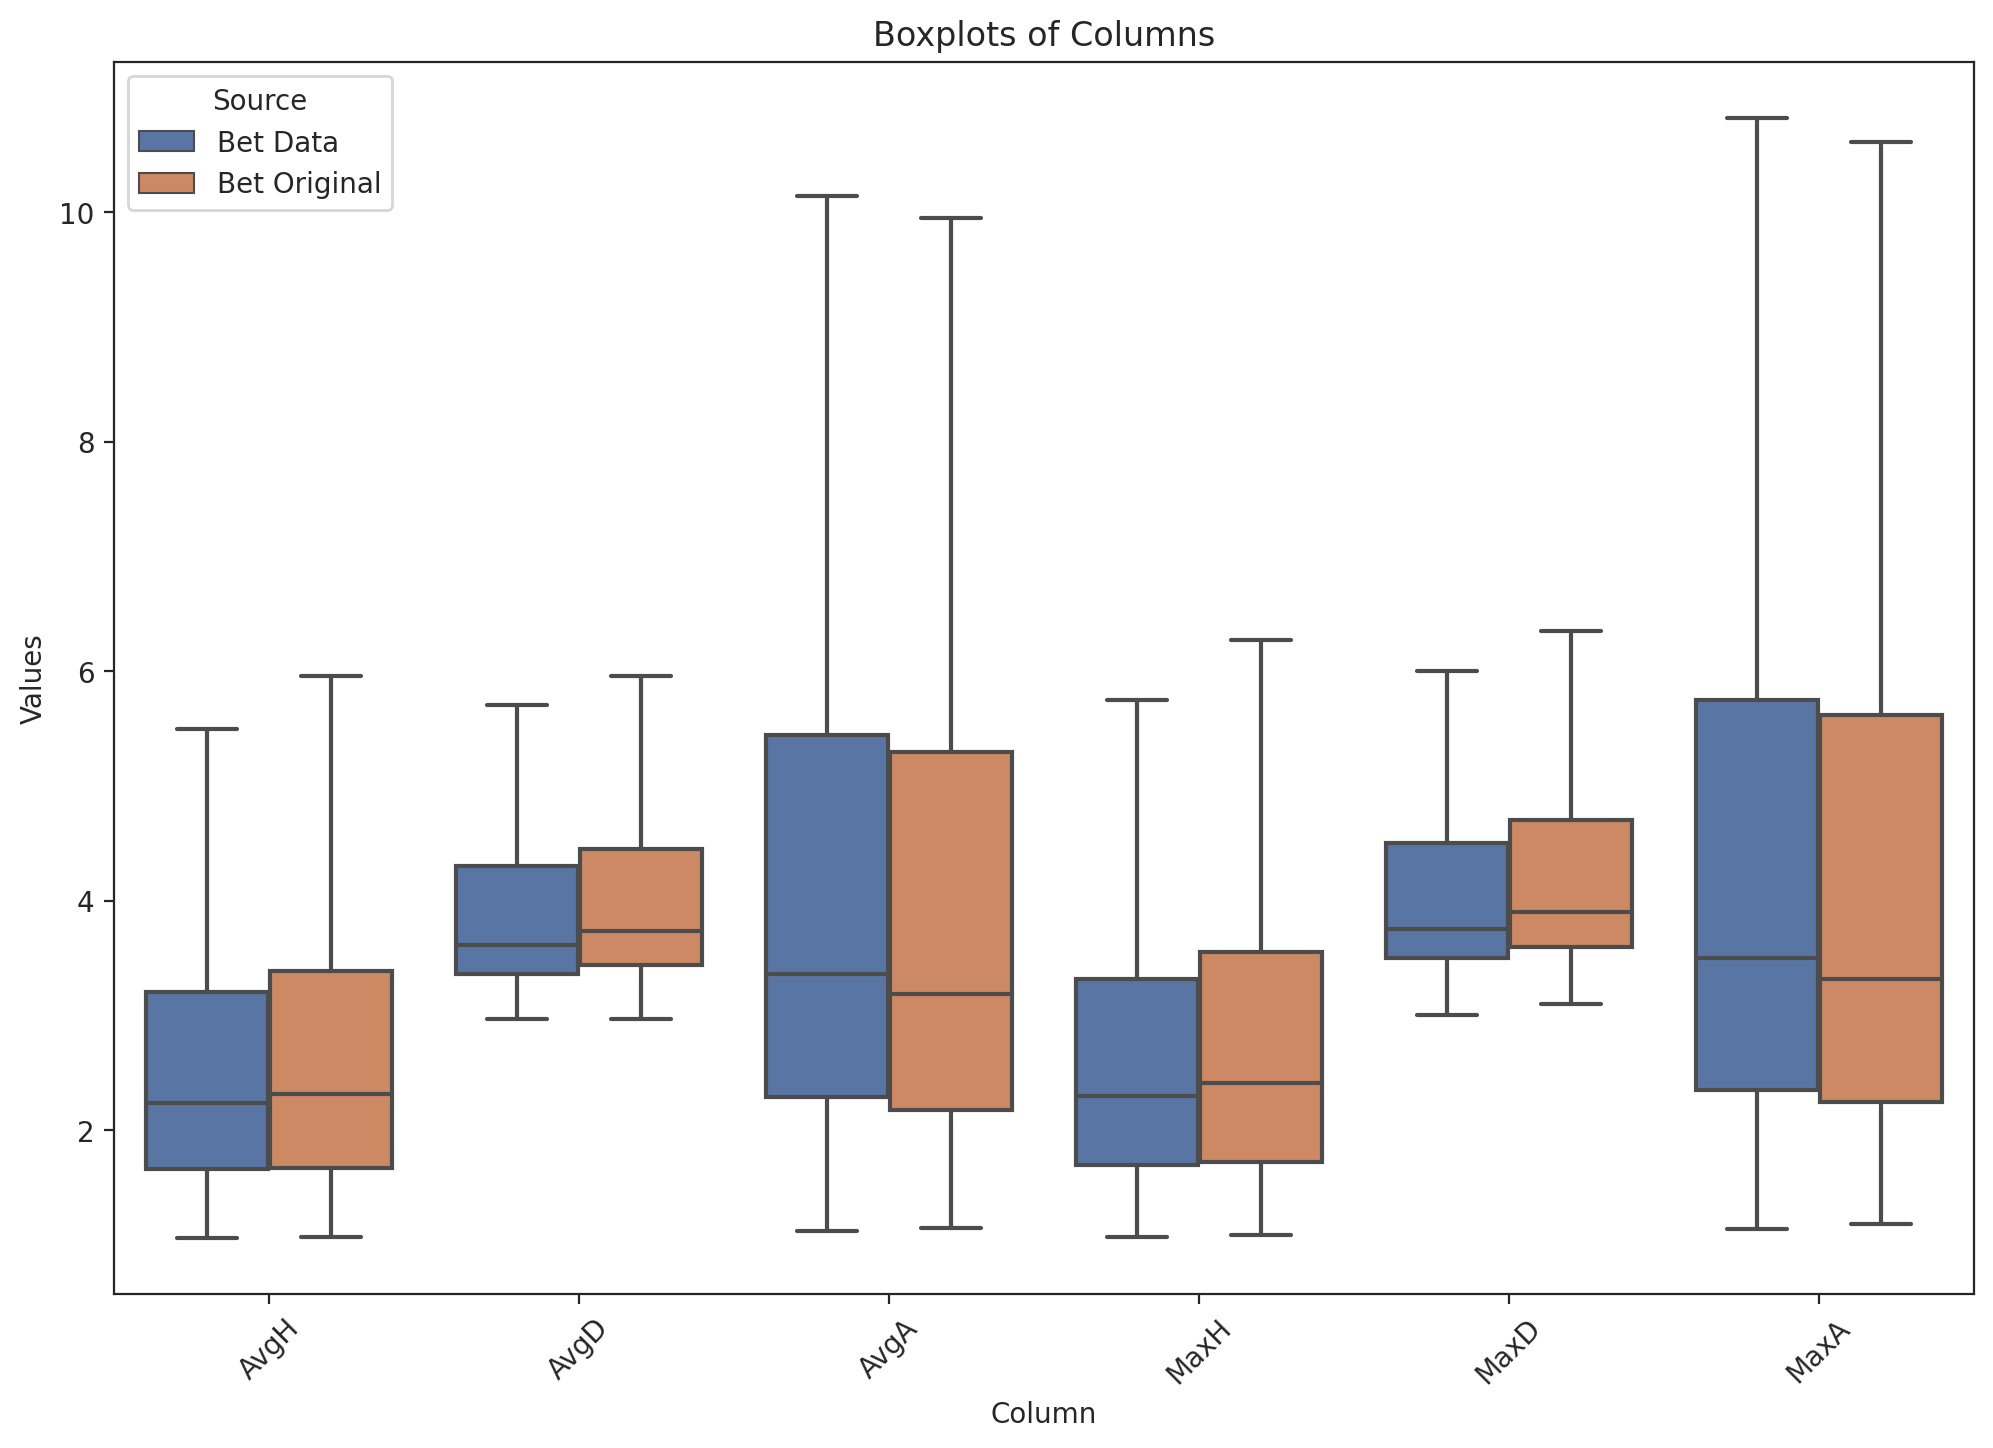

In [ ]:
# Create a new column to distinguish between the two DataFrames
bet_data_df['Source'] = 'Bet Data'
bet_original['Source'] = 'Bet Original'

# Combine the DataFrames
combined_betting_data = pd.concat([bet_data_df, bet_original])

# Reshape the data using pd.melt()
melted_data = pd.melt(combined_betting_data, id_vars=['Source'], value_vars=['AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA'],
                      var_name='Column', value_name='Value')

# Create the boxplot with side-by-side columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Column', y='Value', hue='Source',showfliers=False)
plt.title("Boxplots of Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Replacing the betting statstics in the original dataset with the new calculated data

# Define the columns to update
columns_to_update = ['AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA']

# Use the 'update()' method to replace the values in 'pl' with the values from 'bet_data_df'
pl.update(bet_data_df[columns_to_update])

In [ ]:
pl.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'AvgCAHA', 'MW', 'Overall_H', 'Attack_H', 'Midfield_H', 'Defence_H',
       'Overall_A', 'Attack_A', 'Midfield_A', 'Defence_A'],
      dtype='object', length=146)

In [ ]:
goal_bet = pl.filter(like='2.5',axis=1)
goal_bet

BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  B365>2.5  B365<2.5  P>2.5  \
0         1.60      1.53      2.64      2.42       NaN       NaN    NaN   
1          NaN       NaN       NaN       NaN      1.72      2.10   1.73   
2          NaN       NaN       NaN       NaN      1.50      2.62   1.51   
3         1.56      1.50      2.75      2.53       NaN       NaN    NaN   
4         1.47      1.44      2.88      2.74       NaN       NaN    NaN   
...        ...       ...       ...       ...       ...       ...    ...   
4175       NaN       NaN       NaN       NaN      1.90      1.90   2.02   
4176      1.96      1.91      1.97      1.90       NaN       NaN    NaN   
4177      2.05      1.98      1.91      1.85       NaN       NaN    NaN   
4178      2.50      2.38      1.64      1.59       NaN       NaN    NaN   
4179       NaN       NaN       NaN       NaN      2.20      1.67   2.28   

      P<2.5  Max>2.5  Max<2.5  Avg>2.5  Avg<2.5  B365C>2.5  B365C<2.5  PC>2.5  \
0       NaN      NaN      NaN      NaN      NaN        NaN        NaN     NaN   
1      2.21     1.75     2.26     1.71     2.17       1.66       2.20    1.67   
2      2.68     1.53     2.68     1.50     2.57       1.53       2.50    1.55   
3       NaN      NaN      NaN      NaN      NaN        NaN        NaN     NaN   
4       NaN      NaN      NaN      NaN      NaN        NaN        NaN     NaN   
...     ...      ...      ...      ...      ...        ...        ...     ...   
4175   1.90     2.02     1.91     1.97     1.86       2.00       1.80    2.04   
4176    NaN      NaN      NaN      NaN      NaN        NaN        NaN     NaN   
4177    NaN      NaN      NaN      NaN      NaN        NaN        NaN     NaN   
4178    NaN      NaN      NaN      NaN      NaN        NaN        NaN     NaN   
4179   1.69     2.29     1.74     2.22     1.68       2.20       1.67    2.30   

      PC<2.5  MaxC>2.5  MaxC<2.5  AvgC>2.5  AvgC<2.5  
0        NaN       NaN       NaN       NaN       NaN  
1       2.33      1.70      2.55      1.63      2.33  
2       2.56      1.58      2.66      1.53      2.49  
3        NaN       NaN       NaN       NaN       NaN  
4        NaN       NaN       NaN       NaN       NaN  
...      ...       ...       ...       ...       ...  
4175    1.88      2.04      2.05      1.97      1.86  
4176     NaN       NaN       NaN       NaN       NaN  
4177     NaN       NaN       NaN       NaN       NaN  
4178     NaN       NaN       NaN       NaN       NaN  
4179    1.68      2.35      1.74      2.25      1.66  

[4180 rows x 20 columns]

In [ ]:
goal_bet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BbMx>2.5   2660 non-null   float64
 1   BbAv>2.5   2660 non-null   float64
 2   BbMx<2.5   2660 non-null   float64
 3   BbAv<2.5   2660 non-null   float64
 4   B365>2.5   1519 non-null   float64
 5   B365<2.5   1519 non-null   float64
 6   P>2.5      1519 non-null   float64
 7   P<2.5      1519 non-null   float64
 8   Max>2.5    1520 non-null   float64
 9   Max<2.5    1520 non-null   float64
 10  Avg>2.5    1520 non-null   float64
 11  Avg<2.5    1520 non-null   float64
 12  B365C>2.5  1520 non-null   float64
 13  B365C<2.5  1520 non-null   float64
 14  PC>2.5     1519 non-null   float64
 15  PC<2.5     1519 non-null   float64
 16  MaxC>2.5   1520 non-null   float64
 17  MaxC<2.5   1520 non-null   float64
 18  AvgC>2.5   1520 non-null   float64
 19  AvgC<2.5   1520 non-null   float64
dtypes: float

In [ ]:
goal_bet.columns

Index(['BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'B365>2.5', 'B365<2.5',
       'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5',
       'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5',
       'AvgC>2.5', 'AvgC<2.5'],
      dtype='object')

In [ ]:
goal_bet.describe()

BbMx>2.5     BbAv>2.5     BbMx<2.5     BbAv<2.5     B365>2.5  \
count  2660.000000  2660.000000  2660.000000  2660.000000  1519.000000   
mean      1.957970     1.876252     2.114327     2.008985     1.834510   
std       0.298425     0.274877     0.403204     0.356783     0.266948   
min       1.240000     1.220000     1.450000     1.400000     1.220000   
25%       1.750000     1.680000     1.830000     1.760000     1.660000   
50%       1.930000     1.855000     2.040000     1.940000     1.800000   
75%       2.150000     2.060000     2.300000     2.180000     2.000000   
max       3.140000     2.910000     4.750000     4.170000     2.750000   

          B365<2.5        P>2.5        P<2.5      Max>2.5      Max<2.5  \
count  1519.000000  1519.000000  1519.000000  1520.000000  1520.000000   
mean      2.088282     1.872014     2.138828     1.906033     2.186862   
std       0.405410     0.281074     0.415451     0.283684     0.431711   
min       1.440000     1.200000     1.470000     1.220000     1.510000   
25%       1.800000     1.660000     1.850000     1.700000     1.890000   
50%       2.000000     1.850000     2.060000     1.880000     2.100000   
75%       2.200000     2.060000     2.340000     2.100000     2.380000   
max       4.330000     2.860000     5.060000     2.880000     5.060000   

           Avg>2.5      Avg<2.5    B365C>2.5    B365C<2.5       PC>2.5  \
count  1520.000000  1520.000000  1520.000000  1520.000000  1519.000000   
mean      1.835803     2.094461     1.846941     2.089447     1.887465   
std       0.263983     0.394387     0.295572     0.454665     0.305042   
min       1.210000     1.470000     0.000000     0.000000     1.120000   
25%       1.640000     1.820000     1.620000     1.800000     1.660000   
50%       1.820000     2.010000     1.850000     2.000000     1.870000   
75%       2.010000     2.280000     2.032500     2.300000     2.090000   
max       2.690000     4.450000     3.200000     6.000000     3.150000   

            PC<2.5     MaxC>2.5    MaxC<2.5    AvgC>2.5     AvgC<2.5  
count  1519.000000  1520.000000  1520.00000  1520.00000  1520.000000  
mean      2.143351     1.931882     2.23748     1.84775     2.101803  
std       0.466781     0.311262     0.49919     0.28621     0.438327  
min       1.410000     1.160000     1.44000     1.13000     1.390000  
25%       1.820000     1.700000     1.91000     1.64000     1.800000  
50%       2.040000     1.910000     2.14000     1.84000     2.000000  
75%       2.340000     2.140000     2.45000     2.05000     2.280000  
max       6.720000     3.200000     6.82000     3.01000     5.770000

In [ ]:
len(goal_bet.loc[(goal_bet['Max>2.5'].notna()) | (goal_bet['BbMx>2.5'].notna())])

4180

In [ ]:
len(goal_bet.loc[(goal_bet['Max<2.5'].notna()) | (goal_bet['BbMx<2.5'].notna())])

4180

In [ ]:
len(goal_bet.loc[(goal_bet['Avg>2.5'].notna()) | (goal_bet['BbAv>2.5'].notna())])

4180

In [ ]:
len(goal_bet.loc[(goal_bet['Avg<2.5'].notna()) | (goal_bet['BbAv<2.5'].notna())])

4180

In [ ]:
# Listing out the columns of interest for model building

cols=['Div','Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',\
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',\
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR','AvgH','AvgD','AvgA','MaxH','MaxD','MaxA',\
       'MW', 'Year','Max>2.5','BbMx>2.5','Max<2.5','BbMx<2.5','Avg>2.5',\
      'BbAv>2.5','Avg<2.5','BbAv<2.5','Overall_H', 'Attack_H', 'Midfield_H', 'Defence_H',\
      'Overall_A', 'Attack_A', 'Midfield_A', 'Defence_A']

In [ ]:
# Making a new dataframe with the columns listed above

data=pl[cols]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Div         4180 non-null   object        
 1   Date        4180 non-null   datetime64[ns]
 2   Time        1520 non-null   object        
 3   HomeTeam    4180 non-null   object        
 4   AwayTeam    4180 non-null   object        
 5   FTHG        4180 non-null   float64       
 6   FTAG        4180 non-null   float64       
 7   FTR         4180 non-null   object        
 8   HTHG        4180 non-null   float64       
 9   HTAG        4180 non-null   float64       
 10  HTR         4180 non-null   object        
 11  Referee     4180 non-null   object        
 12  HS          4180 non-null   float64       
 13  AS          4180 non-null   float64       
 14  HST         4180 non-null   float64       
 15  AST         4180 non-null   float64       
 16  HF          4180 non-nul

## **Filling missing values in  `Max & Avg <2.5` and `Max & Avg >2.5`**

In [ ]:
data.loc[data['Max>2.5'].isnull(), 'Max>2.5'] = data['BbMx>2.5']
data.loc[data['Max<2.5'].isnull(), 'Max<2.5'] = data['BbMx<2.5']
data.loc[data['Avg>2.5'].isnull(), 'Avg>2.5'] = data['BbAv>2.5']
data.loc[data['Avg<2.5'].isnull(), 'Avg<2.5'] = data['BbAv<2.5']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Div         4180 non-null   object        
 1   Date        4180 non-null   datetime64[ns]
 2   Time        1520 non-null   object        
 3   HomeTeam    4180 non-null   object        
 4   AwayTeam    4180 non-null   object        
 5   FTHG        4180 non-null   float64       
 6   FTAG        4180 non-null   float64       
 7   FTR         4180 non-null   object        
 8   HTHG        4180 non-null   float64       
 9   HTAG        4180 non-null   float64       
 10  HTR         4180 non-null   object        
 11  Referee     4180 non-null   object        
 12  HS          4180 non-null   float64       
 13  AS          4180 non-null   float64       
 14  HST         4180 non-null   float64       
 15  AST         4180 non-null   float64       
 16  HF          4180 non-nul

# **Feature Engineering**

## **Seperating full time result `FTR` to home team result (`H_TR`) and away team result (`A_TR`)**

In [ ]:
data.loc[data['FTR'] == 'H', ['H_TR', 'A_TR']] = ['W', 'L']
data.loc[data['FTR'] == 'A', ['H_TR', 'A_TR']] = ['L', 'W']
data.loc[data['FTR'] == 'D', ['H_TR', 'A_TR']] = ['D', 'D']

## **Calculating winning streak of teams**

In [ ]:
data['Year'].min(),data['Year'].max()

(2013, 2023)

In [ ]:
from collections import defaultdict, deque

# Create a dictionary to store team results as circular lists
team_results = defaultdict(lambda: deque(maxlen=5))

# Group the data by year and 'MW'
grouped_data = data.groupby(['Year', 'MW'])

# Initialize variables to keep track of the previous year and matchweek
prev_year = None
prev_matchweek = None

# Iterate through each group
for group_key, group_data in grouped_data:
    year, match_week = group_key

    # Reset the streak lists if a new year is encountered
    if prev_year is not None and year != prev_year:
        team_results.clear()

    # Reset the streak lists if MW is 1
    if match_week == 1:
        team_results.clear()

    # Iterate through each row in the group
    for index, row in group_data.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        home_result = row['H_TR']
        away_result = row['A_TR']

        # Get the previous results for the home team
        home_streak = ''.join(team_results[home_team])

        # Get the previous results for the away team
        away_streak = ''.join(team_results[away_team])

        # Append the current result to the circular lists
        team_results[home_team].append(home_result)
        team_results[away_team].append(away_result)

        # Assign the streak values to the respective columns
        data.at[index, 'H_SK'] = home_streak
        data.at[index, 'A_SK'] = away_streak

    # Update the previous year and matchweek
    prev_year = year
    prev_matchweek = match_week

# Filter the data within the specific year range
filtered_data1 = data.loc[(data['Year'] >= data['Year'].min()) & (data['Year'] <= data['Year'].max())].copy()


/tmp/ipykernel_28/3163999591.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.at[index, 'H_SK'] = home_streak
/tmp/ipykernel_28/3163999591.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.at[index, 'A_SK'] = away_streak


In [ ]:
# Observing the dataset with streak added to the dataset

filtered_data1[['HomeTeam','AwayTeam','FTR','H_SK','A_SK','MW','Year','Date']].sort_values(by=['Year','MW'])

HomeTeam     AwayTeam FTR   H_SK   A_SK  MW  Year       Date
50        Arsenal   Sunderland   D                 1  2013 2012-08-18
1225      Everton   Man United   H                 1  2013 2012-08-20
1426       Fulham      Norwich   H                 1  2013 2012-08-18
2033     Man City  Southampton   H                 1  2013 2012-08-19
2549    Newcastle    Tottenham   H                 1  2013 2012-08-18
...           ...          ...  ..    ...    ...  ..   ...        ...
1326      Everton  Bournemouth   H  LDWLD  WWLLL  38  2023 2023-05-28
1614        Leeds    Tottenham   A  DLLDL  DLWLL  38  2023 2023-05-28
1708    Leicester     West Ham   H  DDLLD  LLWLW  38  2023 2023-05-28
2424   Man United       Fulham   H  DWLWW  LLWWD  38  2023 2023-05-28
2895  Southampton    Liverpool   D  LLLLL  WWWWD  38  2023 2023-05-28

[4180 rows x 8 columns]

In [ ]:
# Initialize the streak point variables
hstreak_point = 0
astreak_point = 0

# Iterate through each row
for index, row in filtered_data1.iterrows():
    hstreak_value = row['H_SK']
    astreak_value = row['A_SK']
    hstreak_length = len(hstreak_value)
    astreak_length = len(astreak_value)

    if hstreak_length != 0:
        # Calculate the streak point for home team
        hstreak_point = sum([3 if result == 'W' else 0 if result == 'L' else 1 for result in hstreak_value]) / (3 * hstreak_length)

    if astreak_length != 0:
        # Calculate the streak point for away team
        astreak_point = sum([3 if result == 'W' else 0 if result == 'L' else 1 for result in astreak_value]) / (3 * astreak_length)

    # Check if MW is 1 and set H_SP and A_SP to 0
    if row['MW'] == 1:
        hstreak_point = 0
        astreak_point = 0

    # Assign the streak point value to the respective column
    filtered_data1.at[index, 'H_SP'] = hstreak_point
    filtered_data1.at[index, 'A_SP'] = astreak_point


In [ ]:
# Observing the dataset with streak points added to the dataset

filtered_data1[['HomeTeam','AwayTeam','FTR','H_SK','H_SP','A_SK','A_SP','MW','Year','Date']].sort_values(by=['Year','MW'])

HomeTeam     AwayTeam FTR   H_SK      H_SP   A_SK      A_SP  MW  \
50        Arsenal   Sunderland   D         0.000000         0.000000   1   
1225      Everton   Man United   H         0.000000         0.000000   1   
1426       Fulham      Norwich   H         0.000000         0.000000   1   
2033     Man City  Southampton   H         0.000000         0.000000   1   
2549    Newcastle    Tottenham   H         0.000000         0.000000   1   
...           ...          ...  ..    ...       ...    ...       ...  ..   
1326      Everton  Bournemouth   H  LDWLD  0.333333  WWLLL  0.400000  38   
1614        Leeds    Tottenham   A  DLLDL  0.133333  DLWLL  0.266667  38   
1708    Leicester     West Ham   H  DDLLD  0.200000  LLWLW  0.400000  38   
2424   Man United       Fulham   H  DWLWW  0.666667  LLWWD  0.466667  38   
2895  Southampton    Liverpool   D  LLLLL  0.000000  WWWWD  0.866667  38   

      Year       Date  
50    2013 2012-08-18  
1225  2013 2012-08-20  
1426  2013 2012-08-18  
2033  2013 2012-08-19  
2549  2013 2012-08-18  
...    ...        ...  
1326  2023 2023-05-28  
1614  2023 2023-05-28  
1708  2023 2023-05-28  
2424  2023 2023-05-28  
2895  2023 2023-05-28  

[4180 rows x 10 columns]

## **Calculating form of each team**

In [ ]:
# sorting the dataset by year and matchweek number

filtered_data1=filtered_data1.sort_values(by=['Year','MW'])

In [ ]:
team_form={}


# Iterate through each row
for index, row in filtered_data1.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_week = row['MW']

    # Initialize the form value for the home team and away team in match week 1
    if match_week == 1:
        team_form[home_team] = 1.0
        team_form[away_team] = 1.0


    # Update the form values for subsequent match weeks
    else:
        prev_match_week = match_week - 1

        # Check if the home team was home in the previous match week
        if home_team in filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                           (filtered_data1['Year'] == row['Year']), 'HomeTeam']\
                                           .values:
            prev_home_result = filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                                  (filtered_data1['HomeTeam'] == home_team) &
                                                  (filtered_data1['Year'] == row['Year'])]
            H_Re, P_F1, R_F1 = prev_home_result['H_TR'].values[0], \
                                    prev_home_result['H_F'].values[0], prev_home_result['A_F'].values[0]
        elif home_team in filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                             (filtered_data1['Year'] == row['Year']),\
                                             'AwayTeam'].values:
            prev_home_result = filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                                  (filtered_data1['AwayTeam'] == home_team) &
                                                  (filtered_data1['Year'] == row['Year'])]
            H_Re, P_F1, R_F1 = prev_home_result['A_TR'].values[0], \
                                  prev_home_result['A_F'].values[0], prev_home_result['H_F'].values[0]
        # else:
        #     H_TR, H_F, A_F = None, None, None

        # Check if the away team was home in the previous match week
        if away_team in filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                           (filtered_data1['Year'] == row['Year']), 'HomeTeam'].values:
            prev_away_result = filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                                  (filtered_data1['HomeTeam'] == away_team) &
                                                  (filtered_data1['Year'] == row['Year'])]
            A_Re, P_F2, R_F2 = prev_away_result['H_TR'].values[0], prev_away_result['H_F']\
                                                 .values[0], prev_away_result['A_F'].values[0]
        elif away_team in filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                             (filtered_data1['Year'] == row['Year']),\
                                                             'AwayTeam'].values:
            prev_away_result = filtered_data1.loc[(filtered_data1['MW'] == prev_match_week) &
                                                  (filtered_data1['AwayTeam'] == away_team) &
                                                  (filtered_data1['Year'] == row['Year'])]
            A_Re, P_F2, R_F2 = prev_away_result['A_TR'].values[0],\
                                 prev_away_result['A_F'].values[0], prev_away_result['H_F'].values[0]
        # else:
        #     A_TR, H_F, A_F = None, None, None

        # Update the form values based on the previous result
        if H_Re == 'W':
            team_form[home_team] = round(P_F1 + (0.3 * abs(R_F1)),3)
        elif H_Re == 'L':
            team_form[home_team] = round(P_F1 - (0.3 * abs(R_F1)),3)
        elif H_Re == 'D':
            form_diff = abs(P_F1 - R_F1)
            team_form[home_team] = round(P_F1 - abs((0.3 * form_diff)),3)

        if A_Re == 'W':
            team_form[away_team] = round(P_F2 + (0.3 * abs(R_F2)),3)
        elif A_Re == 'L':
            team_form[away_team] = round(P_F2 - (0.3 * abs(R_F2)),3)
        elif A_Re == 'D':
            form_diff = abs(P_F2 - R_F2)
            team_form[away_team] = round(P_F2 - abs((0.3 * form_diff)),3)

    # Assign the form value to the respective column
    filtered_data1.at[index, 'H_F'] = team_form.get(home_team, 0)
    filtered_data1.at[index, 'A_F'] = team_form.get(away_team, 0)


In [ ]:
filtered_data1[['HomeTeam','AwayTeam','FTR','HTR','H_TR','A_TR','H_F','A_F','MW','Year']].sort_values(by=['Year','MW'])

HomeTeam     AwayTeam FTR HTR H_TR A_TR     H_F     A_F  MW  Year
50        Arsenal   Sunderland   D   D    D    D   1.000   1.000   1  2013
1225      Everton   Man United   H   D    W    L   1.000   1.000   1  2013
1426       Fulham      Norwich   H   H    W    L   1.000   1.000   1  2013
2033     Man City  Southampton   H   H    W    L   1.000   1.000   1  2013
2549    Newcastle    Tottenham   H   D    W    L   1.000   1.000   1  2013
...           ...          ...  ..  ..  ...  ...     ...     ...  ..   ...
1326      Everton  Bournemouth   H   D    W    L -18.126   2.593  38  2023
1614        Leeds    Tottenham   A   A    L    W -39.377 -10.156  38  2023
1708    Leicester     West Ham   H   H    W    L -24.958   3.304  38  2023
2424   Man United       Fulham   H   D    W    L  10.009   7.371  38  2023
2895  Southampton    Liverpool   D   D    D    D -28.609   9.330  38  2023

[4180 rows x 10 columns]

In [ ]:
# from google.colab import autoviz
# def categorical_histogram(df, colname, figsize=(6, 4), mpl_palette_name='Dark2'):
#   from matplotlib import pyplot as plt
#   import seaborn as sns
#   _, ax = plt.subplots(figsize=figsize)
#   bars = df[colname].value_counts()
#   plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
#   plt.title('Full time result')
#   plt.xlabel('No. of matches')
#   ax.spines[['top', 'right',]].set_visible(False)
#   return autoviz.MplChart.from_current_mpl_state()

# chart = categorical_histogram(filtered_data1, *['FTR'], **{})
# chart

In [ ]:
# from google.colab import autoviz
# def heatmap(df, x_colname, y_colname, figsize=(6, 4), mpl_palette_name='viridis'):
#   from matplotlib import pyplot as plt
#   import seaborn as sns
#   import pandas as pd
#   plt.subplots(figsize=figsize)
#   df_2dhist = pd.DataFrame({
#       x_label: grp[y_colname].value_counts()
#       for x_label, grp in df.groupby(x_colname)
#   })
#   sns.heatmap(df_2dhist, cmap=mpl_palette_name,annot=True,fmt='d')
#   plt.xlabel(x_colname)
#   plt.ylabel(y_colname)
#   return autoviz.MplChart.from_current_mpl_state()

# chart = heatmap(filtered_data1, *['FTR', 'HTR'], **{})
# chart

## **Goal difference**

In [ ]:
filtered_data1=filtered_data1.sort_values(by=['Year','MW'])

filtered_data1['HCGS'] = 0
filtered_data1['HCGC'] = 0
filtered_data1['ACGS'] = 0
filtered_data1['ACGC'] = 0

team_statistics = {}
current_season = None

for index, row in filtered_data1.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    home_goals_scored = row['FTHG']
    home_goals_conceded = row['FTAG']
    away_goals_scored = row['FTAG']
    away_goals_conceded = row['FTHG']

    if home_team not in team_statistics:
        team_statistics[home_team] = {
            'GS': 0,
            'GC': 0
        }

    if away_team not in team_statistics:
        team_statistics[away_team] = {
            'GS': 0,
            'GC': 0
        }

    current_season = row['Year']

    if current_season not in team_statistics[home_team]:
        team_statistics[home_team][current_season] = {
            'GS': 0,
            'GC': 0
        }

    if current_season not in team_statistics[away_team]:
        team_statistics[away_team][current_season] = {
            'GS': 0,
            'GC': 0
        }

    current_matchweek = row['MW']
    prev_matchweek = current_matchweek - 1

    if current_matchweek == 1:
        team_statistics[home_team][current_season]['GS_MW1'] = 0
        team_statistics[home_team][current_season]['GC_MW1'] = 0
        team_statistics[away_team][current_season]['GS_MW1'] = 0
        team_statistics[away_team][current_season]['GC_MW1'] = 0

    if prev_matchweek > 0:
        team_statistics[home_team][current_season]['GS'] += team_statistics[home_team][current_season]['GS_MW' + str(prev_matchweek)]
        team_statistics[home_team][current_season]['GC'] += team_statistics[home_team][current_season]['GC_MW' + str(prev_matchweek)]
        team_statistics[away_team][current_season]['GS'] += team_statistics[away_team][current_season]['GS_MW' + str(prev_matchweek)]
        team_statistics[away_team][current_season]['GC'] += team_statistics[away_team][current_season]['GC_MW' + str(prev_matchweek)]

    team_statistics[home_team][current_season]['GS_MW' + str(current_matchweek)] = home_goals_scored
    team_statistics[home_team][current_season]['GC_MW' + str(current_matchweek)] = home_goals_conceded
    team_statistics[away_team][current_season]['GS_MW' + str(current_matchweek)] = away_goals_scored
    team_statistics[away_team][current_season]['GC_MW' + str(current_matchweek)] = away_goals_conceded

    filtered_data1.at[index, 'HCGS'] = team_statistics[home_team][current_season]['GS']
    filtered_data1.at[index, 'HCGC'] = team_statistics[home_team][current_season]['GC']
    filtered_data1.at[index, 'ACGS'] = team_statistics[away_team][current_season]['GS']
    filtered_data1.at[index, 'ACGC'] = team_statistics[away_team][current_season]['GC']


In [ ]:
filtered_data1[['HomeTeam','AwayTeam','FTHG','FTAG','HCGS','HCGC','ACGS','ACGC','MW','Year']].sort_values(by=['Year','MW'])

HomeTeam     AwayTeam  FTHG  FTAG  HCGS  HCGC  ACGS  ACGC  MW  Year
50        Arsenal   Sunderland   0.0   0.0     0     0     0     0   1  2013
1225      Everton   Man United   1.0   0.0     0     0     0     0   1  2013
1426       Fulham      Norwich   5.0   0.0     0     0     0     0   1  2013
2033     Man City  Southampton   3.0   2.0     0     0     0     0   1  2013
2549    Newcastle    Tottenham   2.0   1.0     0     0     0     0   1  2013
...           ...          ...   ...   ...   ...   ...   ...   ...  ..   ...
1326      Everton  Bournemouth   1.0   0.0    33    57    37    70  38  2023
1614        Leeds    Tottenham   1.0   4.0    47    74    66    62  38  2023
1708    Leicester     West Ham   2.0   1.0    49    67    41    53  38  2023
2424   Man United       Fulham   2.0   1.0    56    42    54    51  38  2023
2895  Southampton    Liverpool   4.0   4.0    32    69    71    43  38  2023

[4180 rows x 10 columns]

In [ ]:
# filtered_data1['FTHG']

In [ ]:
filtered_data1['HTGD'] = filtered_data1['HCGS'] - filtered_data1['HCGC']
filtered_data1['ATGD'] = filtered_data1['ACGS'] - filtered_data1['ACGC']

In [ ]:
filtered_data1[['HomeTeam','AwayTeam','FTR','HTGD','ATGD','MW','Year']].sort_values(by=['Year','MW'])

HomeTeam     AwayTeam FTR  HTGD  ATGD  MW  Year
50        Arsenal   Sunderland   D     0     0   1  2013
1225      Everton   Man United   H     0     0   1  2013
1426       Fulham      Norwich   H     0     0   1  2013
2033     Man City  Southampton   H     0     0   1  2013
2549    Newcastle    Tottenham   H     0     0   1  2013
...           ...          ...  ..   ...   ...  ..   ...
1326      Everton  Bournemouth   H   -24   -33  38  2023
1614        Leeds    Tottenham   A   -27     4  38  2023
1708    Leicester     West Ham   H   -18   -12  38  2023
2424   Man United       Fulham   H    14     3  38  2023
2895  Southampton    Liverpool   D   -37    28  38  2023

[4180 rows x 7 columns]

## **Probability based on previous goal difference**

In [ ]:
filtered_data1['TGD'] = filtered_data1['HTGD'] - filtered_data1['ATGD']

In [ ]:
filtered_data1[['HomeTeam','AwayTeam','TGD','FTR']]

HomeTeam     AwayTeam  TGD FTR
50        Arsenal   Sunderland    0   D
1225      Everton   Man United    0   H
1426       Fulham      Norwich    0   H
2033     Man City  Southampton    0   H
2549    Newcastle    Tottenham    0   H
...           ...          ...  ...  ..
1326      Everton  Bournemouth    9   H
1614        Leeds    Tottenham  -31   A
1708    Leicester     West Ham   -6   H
2424   Man United       Fulham   11   H
2895  Southampton    Liverpool  -65   D

[4180 rows x 4 columns]

In [ ]:
cross_tab_result = pd.crosstab(index=filtered_data1['TGD'], columns=filtered_data1['FTR'],normalize='index')
cross_tab_result = cross_tab_result.reset_index()
cross_tab_result = cross_tab_result.rename_axis(None, axis=1)
cross_tab_result

TGD    A    D    H
0   -101  1.0  0.0  0.0
1    -96  1.0  0.0  0.0
2    -91  1.0  0.0  0.0
3    -90  1.0  0.0  0.0
4    -89  1.0  0.0  0.0
..   ...  ...  ...  ...
164   90  0.0  0.0  1.0
165   91  0.0  0.0  1.0
166  106  0.0  0.0  1.0
167  107  0.0  1.0  0.0
168  108  0.0  0.0  1.0

[169 rows x 4 columns]

In [ ]:
# from google.colab import autoviz
# def scatter_plots(df, colname_pairs, scatter_plot_size=4.5, size=8, alpha=.6):
#   from matplotlib import pyplot as plt
#   plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
#   for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
#     ax = plt.subplot(1, len(colname_pairs), plot_i)
#     ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
#     plt.xlabel(x_colname)
#     plt.ylabel(y_colname)
#     ax.spines[['top', 'right',]].set_visible(False)
#   plt.tight_layout()
#   return autoviz.MplChart.from_current_mpl_state()

# chart = scatter_plots(cross_tab_result, *[[['TGD', 'A'], ['TGD', 'D'], ['TGD', 'H']]], **{})
# chart

In [ ]:
cross_tab_result['TGD']

0     -101
1      -96
2      -91
3      -90
4      -89
      ... 
164     90
165     91
166    106
167    107
168    108
Name: TGD, Length: 169, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
x_pred_range = pd.DataFrame(
    np.linspace(cross_tab_result['TGD'].min(), cross_tab_result['TGD'].max(), 1000),
    columns=['TGD']
)

In [ ]:
x_pred_range

TGD
0   -101.000000
1   -100.790791
2   -100.581582
3   -100.372372
4   -100.163163
..          ...
995  107.163163
996  107.372372
997  107.581582
998  107.790791
999  108.000000

[1000 rows x 1 columns]

In [ ]:
cross_tab_result['TGD'].min()

-101

# Draw matches polynomial regression

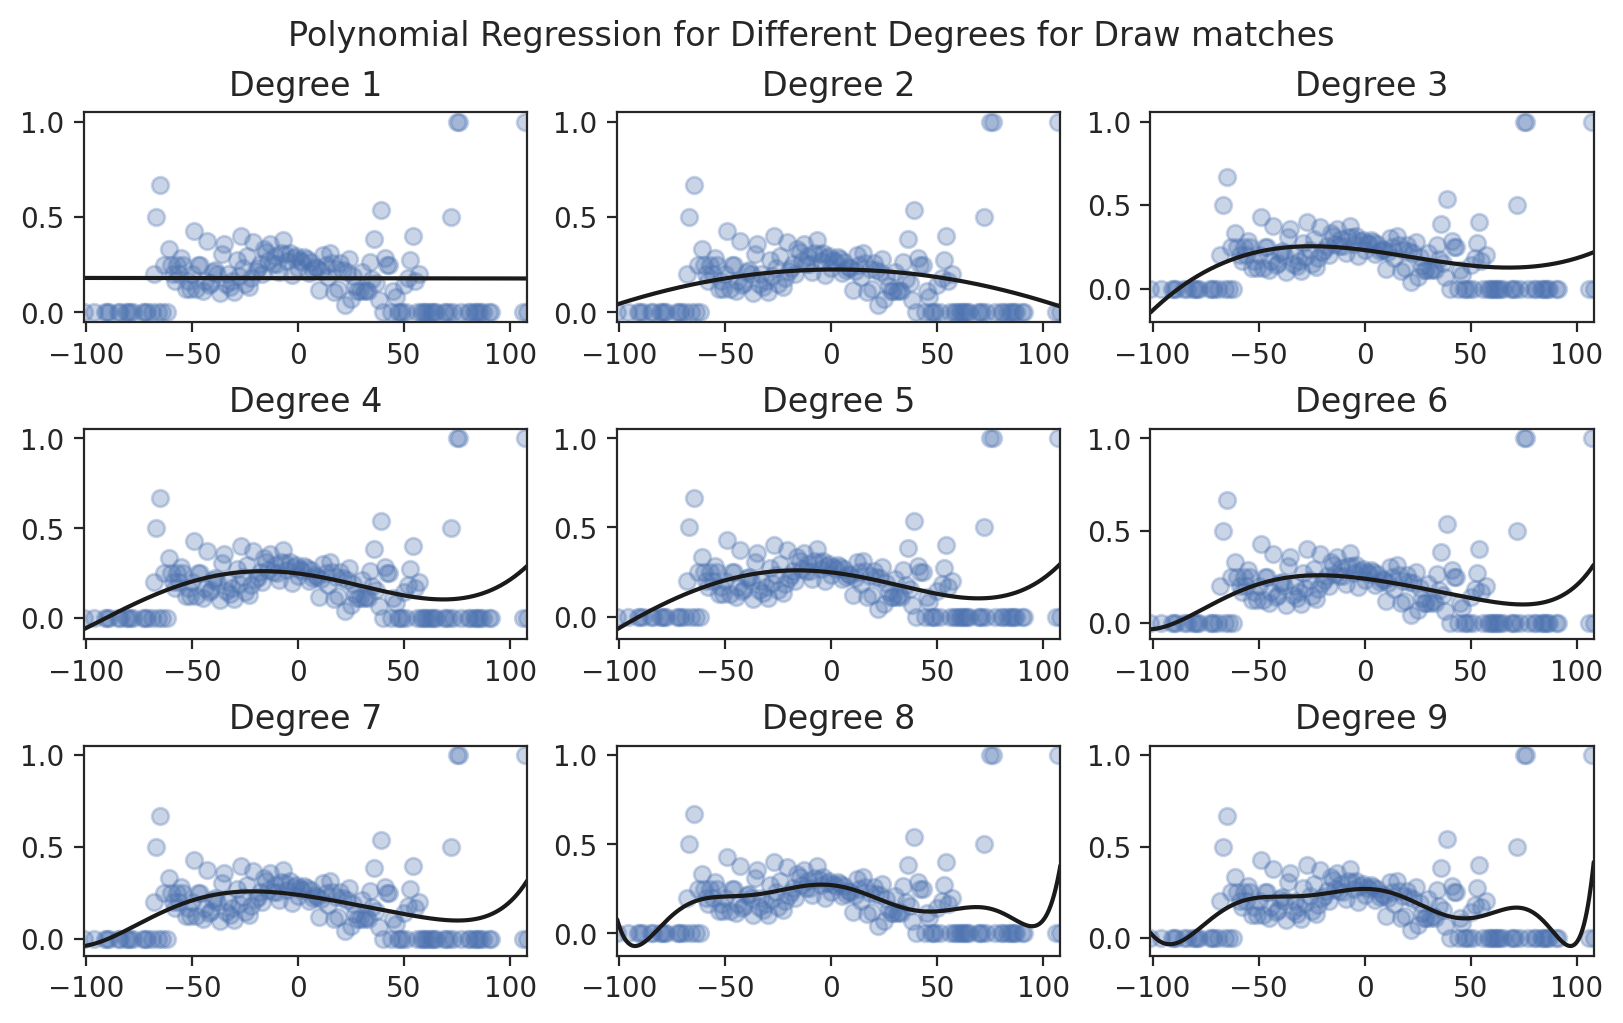

In [ ]:
%matplotlib inline
orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, axs = plt.subplots(3, 3, figsize=(8, 5), constrained_layout=True)
lr_models_D = []

for ax, order in zip(axs.ravel(), orders):
    model = make_pipeline(
        PolynomialFeatures(order, include_bias=True),
        LinearRegression()
    )
    lr_models_D.append(
        model.fit(cross_tab_result['TGD'].values.reshape(-1, 1), cross_tab_result['D'])
    )
    ax.set_xlim(cross_tab_result['TGD'].min(), cross_tab_result['TGD'].max())
    ax.scatter(cross_tab_result['TGD'], cross_tab_result['D'], alpha=0.3, marker='o', c='b')
    ax.plot(x_pred_range['TGD'], model.predict(x_pred_range['TGD'].values.reshape(-1, 1)), c='k')
    ax.set_title(f'Degree {order}')

fig.suptitle("Polynomial Regression for Different Degrees for Draw matches", fontsize=12);


In [ ]:
tester = pd.DataFrame(
    np.linspace(cross_tab_result['TGD'].min(), cross_tab_result['TGD'].max(), len(cross_tab_result)),
    columns=['TGD']
)

In [ ]:
from sklearn.metrics import mean_squared_error
from functools import partial
rmse = partial(mean_squared_error, squared=False)
from sklearn.metrics import r2_score

In [ ]:
# Loop through the lr_models_D list
for i, model in enumerate(lr_models_D):
    pred_D = model.predict(tester.values)

    # Calculate RMSE
    rmseD = mean_squared_error(cross_tab_result['D'], pred_D, squared=False)

    # Calculate R-squared
    r_squaredD = r2_score(cross_tab_result['D'], pred_D)

    # Print the results for each model
    print(f"Results for Degree {i + 1}:")
    print(f"RMSE: {rmseD}")
    print(f"R-squared: {r_squaredD}")
    print()

Results for Degree 1:
RMSE: 0.1740961359934635
R-squared: 0.00015976838927345138

Results for Degree 2:
RMSE: 0.16733278494801834
R-squared: 0.07633513950077453

Results for Degree 3:
RMSE: 0.16527733337142947
R-squared: 0.09888765812623601

Results for Degree 4:
RMSE: 0.16520033703287101
R-squared: 0.09972704956918532

Results for Degree 5:
RMSE: 0.16511656341888822
R-squared: 0.10063988058812667

Results for Degree 6:
RMSE: 0.16573437690692913
R-squared: 0.0938970522652699

Results for Degree 7:
RMSE: 0.16568096005441948
R-squared: 0.09448103934720109

Results for Degree 8:
RMSE: 0.1666319573547984
R-squared: 0.08405597244324814

Results for Degree 9:
RMSE: 0.17119476507916565
R-squared: 0.033207429670671806



In [ ]:
# Loop through the lr_models_D list and calculate RMSE_D and R-squared for each model
results_D = []
for i, model in enumerate(lr_models_D):
    pred_D = model.predict(tester.values)
    rmse_D = mean_squared_error(cross_tab_result['D'], pred_D, squared=False)
    r_squared_D = r2_score(cross_tab_result['D'], pred_D)
    results_D.append((i + 1, rmse_D, r_squared_D))

# Find the model with the lowest RMSE_D and highest R-squared score
best_model_idx_D = np.argmin([result[1] for result in results_D])
selected_degree_D, selected_rmse_D, selected_r_squared_D = results_D[best_model_idx_D]

# Get the coefficients_D of the selected model
selected_model_D = lr_models_D[best_model_idx_D]
coefficients_D = selected_model_D[-1].coef_
intercept_D = selected_model_D[-1].intercept_

# Print the results_D for the selected model
print(f"Best fit is obtained for Degree {selected_degree_D}:")
print(f"RMSE_D: {selected_rmse_D}")
print(f"R-squared: {selected_r_squared_D}")
print(f"Polynomial Regression Equation: D = {intercept_D:.2f}", end="")
for i, coef in enumerate(coefficients_D[1:], start=1):
    print(f" + ({coef:.8f} * TGD^{i})", end="")
print()


Best fit is obtained for Degree 5:
RMSE_D: 0.16511656341888822
R-squared: 0.10063988058812667
Polynomial Regression Equation: D = 0.25 + (-0.00137790 * TGD^1) + (-0.00003814 * TGD^2) + (0.00000023 * TGD^3) + (0.00000000 * TGD^4) + (0.00000000 * TGD^5)


In [ ]:
# Assuming you have selected the best model as mentioned in your previous code

# Get the coefficients of the selected model
coefficients_D = selected_model_D[-1].coef_
intercept_D = selected_model_D[-1].intercept_

# Feature engineering and calculating 'Prob_A' using polynomial regression equation
filtered_data1['Prob_D'] = intercept_D
for i, coef in enumerate(coefficients_D[1:], start=1):
    filtered_data1['Prob_D'] += coef * filtered_data1['TGD']**i

# Print the results
print(filtered_data1[['TGD', 'Prob_D']])


      TGD    Prob_D
50      0  0.247995
1225    0  0.247995
1426    0  0.247995
2033    0  0.247995
2549    0  0.247995
...   ...       ...
1326    9  0.232689
1614  -31  0.248866
1708   -6  0.254841
2424   11  0.228567
2895  -65  0.144314

[4180 rows x 2 columns]


# Away matches ploynomial regression

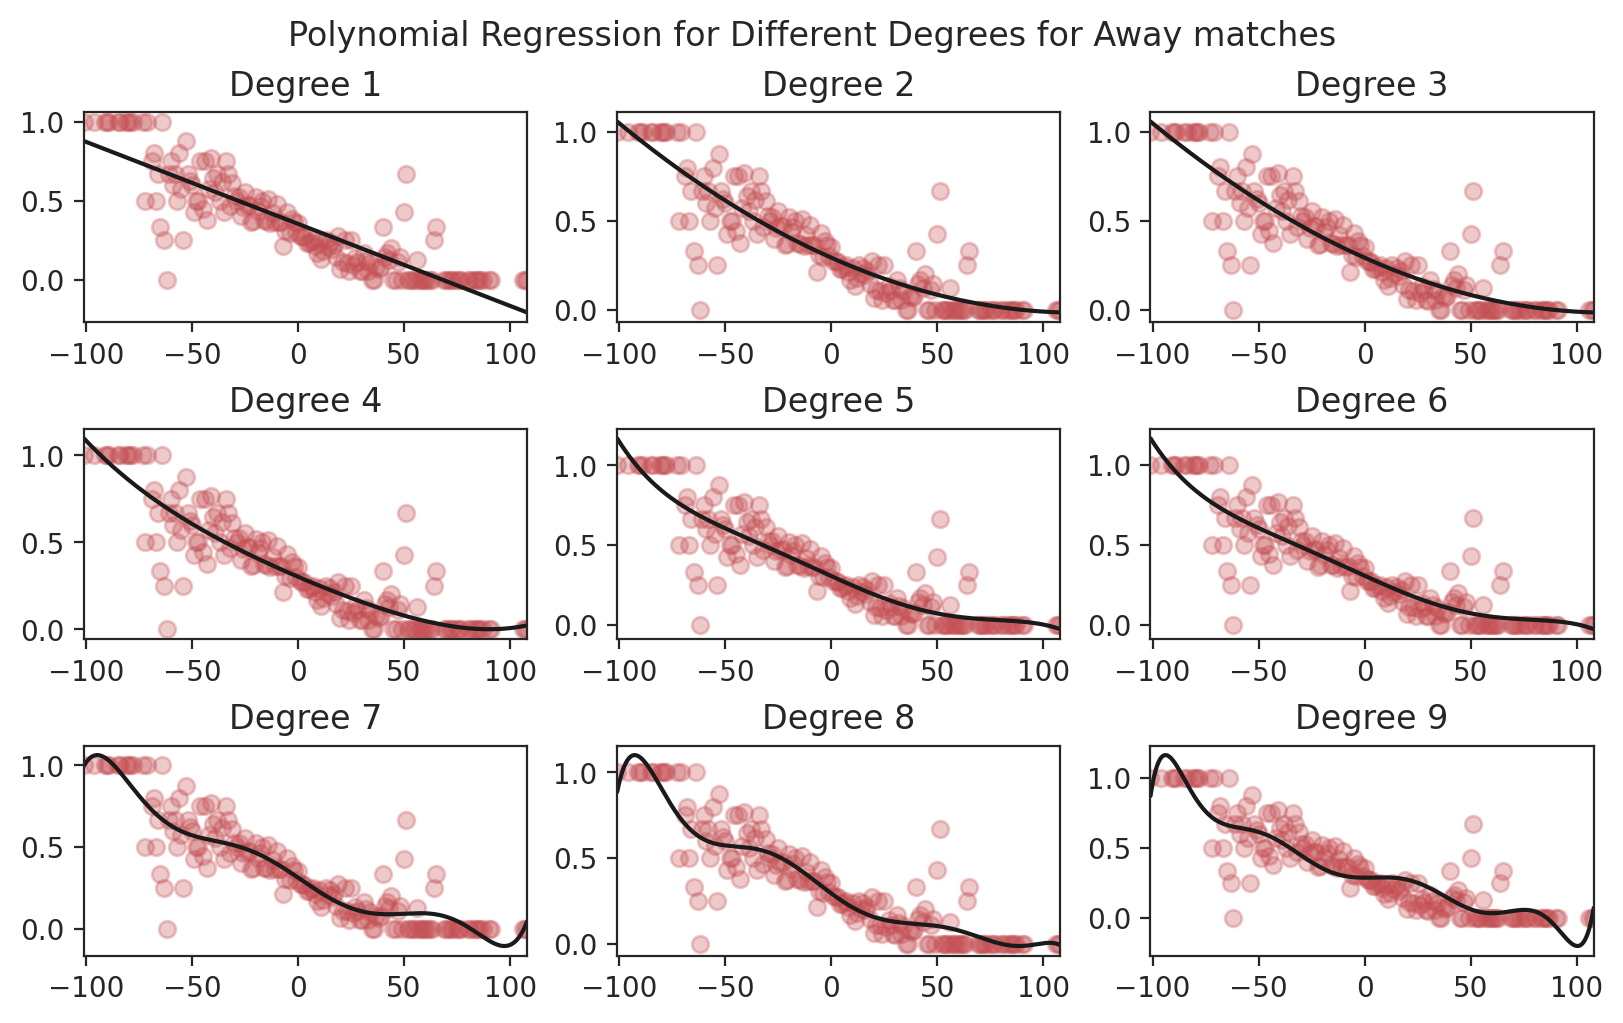

In [ ]:
orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, axs = plt.subplots(3, 3, figsize=(8, 5), constrained_layout=True)
lr_models_A = []

for ax, order in zip(axs.ravel(), orders):
    model = make_pipeline(
        PolynomialFeatures(order, include_bias=True),
        LinearRegression()
    )
    lr_models_A.append(
        model.fit(cross_tab_result['TGD'].values.reshape(-1, 1), cross_tab_result['A'])
    )
    ax.set_xlim(cross_tab_result['TGD'].min(), cross_tab_result['TGD'].max())
    ax.scatter(cross_tab_result['TGD'], cross_tab_result['A'], alpha=0.3, marker='o', c='r')
    ax.plot(x_pred_range['TGD'], model.predict(x_pred_range['TGD'].values.reshape(-1, 1)), c='k')
    ax.set_title(f'Degree {order}')

fig.suptitle("Polynomial Regression for Different Degrees for Away matches", fontsize=12);


In [ ]:
# Loop through the lr_models_A list
for i, model in enumerate(lr_models_A):
    pred_A = model.predict(tester.values)

    # Calculate RMSE
    rmse = mean_squared_error(cross_tab_result['A'], pred_A, squared=False)

    # Calculate R-squared
    r_squared = r2_score(cross_tab_result['A'], pred_A)

    # Print the results for each model
    print(f"Results for Degree {i + 1}:")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r_squared}")
    print()

Results for Degree 1:
RMSE: 0.15516513750875144
R-squared: 0.740117720598801

Results for Degree 2:
RMSE: 0.14596539913426285
R-squared: 0.7700209877654147

Results for Degree 3:
RMSE: 0.14593510389165892
R-squared: 0.7701164425372904

Results for Degree 4:
RMSE: 0.14583207819148228
R-squared: 0.7704409094239726

Results for Degree 5:
RMSE: 0.14284138213269673
R-squared: 0.7797598706024023

Results for Degree 6:
RMSE: 0.1429222645701565
R-squared: 0.7795103826515491

Results for Degree 7:
RMSE: 0.14754898574420985
R-squared: 0.7650038089781036

Results for Degree 8:
RMSE: 0.14700241927668578
R-squared: 0.7667415795898451

Results for Degree 9:
RMSE: 0.15573193146118386
R-squared: 0.7382156343691686



In [ ]:
# Loop through the lr_models_A list and calculate RMSE and R-squared for each model
results_A = []
for i, model in enumerate(lr_models_A):
    pred_A = model.predict(tester.values)
    rmse_A = mean_squared_error(cross_tab_result['A'], pred_A, squared=False)
    r_squared_A = r2_score(cross_tab_result['A'], pred_A)
    results_A.append((i + 1, rmse_A, r_squared_A))

# Find the model with the lowest RMSE and highest R-squared score
best_model_idx_A = np.argmin([result[1] for result in results_A])
selected_degree_A, selected_rmse_A, selected_r_squared_A = results_A[best_model_idx_A]

# Get the coefficients_A of the selected model
selected_model_A = lr_models_A[best_model_idx_A]
coefficients_A = selected_model_A[-1].coef_
intercept_A = selected_model_A[-1].intercept_

# Print the results_A for the selected model
print(f"Best fit is obtained for Degree {selected_degree_A}:")
print(f"RMSE: {selected_rmse_A}")
print(f"R-squared: {selected_r_squared_A}")
print(f"Polynomial Regression Equation: A = {intercept_A:.2f}", end="")
for i, coef in enumerate(coefficients_A[1:], start=1):
    print(f" + ({coef:.8f} * TGD^{i})", end="")
print()


Best fit is obtained for Degree 5:
RMSE: 0.14284138213269673
R-squared: 0.7797598706024023
Polynomial Regression Equation: A = 0.31 + (-0.00604256 * TGD^1) + (0.00000843 * TGD^2) + (0.00000036 * TGD^3) + (0.00000000 * TGD^4) + (-0.00000000 * TGD^5)


In [ ]:
# Get the coefficients of the selected model
coefficients_A = selected_model_A[-1].coef_
intercept_A = selected_model_A[-1].intercept_

# Feature engineering and calculating 'Prob_A' using polynomial regression equation
filtered_data1['Prob_A'] = intercept_A
for i, coef in enumerate(coefficients_A[1:], start=1):
    filtered_data1['Prob_A'] += coef * filtered_data1['TGD']**i

# Print the results
print(filtered_data1[['TGD', 'Prob_A']])


      TGD    Prob_A
50      0  0.305436
1225    0  0.305436
1426    0  0.305436
2033    0  0.305436
2549    0  0.305436
...   ...       ...
1326    9  0.252010
1614  -31  0.492745
1708   -6  0.341919
2424   11  0.240491
2895  -65  0.706076

[4180 rows x 2 columns]


# Home match polynomial regression

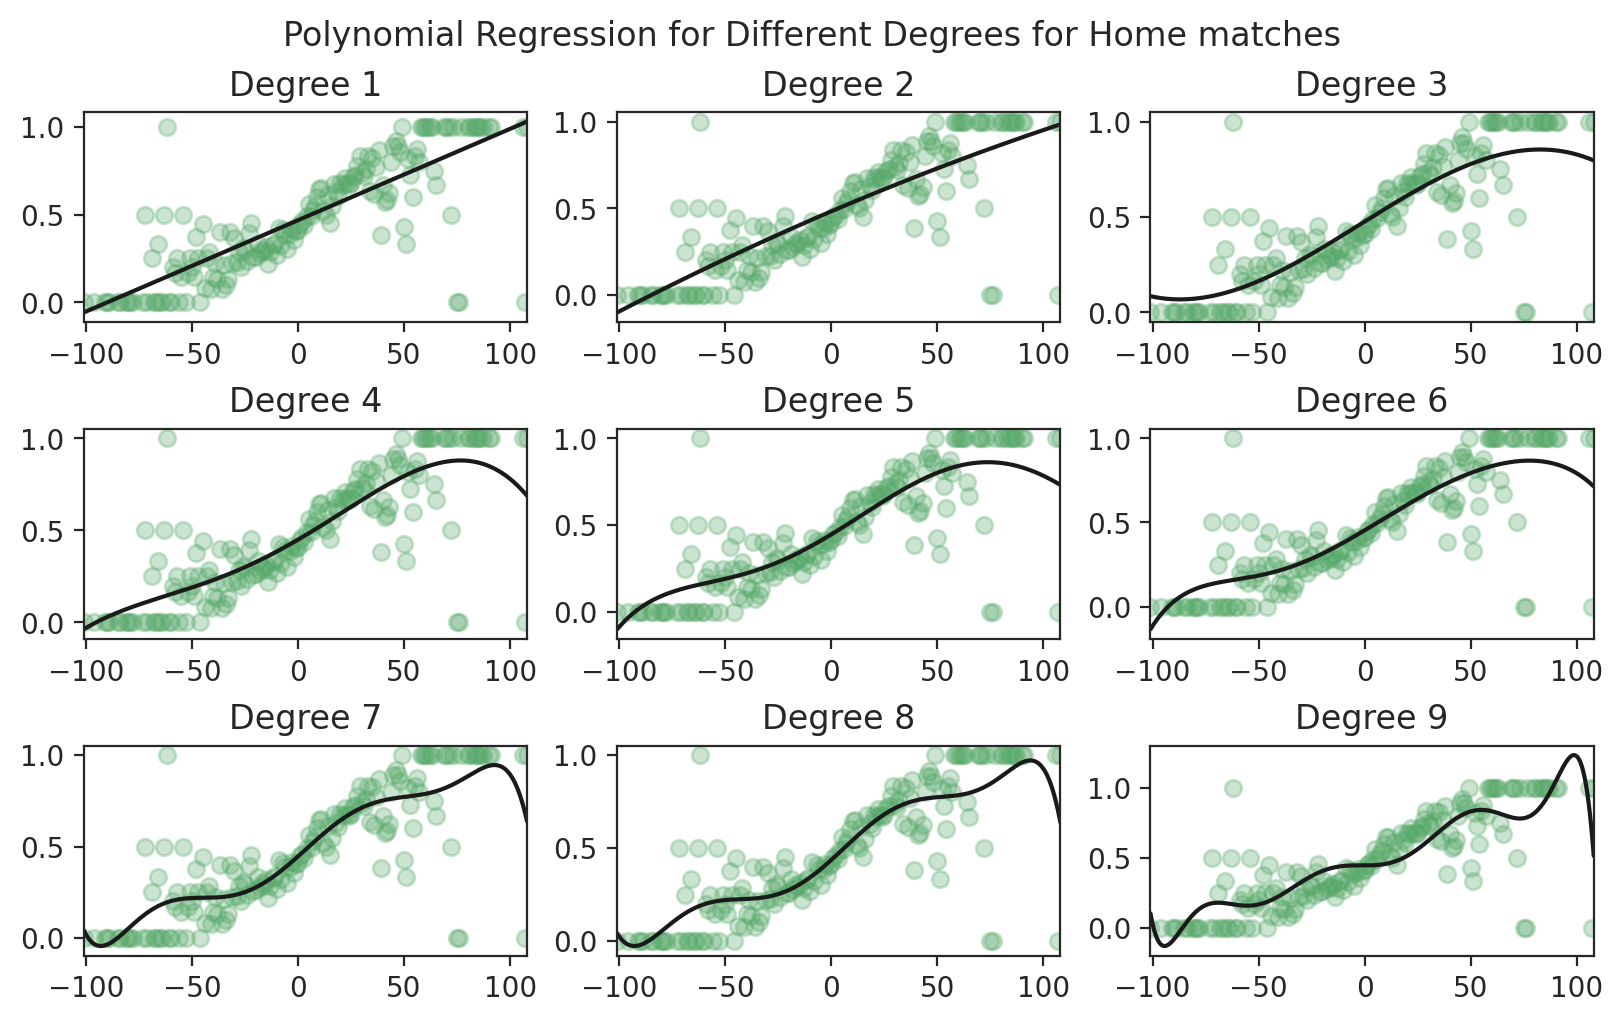

In [ ]:
orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, axs = plt.subplots(3, 3, figsize=(8, 5), constrained_layout=True)
lr_models_H = []

for ax, order in zip(axs.ravel(), orders):
    model = make_pipeline(
        PolynomialFeatures(order, include_bias=True),
        LinearRegression()
    )
    lr_models_H.append(
        model.fit(cross_tab_result['TGD'].values.reshape(-1, 1), cross_tab_result['H'])
    )
    ax.set_xlim(cross_tab_result['TGD'].min(), cross_tab_result['TGD'].max())
    ax.scatter(cross_tab_result['TGD'], cross_tab_result['H'], alpha=0.3, marker='o', c='g')
    ax.plot(x_pred_range['TGD'], model.predict(x_pred_range['TGD'].values.reshape(-1, 1)), c='k')
    ax.set_title(f'Degree {order}')

fig.suptitle("Polynomial Regression for Different Degrees for Home matches", fontsize=12);


In [ ]:
# Loop through the lr_models_H list
for i, model in enumerate(lr_models_H):
    pred_H = model.predict(tester.values)

    # Calculate RMSE
    rmseH = mean_squared_error(cross_tab_result['H'], pred_H, squared=False)

    # Calculate R-squared
    r_squared = r2_score(cross_tab_result['H'], pred_H)

    # Print the results for each model
    print(f"Results for Degree {i + 1}:")
    print(f"RMSE: {rmseH}")
    print(f"R-squared: {r_squared}")
    print()

Results for Degree 1:
RMSE: 0.19387106659520825
R-squared: 0.6525490666409521

Results for Degree 2:
RMSE: 0.19403386300762251
R-squared: 0.6519653022334893

Results for Degree 3:
RMSE: 0.18882531643099215
R-squared: 0.6703994515000696

Results for Degree 4:
RMSE: 0.18848478670357804
R-squared: 0.6715871903128927

Results for Degree 5:
RMSE: 0.1869841647075799
R-squared: 0.6767956921447653

Results for Degree 6:
RMSE: 0.18672918463834737
R-squared: 0.6776765631797148

Results for Degree 7:
RMSE: 0.18833359059024776
R-squared: 0.6721138622590479

Results for Degree 8:
RMSE: 0.18859224698943589
R-squared: 0.671212609474843

Results for Degree 9:
RMSE: 0.20800947866035532
R-squared: 0.6000241827171912



In [ ]:
# Loop through the lr_models_H list and calculate RMSE and R-squared for each model
results_H = []
for i, model in enumerate(lr_models_H):
    pred_H = model.predict(tester.values)
    rmse_H = mean_squared_error(cross_tab_result['H'], pred_H, squared=False)
    r_squared_H = r2_score(cross_tab_result['H'], pred_H)
    results_H.append((i + 1, rmse_H, r_squared_H))

# Find the model with the lowest RMSE and highest R-squared score
best_model_idx_H = np.argmin([result[1] for result in results_H])
selected_degree_H, selected_rmse_H, selected_r_squared_H = results_H[best_model_idx_H]

# Get the coefficients of the selected model
selected_model_H = lr_models_H[best_model_idx_H]
coefficients_H = selected_model_H[-1].coef_
intercept_H = selected_model_H[-1].intercept_

# Print the results_H for the selected model
print(f"Best fit is obtained for Degree {selected_degree_H}:")
print(f"RMSE: {selected_rmse_H}")
print(f"R-squared: {selected_r_squared_H}")
print(f"Polynomial Regression Equation: H = {intercept_H:.8f}", end="")
for i, coef in enumerate(coefficients_H[1:], start=1):
    print(f" + ({coef:.8f} * TGD^{i})", end="")
print()


Best fit is obtained for Degree 6:
RMSE: 0.18672918463834737
R-squared: 0.6776765631797148
Polynomial Regression Equation: H = 0.45341560 + (0.00753682 * TGD^1) + (0.00001562 * TGD^2) + (-0.00000067 * TGD^3) + (0.00000000 * TGD^4) + (0.00000000 * TGD^5) + (-0.00000000 * TGD^6)


In [ ]:

# Get the coefficients of the selected model
coefficients_H = selected_model_H[-1].coef_
intercept_H = selected_model_H[-1].intercept_

# Feature engineering and calculating 'Prob_H' using polynomial regression equation
filtered_data1['Prob_H'] = intercept_H
for i, coef in enumerate(coefficients_H[1:], start=1):
    filtered_data1['Prob_H'] += coef * filtered_data1['TGD']**i

# Print the results
print(filtered_data1[['TGD', 'Prob_H']])


      TGD    Prob_H
50      0  0.453416
1225    0  0.453416
1426    0  0.453416
2033    0  0.453416
2549    0  0.453416
...   ...       ...
1326    9  0.522028
1614  -31  0.253568
1708   -6  0.408901
2424   11  0.537330
2895  -65  0.152023

[4180 rows x 2 columns]


## **ELO**

In [ ]:
filtered_data1['GD'] = filtered_data1['FTHG'] - filtered_data1['FTAG']

In [ ]:
dataset = filtered_data1

In [ ]:
data_13 = dataset.loc[dataset['Year']==2013].sort_values(by=['Year','MW'])
data_14 = dataset.loc[dataset['Year']==2014].sort_values(by=['Year','MW'])
data_15 = dataset.loc[dataset['Year']==2015].sort_values(by=['Year','MW'])
data_16 = dataset.loc[dataset['Year']==2016].sort_values(by=['Year','MW'])
data_17 = dataset.loc[dataset['Year']==2017].sort_values(by=['Year','MW'])
data_18 = dataset.loc[dataset['Year']==2018].sort_values(by=['Year','MW'])
data_19 = dataset.loc[dataset['Year']==2019].sort_values(by=['Year','MW'])
data_20 = dataset.loc[dataset['Year']==2020].sort_values(by=['Year','MW'])
data_21 = dataset.loc[dataset['Year']==2021].sort_values(by=['Year','MW'])
data_22 = dataset.loc[dataset['Year']==2022].sort_values(by=['Year','MW'])
data_23 = dataset.loc[dataset['Year']==2023].sort_values(by=['Year','MW'])

In [ ]:
def calculate_elo_ratings(df):
    initial_elo = 1000
    team_elo = {}

    # Function to calculate Elo ratings after a match
    def update_elo_ratings(home_team, away_team, gd, ftr, k_factor, team_elo):
        if home_team not in team_elo:
            team_elo[home_team] = initial_elo
        if away_team not in team_elo:
            team_elo[away_team] = initial_elo

        gamma_home = 1 / (1 + 10 ** ((team_elo[away_team] - team_elo[home_team]) / 400))
        gamma_away = 1 - gamma_home

        if ftr == 'H':  # Home team wins
            result_home, result_away = 1, 0
        elif ftr == 'A':  # Away team wins
            result_home, result_away = 0, 1
        else:  # Draw
            result_home, result_away = 0.5, 0.5

        # Update Elo ratings after the match
        team_elo[home_team] += k_factor * (result_home - gamma_home)
        team_elo[away_team] += k_factor * (result_away - gamma_away)
        return team_elo

    df['Elo_Before_Home'] = df['Elo_Before_Away'] = initial_elo

    for i in range(1, df['MW'].max() + 1):
        current_week = df[df['MW'] == i]

        for index, row in current_week.iterrows():
            home_team = row['HomeTeam']
            away_team = row['AwayTeam']
            gd = row['GD']
            ftr = row['FTR']
            k_factor = 10 * (1 + abs(gd))

            # Update Elo ratings after the match
            team_elo = update_elo_ratings(home_team, away_team, gd, ftr, k_factor, team_elo)

            # Store Elo ratings for the current match
            df.at[index, 'Elo_After_Home'] = team_elo[home_team]
            df.at[index, 'Elo_After_Away'] = team_elo[away_team]

        if i < df['MW'].max():
            next_week = df[df['MW'] == i + 1]
            for index, row in next_week.iterrows():
                home_team = row['HomeTeam']
                away_team = row['AwayTeam']
                prev_match_week = df[(df['MW'] == i) & (df['Year'] == row['Year'])]
                home_team_was_home = prev_match_week[prev_match_week['HomeTeam'] == home_team].shape[0] > 0

                if home_team_was_home:
                    df.at[index, 'Elo_Before_Home'] = prev_match_week[prev_match_week['HomeTeam'] == home_team]['Elo_After_Home'].values[0]
                else:
                    df.at[index, 'Elo_Before_Home'] = prev_match_week[prev_match_week['AwayTeam'] == home_team]['Elo_After_Away'].values[0]

                away_team_was_home = prev_match_week[prev_match_week['HomeTeam'] == away_team].shape[0] > 0

                if away_team_was_home:
                    df.at[index, 'Elo_Before_Away'] = prev_match_week[prev_match_week['HomeTeam'] == away_team]['Elo_After_Home'].values[0]
                else:
                    df.at[index, 'Elo_Before_Away'] = prev_match_week[prev_match_week['AwayTeam'] == away_team]['Elo_After_Away'].values[0]

    return df


In [ ]:
data13 = calculate_elo_ratings(data_13)
data14 = calculate_elo_ratings(data_14)
data15 = calculate_elo_ratings(data_15)
data16 = calculate_elo_ratings(data_16)
data17 = calculate_elo_ratings(data_17)
data18 = calculate_elo_ratings(data_18)
data19 = calculate_elo_ratings(data_19)
data20 = calculate_elo_ratings(data_20)
data21 = calculate_elo_ratings(data_21)
data22 = calculate_elo_ratings(data_22)
data23 = calculate_elo_ratings(data_23)

In [ ]:
elo_data = pd.concat([data13, data14, data15, data16, data17, data18, data19, data20, data21,data22,data23], axis=0)

# Reset the index if needed
elo_data.reset_index(drop=True, inplace=True)

In [ ]:
elo_data = elo_data.sort_values(by=['Year','MW'])
elo_data[['HomeTeam','AwayTeam','FTR','Elo_Before_Home','Elo_Before_Away','Elo_After_Home','Elo_After_Away','Year','MW']].sort_values(by=['Year','MW'])

HomeTeam     AwayTeam FTR  Elo_Before_Home  Elo_Before_Away  \
0         Arsenal   Sunderland   D      1000.000000      1000.000000   
1         Everton   Man United   H      1000.000000      1000.000000   
2          Fulham      Norwich   H      1000.000000      1000.000000   
3        Man City  Southampton   H      1000.000000      1000.000000   
4       Newcastle    Tottenham   H      1000.000000      1000.000000   
...           ...          ...  ..              ...              ...   
4175      Everton  Bournemouth   H       915.532606       889.880603   
4176        Leeds    Tottenham   A       857.521120       997.401812   
4177    Leicester     West Ham   H       910.002116       961.753993   
4178   Man United       Fulham   H      1077.878645      1006.092686   
4179  Southampton    Liverpool   D       832.314970      1121.518507   

      Elo_After_Home  Elo_After_Away  Year  MW  
0        1000.000000     1000.000000  2013   1  
1        1010.000000      990.000000  2013   1  
2        1030.000000      970.000000  2013   1  
3        1010.000000      990.000000  2013   1  
4        1010.000000      990.000000  2013   1  
...              ...             ...   ...  ..  
4175      924.795621      880.617588  2023  38  
4176      845.164702     1009.758230  2023  38  
4177      921.480735      950.275373  2023  38  
4178     1085.841387      998.129943  2023  38  
4179      835.723769     1118.109708  2023  38  

[4180 rows x 9 columns]

## **No. of days between matches**

In [ ]:
elo_data.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH',
       'MaxD', 'MaxA', 'MW', 'Year', 'Max>2.5', 'BbMx>2.5', 'Max<2.5',
       'BbMx<2.5', 'Avg>2.5', 'BbAv>2.5', 'Avg<2.5', 'BbAv<2.5', 'Overall_H',
       'Attack_H', 'Midfield_H', 'Defence_H', 'Overall_A', 'Attack_A',
       'Midfield_A', 'Defence_A', 'H_TR', 'A_TR', 'H_SK', 'A_SK', 'H_SP',
       'A_SP', 'H_F', 'A_F', 'HCGS', 'HCGC', 'ACGS', 'ACGC', 'HTGD', 'ATGD',
       'TGD', 'Prob_D', 'Prob_A', 'Prob_H', 'GD', 'Elo_Before_Home',
       'Elo_Before_Away', 'Elo_After_Home', 'Elo_After_Away'],
      dtype='object')

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

def feature_engineer_days_between_matches(dataframe):
    # Convert the 'Date' column to datetime format
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])

    for index, row in dataframe.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        match_date = row['Date']
        matchweek = row['MW']

        # Check if it's matchweek 1 and set Days_H and Days_A as 60
        if matchweek == 1:
            dataframe.at[index, 'Days_H'] = 60
            dataframe.at[index, 'Days_A'] = 60

        else:
            prev_match_week = matchweek - 1

            # Check if the home team was home in the previous match week
            if home_team in dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                          (dataframe['Year'] == row['Year']), 'HomeTeam'].values:
                prev_home = dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                          (dataframe['HomeTeam'] == home_team) &
                                          (dataframe['Year'] == row['Year'])]
                prev_home_date = prev_home['Date'].values[0]
                days_gap = abs(match_date - prev_home_date).days
                dataframe.at[index, 'Days_H'] = days_gap

            elif home_team in dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                            (dataframe['Year'] == row['Year']), 'AwayTeam'].values:
                prev_home = dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                          (dataframe['AwayTeam'] == home_team) &
                                          (dataframe['Year'] == row['Year'])]
                prev_home_date = prev_home['Date'].values[0]
                days_gap = abs(match_date - prev_home_date).days
                dataframe.at[index, 'Days_H'] = days_gap

            # Check if the away team was home in the previous match week
            if away_team in dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                          (dataframe['Year'] == row['Year']), 'HomeTeam'].values:
                prev_away = dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                          (dataframe['HomeTeam'] == away_team) &
                                          (dataframe['Year'] == row['Year'])]
                prev_away_date = prev_away['Date'].values[0]
                days_gap = abs(match_date - prev_away_date).days
                dataframe.at[index, 'Days_A'] = days_gap

            elif away_team in dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                            (dataframe['Year'] == row['Year']), 'AwayTeam'].values:
                prev_away = dataframe.loc[(dataframe['MW'] == prev_match_week) &
                                          (dataframe['AwayTeam'] == away_team) &
                                          (dataframe['Year'] == row['Year'])]
                prev_away_date = prev_away['Date'].values[0]
                days_gap = abs(match_date - prev_away_date).days
                dataframe.at[index, 'Days_A'] = days_gap

    return dataframe


In [ ]:
# Assuming your dataframe is named 'football_data', call the function to perform feature engineering
football_data = feature_engineer_days_between_matches(elo_data)

In [ ]:
football_data['Days_D'] = football_data['Days_H'] - football_data['Days_A']

In [ ]:
football_data[['Date','MW','Year','HomeTeam','AwayTeam','Days_D']].sort_values(by=['Year','MW'])

Date  MW  Year     HomeTeam     AwayTeam  Days_D
0    2012-08-18   1  2013      Arsenal   Sunderland     0.0
1    2012-08-20   1  2013      Everton   Man United     0.0
2    2012-08-18   1  2013       Fulham      Norwich     0.0
3    2012-08-19   1  2013     Man City  Southampton     0.0
4    2012-08-18   1  2013    Newcastle    Tottenham     0.0
...         ...  ..   ...          ...          ...     ...
4175 2023-05-28  38  2023      Everton  Bournemouth     0.0
4176 2023-05-28  38  2023        Leeds    Tottenham    -1.0
4177 2023-05-28  38  2023    Leicester     West Ham    -1.0
4178 2023-05-28  38  2023   Man United       Fulham     0.0
4179 2023-05-28  38  2023  Southampton    Liverpool    -1.0

[4180 rows x 6 columns]

In [ ]:
elo_data = football_data

#**Dropping columns**

In [ ]:
elo_data.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH',
       'MaxD', 'MaxA', 'MW', 'Year', 'Max>2.5', 'BbMx>2.5', 'Max<2.5',
       'BbMx<2.5', 'Avg>2.5', 'BbAv>2.5', 'Avg<2.5', 'BbAv<2.5', 'Overall_H',
       'Attack_H', 'Midfield_H', 'Defence_H', 'Overall_A', 'Attack_A',
       'Midfield_A', 'Defence_A', 'H_TR', 'A_TR', 'H_SK', 'A_SK', 'H_SP',
       'A_SP', 'H_F', 'A_F', 'HCGS', 'HCGC', 'ACGS', 'ACGC', 'HTGD', 'ATGD',
       'TGD', 'Prob_D', 'Prob_A', 'Prob_H', 'GD', 'Elo_Before_Home',
       'Elo_Before_Away', 'Elo_After_Home', 'Elo_After_Away', 'Days_H',
       'Days_A', 'Days_D'],
      dtype='object')

In [ ]:
tar_col=['FTHG', 'FTAG','HTHG', 'HTAG', 'HTR','GD','Elo_After_Home', 'Elo_After_Away']
cat_col=['HomeTeam', 'AwayTeam','HTR', 'Referee','H_TR', 'A_TR','H_SK', 'A_SK']
other_col=['Div','Time','HCGS', 'HCGC', 'ACGS','ACGC','Date','Days_H',\
           'Days_A','BbMx>2.5','BbMx<2.5','BbAv>2.5','BbAv<2.5']

In [ ]:
pl = elo_data.drop(columns=tar_col + cat_col + other_col)

In [ ]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FTR              4180 non-null   object 
 1   HS               4180 non-null   float64
 2   AS               4180 non-null   float64
 3   HST              4180 non-null   float64
 4   AST              4180 non-null   float64
 5   HF               4180 non-null   float64
 6   AF               4180 non-null   float64
 7   HC               4180 non-null   float64
 8   AC               4180 non-null   float64
 9   HY               4180 non-null   float64
 10  AY               4180 non-null   float64
 11  HR               4180 non-null   float64
 12  AR               4180 non-null   float64
 13  AvgH             4180 non-null   float64
 14  AvgD             4180 non-null   float64
 15  AvgA             4180 non-null   float64
 16  MaxH             4180 non-null   float64
 17  MaxD          

In [ ]:
pl.sample(5)

FTR    HS    AS  HST  AST    HF    AF    HC   AC   HY  ...     A_F  HTGD  \
1773   D  15.0  10.0  1.0  3.0   8.0  13.0   6.0  3.0  1.0  ...  -1.181   -27   
3389   H  16.0   5.0  6.0  3.0  12.0   7.0  10.0  5.0  2.0  ... -14.892   -13   
4006   D  15.0  11.0  3.0  2.0  16.0   9.0   5.0  5.0  3.0  ...  -1.090    11   
2423   D  19.0   8.0  3.0  5.0   7.0  18.0  14.0  2.0  0.0  ...  -0.615     4   
3832   D  19.0  14.0  5.0  7.0   8.0   8.0   8.0  5.0  2.0  ...   0.364     3   

      ATGD  TGD    Prob_D    Prob_A    Prob_H  Elo_Before_Home  \
1773    -9  -18  0.259280  0.415082  0.326653       894.417242   
3389    -4   -9  0.257149  0.360252  0.387336       939.152096   
4006     1   10  0.230658  0.246230  0.529683      1041.192443   
2423    -8   12  0.226418  0.234795  0.544965      1025.580235   
3832    -2    5  0.240182  0.275480  0.491407      1013.578803   

      Elo_Before_Away  Days_D  
1773       962.426689     1.0  
3389       977.625300    -2.0  
4006      1008.012212     1.0  
2423       947.034044    -1.0  
3832       980.073899     0.0  

[5 rows x 46 columns]

## **Constructing crrelation heat map to identify highly correlated features in the dataset**

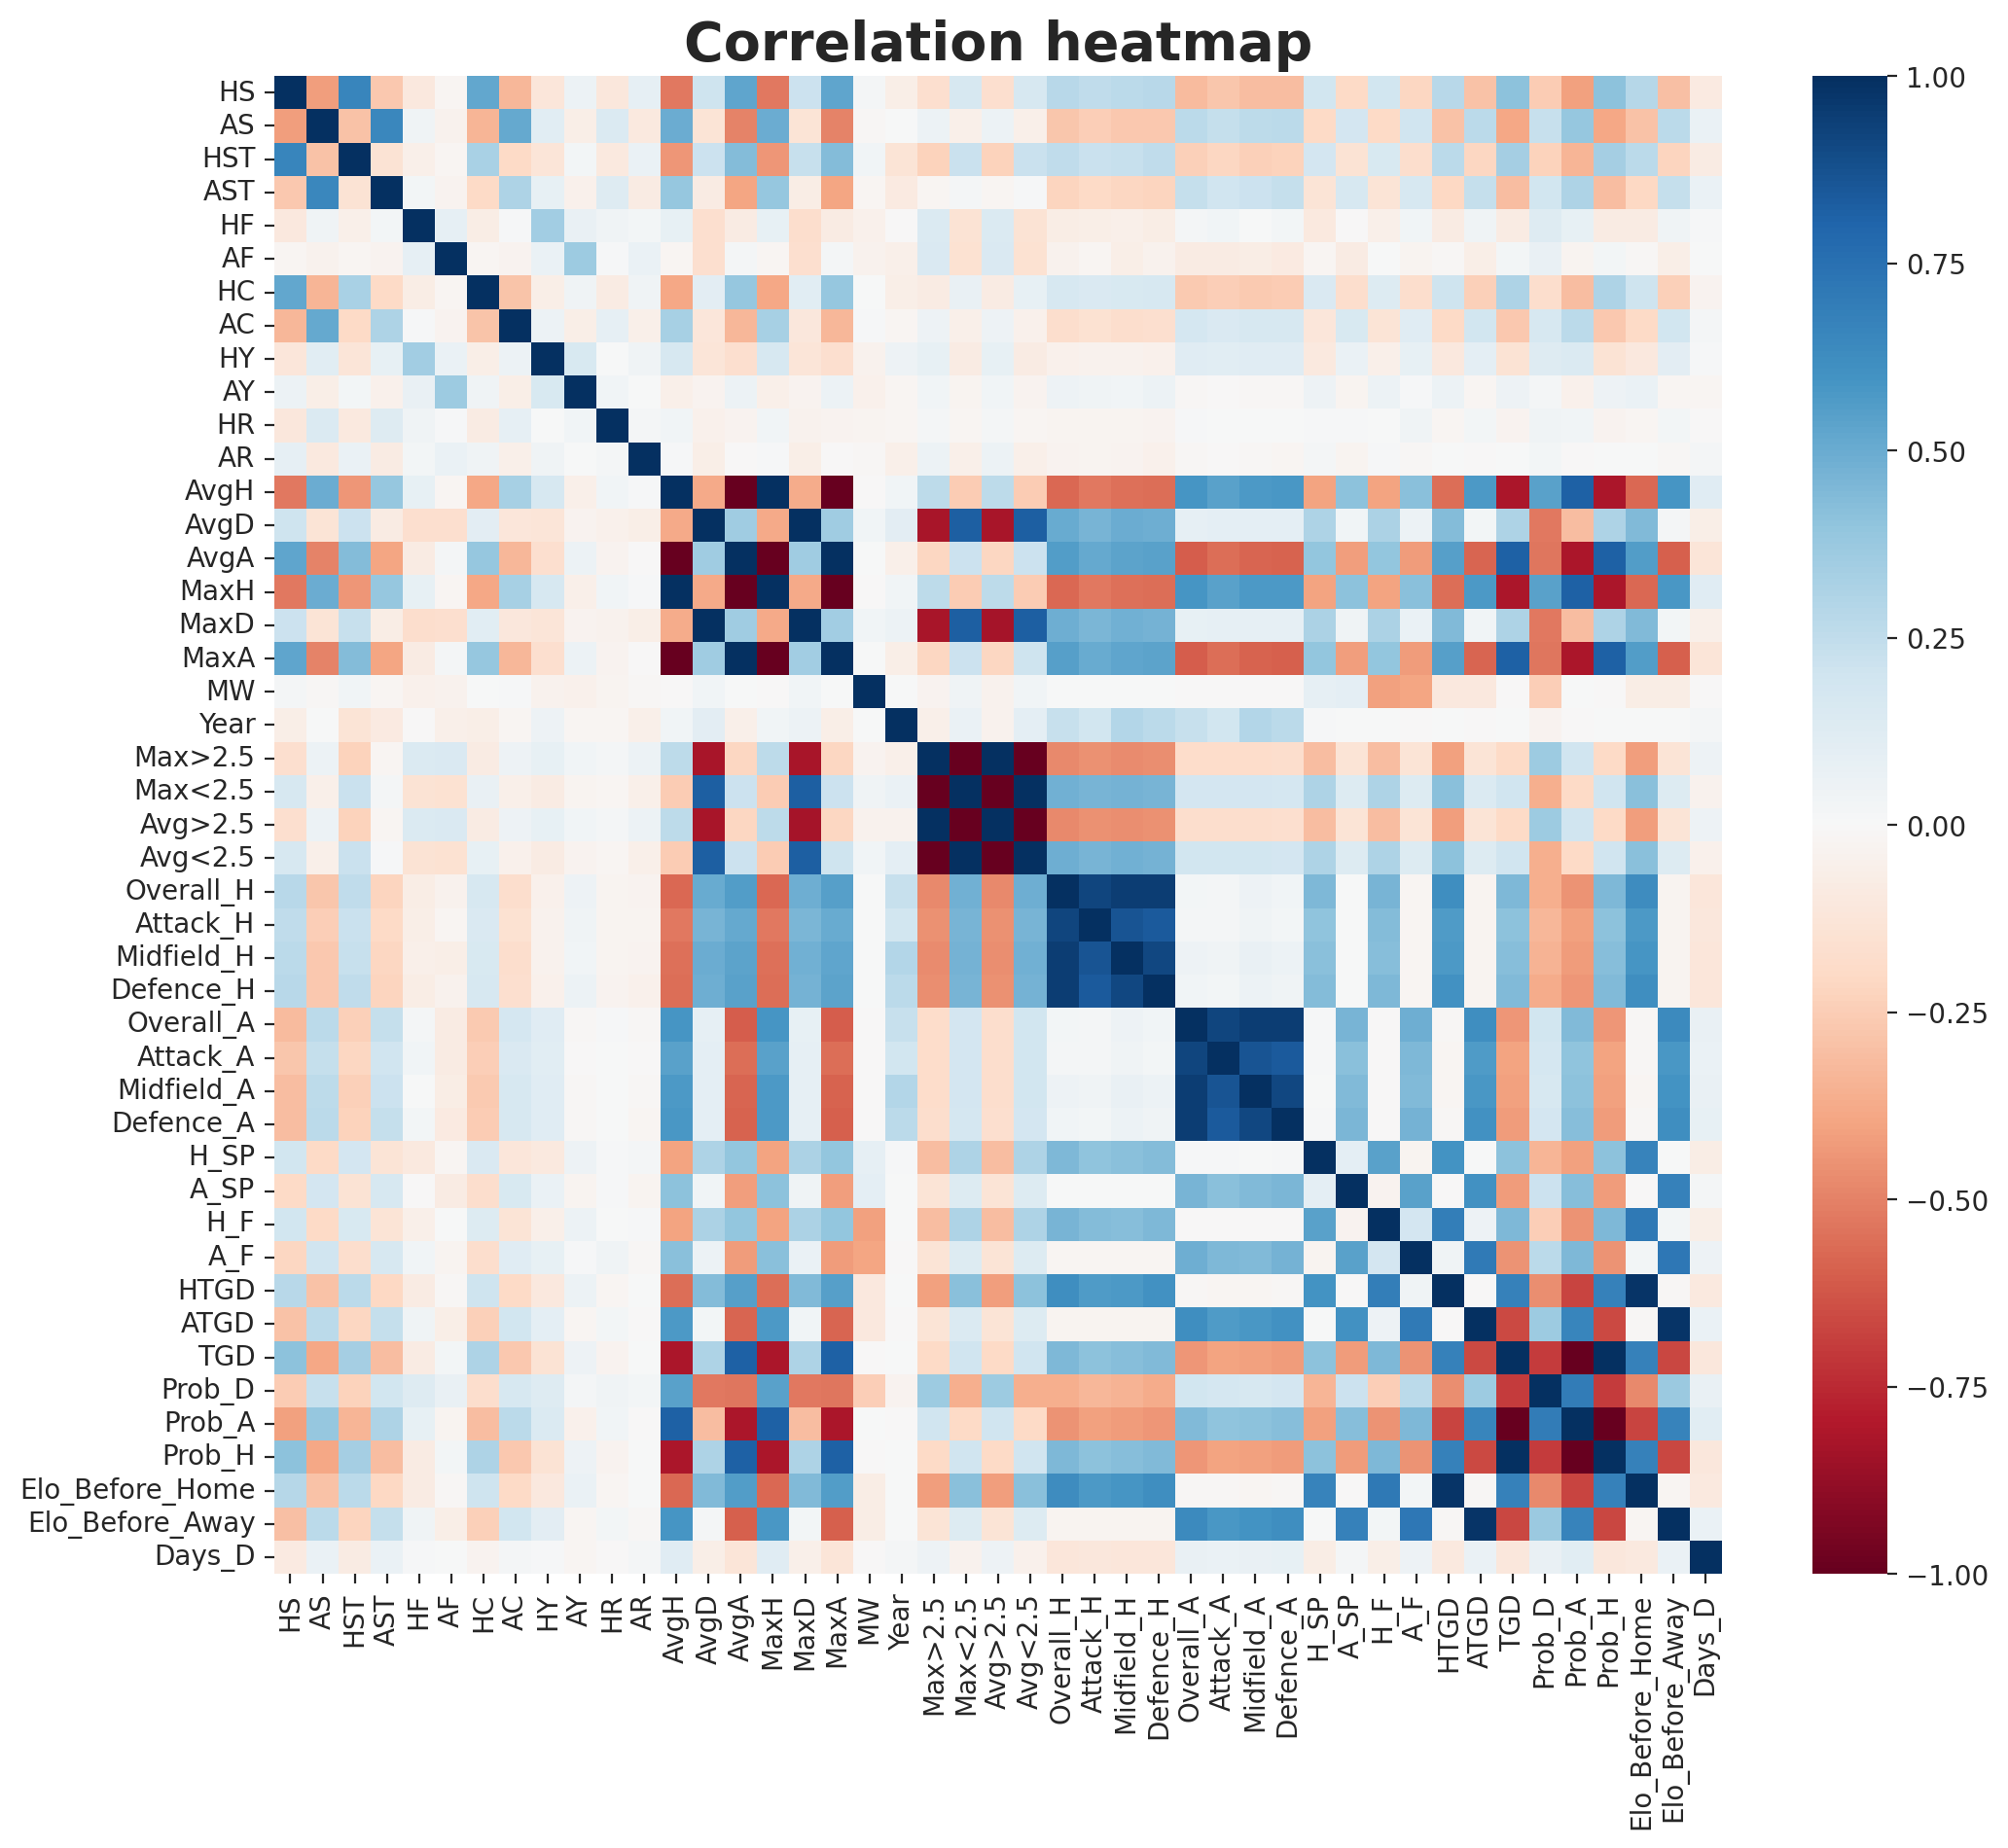

In [ ]:
corr_matrix = pl.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

sns.heatmap(corr_matrix, annot=False, cmap="RdBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.title('Correlation heatmap', fontsize=20, fontweight="bold")
plt.show()

In [ ]:
# Identify features with correlation greater than 0.9
high_corr_features = []
threshold = 0.9

for column in corr_matrix.columns:
    correlated_cols = corr_matrix.index[abs(corr_matrix[column]) > threshold].tolist()
    correlated_cols.remove(column)  # Remove the same column
    for correlated_col in correlated_cols:
        high_corr_features.append((column, correlated_col))

# Display the highly correlated features
print("Highly correlated features:")
for feature_pair in high_corr_features:
    print(f"{feature_pair[0]} - {feature_pair[1]}: {corr_matrix.loc[feature_pair[0], feature_pair[1]]}")

Highly correlated features:
AvgH - AvgA: -0.9973263109946223
AvgH - MaxH: 0.9996162999403845
AvgH - MaxA: -0.9966232716983291
AvgD - MaxD: 0.9926282812277348
AvgA - AvgH: -0.9973263109946223
AvgA - MaxH: -0.9968879343502967
AvgA - MaxA: 0.99953313819222
MaxH - AvgH: 0.9996162999403845
MaxH - AvgA: -0.9968879343502967
MaxH - MaxA: -0.9961468733403305
MaxD - AvgD: 0.9926282812277348
MaxA - AvgH: -0.9966232716983291
MaxA - AvgA: 0.99953313819222
MaxA - MaxH: -0.9961468733403305
Max>2.5 - Max<2.5: -0.9938562089933876
Max>2.5 - Avg>2.5: 0.9979274088687614
Max>2.5 - Avg<2.5: -0.9960034291128426
Max<2.5 - Max>2.5: -0.9938562089933876
Max<2.5 - Avg>2.5: -0.9954108190294724
Max<2.5 - Avg<2.5: 0.9966610877659121
Avg>2.5 - Max>2.5: 0.9979274088687614
Avg>2.5 - Max<2.5: -0.9954108190294724
Avg>2.5 - Avg<2.5: -0.9966467654600529
Avg<2.5 - Max>2.5: -0.9960034291128426
Avg<2.5 - Max<2.5: 0.9966610877659121
Avg<2.5 - Avg>2.5: -0.9966467654600529
Overall_H - Attack_H: 0.9180663468280399
Overall_H - Mid

In [ ]:
pl = pl.drop(columns=['HTGD','ATGD','Prob_A','Prob_H'])

In [ ]:
len(pl.columns)

42

## **Calculating the difference of some features to drop them from model building**

In [ ]:
# calcualating the difference parameters so that individual parameters can be dropped and hence the overall parameters can be brought to
# 48 in total number. Hence i can make a sqaure structure

pl['form_diff'] = pl['H_F'] - pl['A_F']
pl['SP_diff'] = pl['H_SP'] - pl['A_SP']
pl['Overall_diff'] = pl['Overall_H'] - pl['Overall_A']
pl['Attack_diff'] = pl['Attack_H'] - pl['Attack_A']
pl['Midfield_diff'] = pl['Midfield_H'] - pl['Midfield_A']
pl['Defence_diff'] = pl['Defence_H'] - pl['Defence_A']

In [ ]:
# dropping the redundend 12 features in the dataset, so total features can be brought down to 36

pl = pl.drop(columns=['H_F','A_F','H_SP','A_SP','Overall_H','Overall_A', 'Attack_H', \
                                       'Attack_A', 'Midfield_H','Midfield_A','Defence_H','Defence_A' ])

In [ ]:
len(pl.columns)

36

# **Train-test-validation split of the dataset**

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['FTR'])
y = pl['FTR']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# **Hyperparmeter tuning individual models**

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(multi_class='ovr', solver='liblinear')

## scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -1.396419  0.555852 -0.342593  1.196182  0.439857 -0.258782 -0.921011   
1  2.468657 -0.466638  1.760932 -0.838788 -1.043524 -1.097526  0.692840   
2  1.238860  0.146856  0.709170 -0.431794 -0.450171 -2.495432  0.370070   
3 -1.396419  1.373844 -1.394355 -0.024800  0.736533  1.139124 -1.243782   
4 -0.517992  0.351354 -0.693180 -0.024800  0.143181 -0.258782 -0.598241   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0 -0.630620  1.220044 -0.585084  ...         1.341247  0.093985  -2.073264   
1 -0.630620 -0.421615 -1.357973  ...         0.841969 -0.093076  -0.088650   
2 -0.630620 -0.421615 -1.357973  ...        -0.407460 -0.093076   0.087822   
3  2.332769  1.220044  0.960694  ...         2.074483  0.093985  -0.902241   
4  0.480651 -0.421615 -0.585084  ...         0.171091  0.187516  -0.005569   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.171657  0.017384  0.999826     -0.002980    -0.003973      -0.002980   
1 -0.567289  0.005932  0.999979      0.000494    -0.001483       0.001977   
2  2.004324  0.001978  0.999969      0.003462     0.002473       0.004451   
3 -0.171657  0.013881  0.999896     -0.001983    -0.001487      -0.001983   
4 -1.160738  0.008436  0.999957     -0.001489    -0.001489      -0.000993   

   Defence_diff  
0     -0.003477  
1      0.000989  
2      0.004451  
3     -0.002479  
4     -0.002978  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.163338  0.073125 -1.073667  0.280915  0.426005  0.298330  1.022407   
1  0.018481 -0.336252 -0.049985 -0.503771 -0.473040 -0.557024 -0.271192   
2  1.654851 -1.769070  0.291242 -0.896114 -0.173358  0.868566  1.992606   
3  0.563938 -1.564382  0.632469 -1.288458 -1.671767 -1.127260  0.375608   
4  0.563938 -1.155005  0.291242 -0.503771  0.426005  1.153684  2.639406   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  0.070750 -0.497892 -1.378599  ...        -0.300668  0.029292  -0.021987   
1  0.070750 -0.497892  0.219811  ...        -0.787930 -0.054452   0.756453   
2 -1.021518  1.159272  4.215836  ...         0.265328  0.029292   0.266892   
3 -1.385607 -0.497892 -0.579394  ...        -0.183157  0.113035   0.124521   
4 -0.657428  2.816437  1.019016  ...        -0.435738 -0.054452  -0.104982   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.758409  0.003968  0.999990     -0.000496    -0.001488      -0.000992   
1  1.721466  0.010874  0.999923      0.002966     0.002471       0.003954   
2  0.688185  0.009910  0.999913      0.003964     0.005946       0.003964   
3  1.721466  0.005934  0.999963      0.002967     0.002473       0.003956   
4  0.481529  0.005462  0.999984      0.000497     0.000993       0.000000   

   Defence_diff  
0      0.000000  
1      0.002471  
2      0.002973  
3      0.002967  
4      0.000497  

[5 rows x 35 columns]

## Fitting a simple model

In [ ]:
lgc = LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
lgc.fit(X_train_scale,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = lgc.predict(X_val_scale)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.73      0.66       210
           D       0.39      0.07      0.13       160
           H       0.67      0.86      0.75       299

    accuracy                           0.63       669
   macro avg       0.55      0.55      0.51       669
weighted avg       0.58      0.63      0.57       669



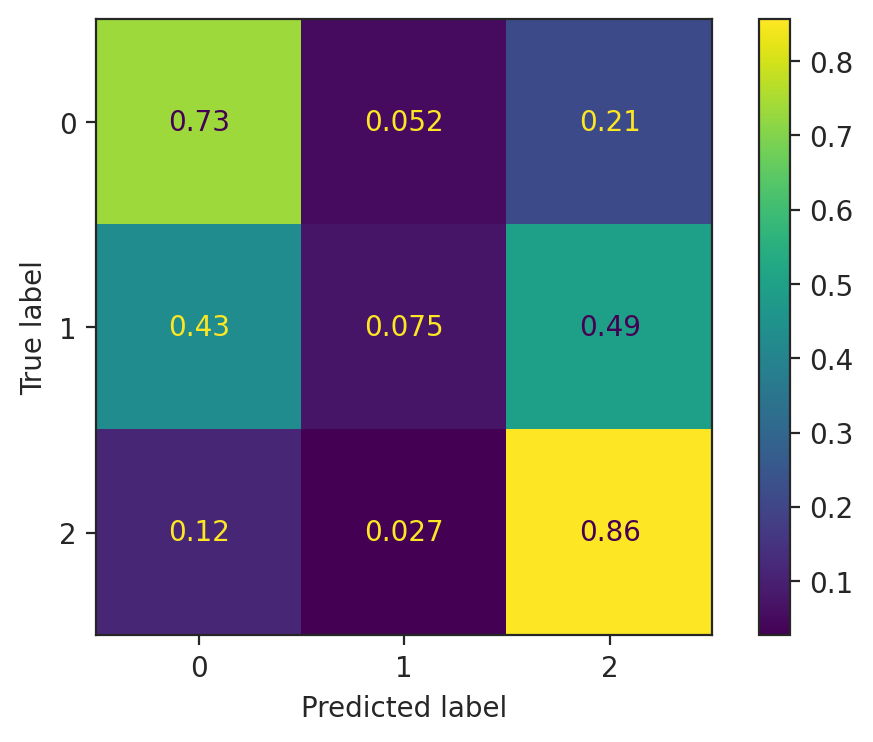

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,lgc.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = lgc.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.6307922272047832

## Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
lgc = LogisticRegression(multi_class='ovr', solver='liblinear')

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(lgc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
lgc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'AC', 'HR', 'AR', 'AvgH', 'AvgA', 'MaxA'], dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = lgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.6188340807174888

## gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}


lg = LogisticRegression(multi_class='ovr', solver='liblinear')

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    238
A    169
D    128
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1193
A     842
D     640
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    955
D    955
A    955
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.5711180502695111

In [ ]:
grid_search.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [ ]:
grid_search.best_index_

8

In [ ]:
lg_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
lg_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_penalty', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
lg_results[['param_C', 'param_class_weight', 'param_penalty','mean_train_score','mean_test_score','rank_test_score']]

param_C param_class_weight param_penalty  mean_train_score  \
8      0.1           balanced            l1          0.577231   
10     0.1               None            l1          0.577130   
16      10           balanced            l1          0.578105   
19      10               None            l2          0.578175   
17      10           balanced            l2          0.578175   
18      10               None            l1          0.578282   
15       1               None            l2          0.577431   
13       1           balanced            l2          0.577431   
14       1               None            l1          0.576667   
12       1           balanced            l1          0.576740   
11     0.1               None            l2          0.574073   
9      0.1           balanced            l2          0.574073   
5     0.01           balanced            l2          0.569919   
7     0.01               None            l2          0.569919   
3    0.001               None            l2          0.523209   
1    0.001           balanced            l2          0.523209   
6     0.01               None            l1          0.507316   
4     0.01           balanced            l1          0.507325   
2    0.001               None            l1          0.166667   
0    0.001           balanced            l1          0.166667   

    mean_test_score  rank_test_score  
8          0.571118                1  
10         0.571118                1  
16         0.568119                3  
19         0.567755                4  
17         0.567755                4  
18         0.567727                6  
15         0.566750                7  
13         0.566750                7  
14         0.566392                9  
12         0.565970               10  
11         0.565701               11  
9          0.565701               11  
5          0.564042               13  
7          0.564042               13  
3          0.521683               15  
1          0.521683               15  
6          0.506307               17  
4          0.506307               17  
2          0.166667               19  
0          0.166667               19

<ipython-input-30-3515e3dbcb03>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=lg_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
<ipython-input-30-3515e3dbcb03>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=lg_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)


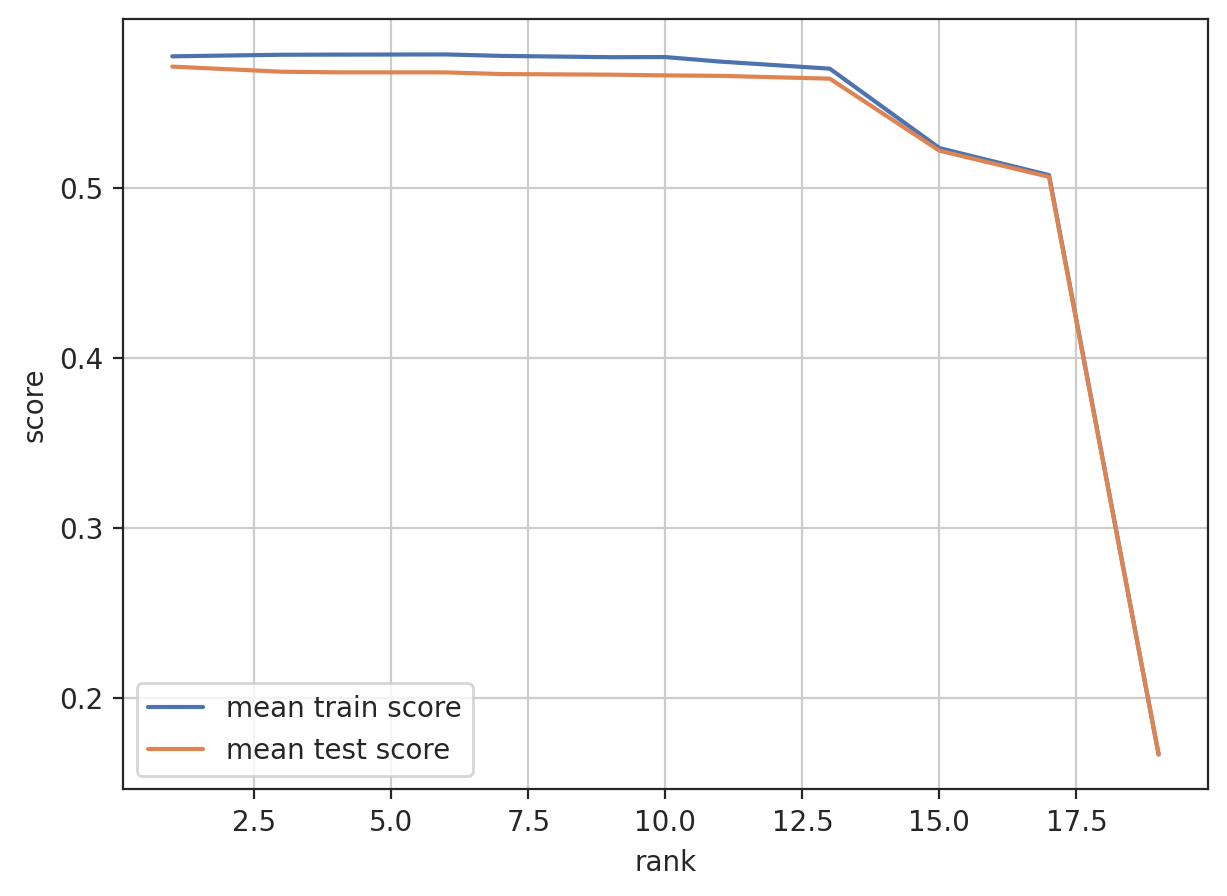

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=lg_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=lg_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_lgc = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_lgc.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.69      0.64       210
           D       0.30      0.29      0.29       160
           H       0.72      0.65      0.68       299

    accuracy                           0.58       669
   macro avg       0.54      0.54      0.54       669
weighted avg       0.58      0.58      0.58       669



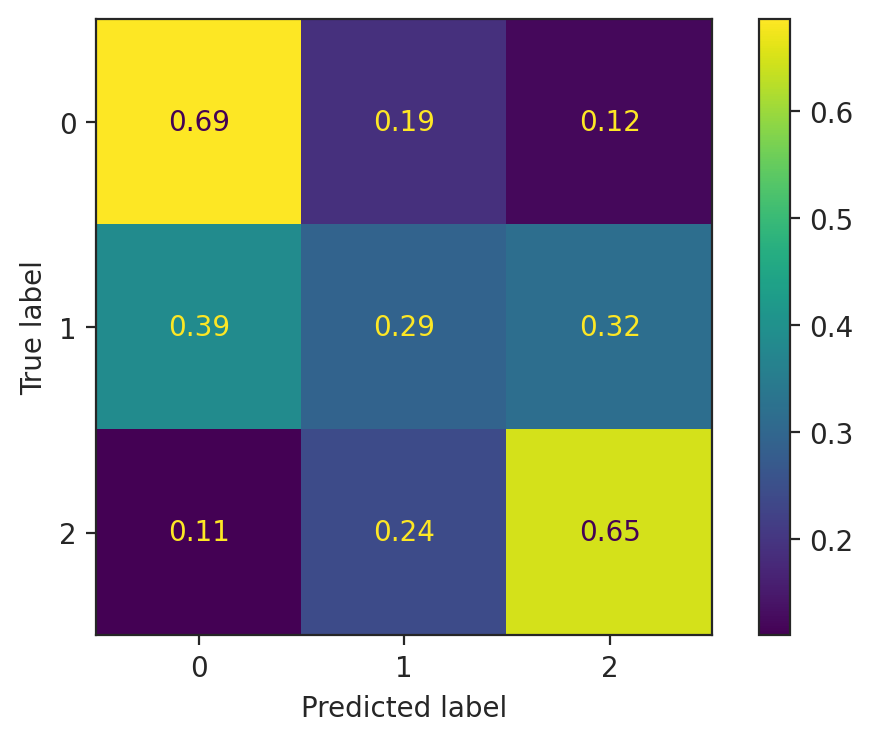

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_lgc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = winning_lgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5754857997010463

# **RandomForest classifier**

### **Fitting a simple model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred_rfc = rfc.predict(X_val)
class_report_rfc = classification_report(y_val, y_pred_rfc)
print("\nClassification Report:")
print(class_report_rfc)


Classification Report:
              precision    recall  f1-score   support

           A       0.55      0.62      0.58       210
           D       0.38      0.12      0.18       160
           H       0.62      0.80      0.70       299

    accuracy                           0.58       669
   macro avg       0.52      0.51      0.49       669
weighted avg       0.54      0.58      0.54       669



In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = rfc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.57847533632287

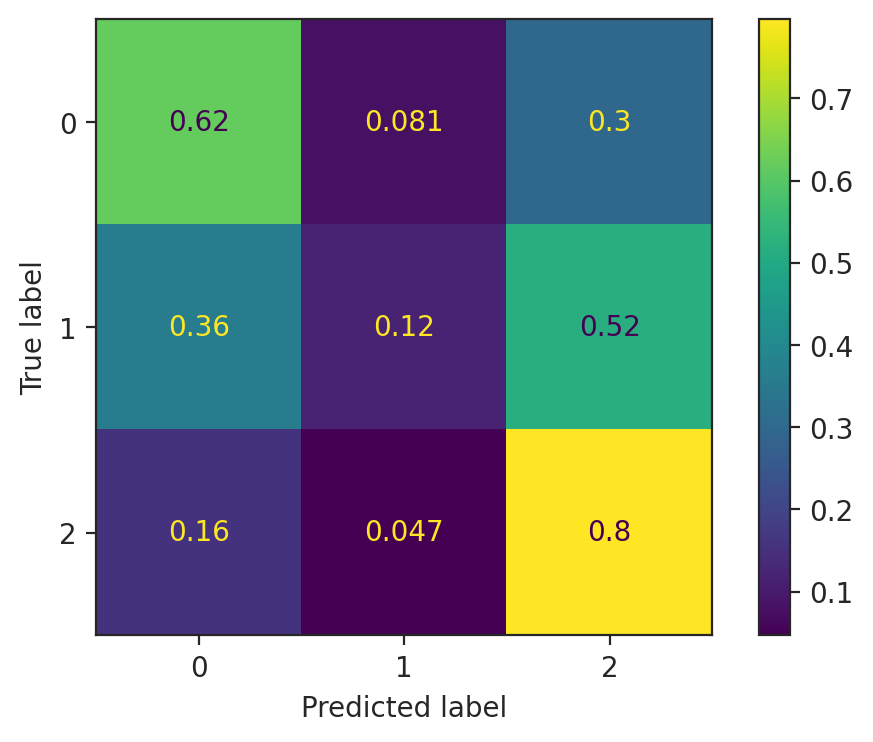

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,rfc.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
rfc = RandomForestClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(rfc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the rfc to your training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
rfc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'MaxH', 'Max<2.5', 'Overall_diff'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = rfc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.593423019431988

### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'n_estimators': [5,10,50,100],
    'max_depth': [3,5,8,10,20],
    'min_samples_split': [2,5,8,10,20],
    'min_samples_leaf':[2,5,10,20],
    'n_jobs':[-1],
    'random_state':[42]
}


rfc = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

FTR
H    238
A    169
D    128
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

FTR
H    1193
A     842
D     640
Name: count, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

FTR
H    955
D    955
A    955
Name: count, dtype: int64

In [ ]:
grid_search.best_score_

0.6875346176716379

In [ ]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 42}

In [ ]:
grid_search.best_index_

322

In [ ]:
rfc_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
rfc_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'param_n_jobs', 'param_random_state', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
rfc_results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split','param_n_estimators','mean_train_score','mean_test_score','rank_test_score']]

param_max_depth param_min_samples_leaf param_min_samples_split  \
322              20                      2                       2   
323              20                      2                       2   
326              20                      2                       5   
327              20                      2                       5   
331              20                      2                       8   
..              ...                    ...                     ...   
61                3                     20                       2   
65                3                     20                       5   
69                3                     20                       8   
73                3                     20                      10   
77                3                     20                      20   

    param_n_estimators  mean_train_score  mean_test_score  rank_test_score  
322                 50          0.990760         0.687535                1  
323                100          0.992939         0.685181                2  
326                 50          0.985884         0.680028                3  
327                100          0.989284         0.679874                4  
331                100          0.969035         0.673516                5  
..                 ...               ...              ...              ...  
61                  10          0.559146         0.529029              396  
65                  10          0.559146         0.529029              396  
69                  10          0.559146         0.529029              396  
73                  10          0.559146         0.529029              396  
77                  10          0.559146         0.529029              396  

[400 rows x 7 columns]

/tmp/ipykernel_32/4022661258.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
/tmp/ipykernel_32/4022661258.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)


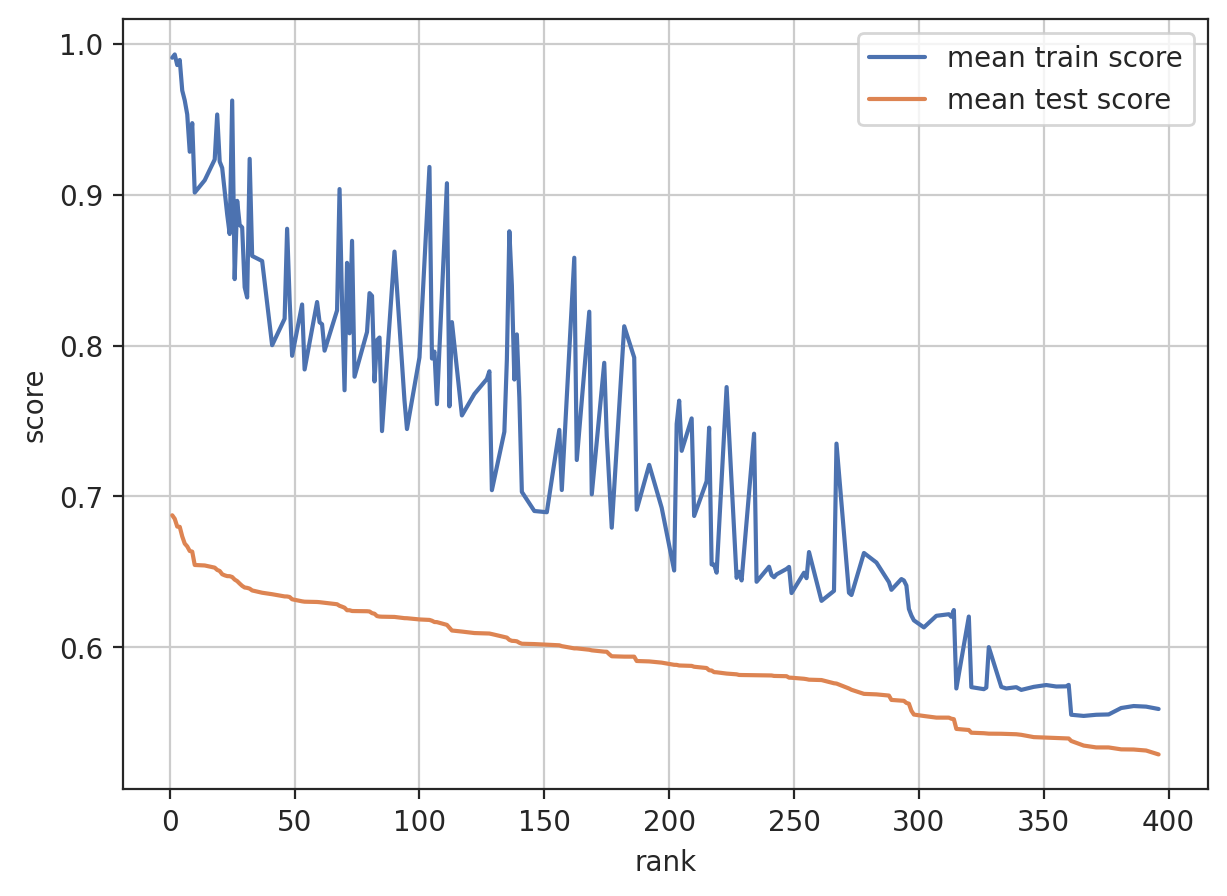

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=rfc_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_rfc = grid_search.best_estimator_

In [ ]:
winning_rfc

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_rfc.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.56      0.68      0.61       210
           D       0.30      0.21      0.25       160
           H       0.72      0.72      0.72       299

    accuracy                           0.59       669
   macro avg       0.53      0.54      0.53       669
weighted avg       0.57      0.59      0.57       669



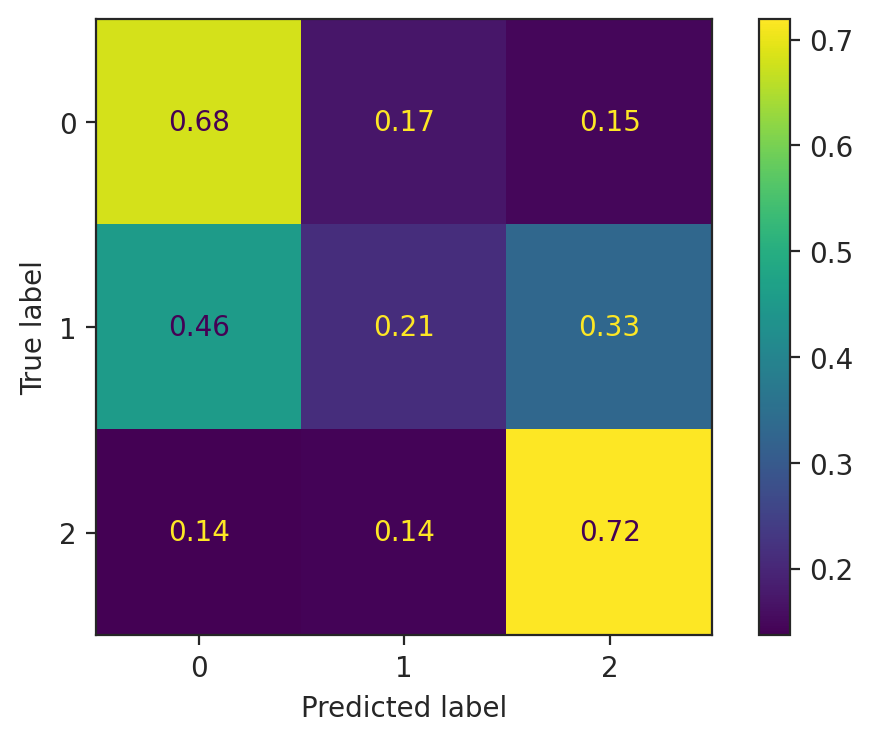

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_rfc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = winning_rfc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.585949177877429

In [ ]:
rfc_results['diff']=abs(rfc_results['mean_train_score']-rfc_results['mean_test_score'])

sorted_table = rfc_results[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',\
                            'param_n_estimators','mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

param_max_depth param_min_samples_leaf param_min_samples_split  \
48                3                     10                       8   
56                3                     10                      20   
52                3                     10                      10   
44                3                     10                       5   
40                3                     10                       2   
..              ...                    ...                     ...   
322              20                      2                       2   
326              20                      2                       5   
323              20                      2                       2   
327              20                      2                       5   
321              20                      2                       2   

    param_n_estimators  mean_train_score  mean_test_score      diff  \
48                   5          0.555331         0.537959  0.017372   
56                   5          0.555331         0.537959  0.017372   
52                   5          0.555331         0.537959  0.017372   
44                   5          0.555331         0.537959  0.017372   
40                   5          0.555331         0.537959  0.017372   
..                 ...               ...              ...       ...   
322                 50          0.990760         0.687535  0.303226   
326                 50          0.985884         0.680028  0.305857   
323                100          0.992939         0.685181  0.307758   
327                100          0.989284         0.679874  0.309410   
321                 10          0.962395         0.646613  0.315782   

     rank_test_score  
48               361  
56               361  
52               361  
44               361  
40               361  
..               ...  
322                1  
326                3  
323                2  
327                4  
321               25  

[400 rows x 8 columns]

In [ ]:
# Select the top model (small gap and high test score)
first_model = sorted_table.iloc[0]

# Display the first model's information
print("first Model:")
print(first_model)

first Model:
param_max_depth                   3
param_min_samples_leaf           10
param_min_samples_split           8
param_n_estimators                5
mean_train_score           0.555331
mean_test_score            0.537959
diff                       0.017372
rank_test_score                 361
Name: 48, dtype: object


In [ ]:
# Define hyperparameters for the first model (adjust these values based on your first model)
first_model_hyperparameters = {
    'max_depth': 3,
    'min_samples_leaf': 10,
    'min_samples_split': 8,
    'n_estimators': 5
}

# Create a new instance of the RandomForestClassifier with the first model's hyperparameters
first_rfc = RandomForestClassifier(**first_model_hyperparameters)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

first_rfc.fit(X_train_fold_resampled, y_train_fold_resampled)

# # Use the first model estimator to make predictions
# X_val_selected = X_val[selected_feature_names]
# y_val_pred = first_rfc.predict(X_val_selected)

# # Calculate the validation accuracy
# val_accuracy = accuracy_score(y_val, y_val_pred)

# # Print the validation accuracy
# print("Validation Accuracy:", val_accuracy)


RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=8,
                       n_estimators=5)

In [ ]:
X_train_fold_resampled.columns

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'MaxH', 'Max<2.5', 'Overall_diff'],
      dtype='object')

In [ ]:
X_val_selected.columns

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'MaxH', 'Max<2.5', 'Overall_diff'],
      dtype='object')

In [ ]:
# from sklearn.metrics import classification_report

y_pred_rfc = first_rfc.predict(X_val_selected)
class_report_rfc = classification_report(y_val, y_pred_rfc, zero_division='warn')
print("\nClassification Report:")
print(class_report_rfc)



Classification Report:
              precision    recall  f1-score   support

           A       0.52      0.62      0.57       210
           D       0.28      0.35      0.31       160
           H       0.72      0.53      0.61       299

    accuracy                           0.52       669
   macro avg       0.51      0.50      0.50       669
weighted avg       0.55      0.52      0.53       669



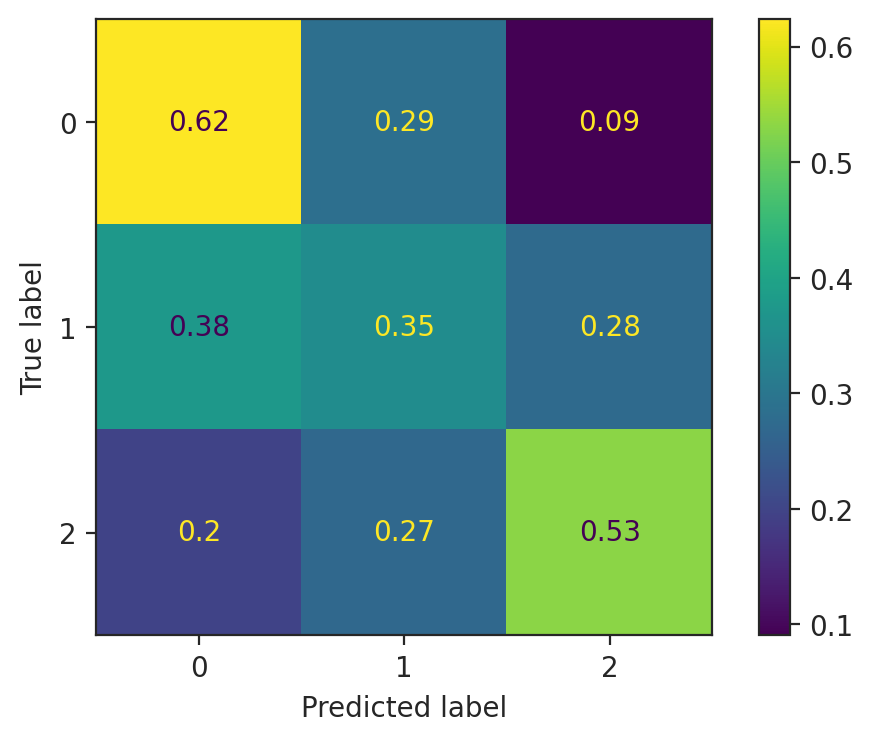

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,first_rfc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Calculate the index of the middle row
middle_index = len(sorted_table) // 2

# Select the model from the middle
middle_model = sorted_table.iloc[middle_index]
middle_model

param_max_depth                  20
param_min_samples_leaf           20
param_min_samples_split          10
param_n_estimators               10
mean_train_score           0.691222
mean_test_score            0.590954
diff                       0.100268
rank_test_score                 187
Name: 393, dtype: object

In [ ]:
# Define hyperparameters for the middle model (adjust these values based on your middle model)
middle_model_hyperparameters = {
    'max_depth': 20,
    'min_samples_leaf': 20,
    'min_samples_split': 10,
    'n_estimators': 10
}

# Create a new instance of the RandomForestClassifier with the middle model's hyperparameters
middle_rfc = RandomForestClassifier(**middle_model_hyperparameters)

# Fit the model to your training data
middle_rfc.fit(X_train_selected, y_train)

# Use the middle model estimator to make predictions
X_val_selected = X_val[selected_feature_names]
y_val_pred = middle_rfc.predict(X_val_selected)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.5874439461883408


In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = middle_rfc.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.58      0.66      0.61       210
           D       0.33      0.06      0.10       160
           H       0.61      0.82      0.70       299

    accuracy                           0.59       669
   macro avg       0.51      0.51      0.47       669
weighted avg       0.53      0.59      0.53       669



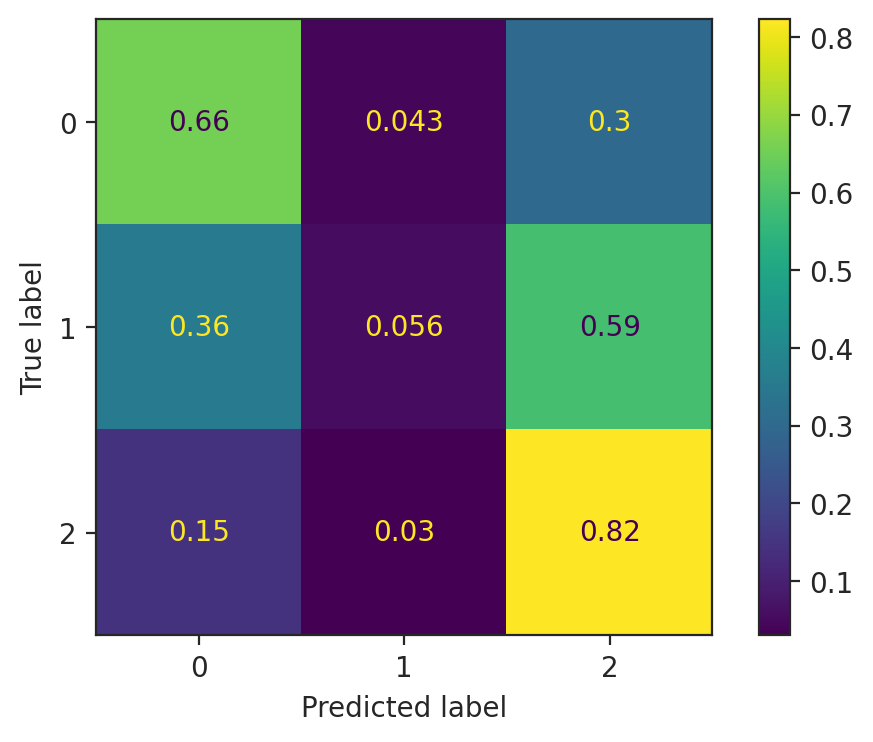

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,middle_rfc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# **HistGradientBoosting classifier**

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['FTR'])
y = pl['FTR']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

### **Fitting a simple model**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgc = HistGradientBoostingClassifier()

In [ ]:
hgc.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred_hgc = hgc.predict(X_val)
class_report_hgc = classification_report(y_val, y_pred_hgc)
print("\nClassification Report:")
print(class_report_hgc)


Classification Report:
              precision    recall  f1-score   support

           A       0.57      0.67      0.62       210
           D       0.34      0.16      0.22       160
           H       0.66      0.77      0.71       299

    accuracy                           0.59       669
   macro avg       0.53      0.53      0.52       669
weighted avg       0.56      0.59      0.57       669



In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = hgc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.593423019431988

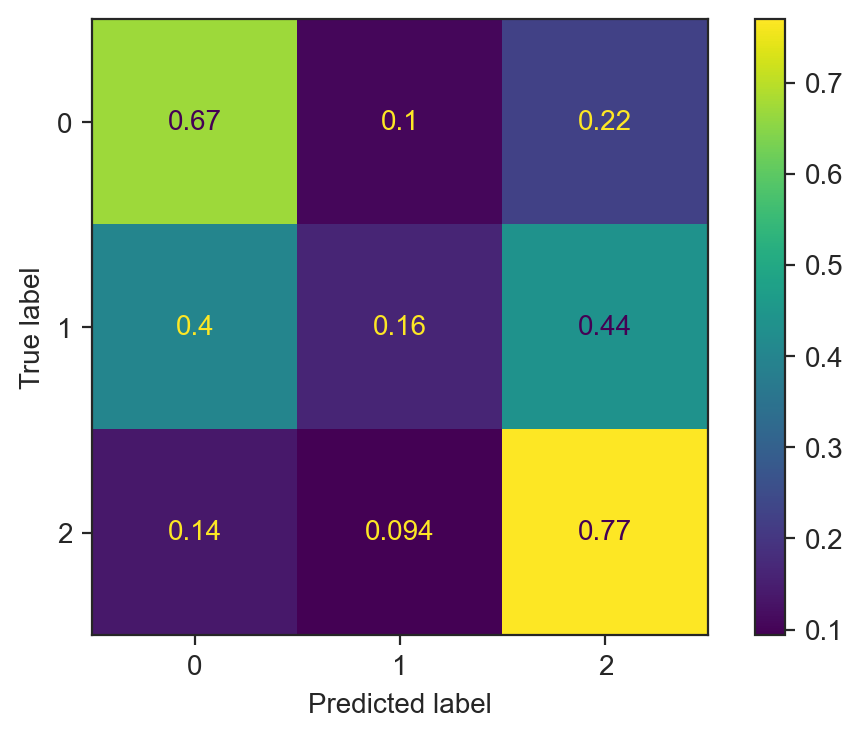

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,hgc.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### **Sequential feature selection**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
hgc = HistGradientBoostingClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(hgc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the hgc to your training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
hgc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'HF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'AvgH', 'AvgA', 'MaxH', 'MaxA', 'Year', 'Max>2.5', 'Max<2.5', 'Avg>2.5',
       'TGD', 'Elo_Before_Home', 'Days_D', 'SP_diff', 'Overall_diff',
       'Attack_diff'],
      dtype='object')


In [ ]:

# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = hgc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5814648729446936

In [ ]:
X_train_selected

HS    AS   HST  AST    HF    HC    AC   HY   AY   HR  ...  Year  \
349    6.0  14.0   4.0  7.0  12.0   3.0   3.0  3.0  1.0  0.0  ...  2013   
3918  28.0   9.0  10.0  2.0   7.0   8.0   3.0  1.0  0.0  0.0  ...  2023   
3457  21.0  12.0   7.0  3.0   9.0   7.0   3.0  1.0  0.0  0.0  ...  2022   
1793   6.0  18.0   1.0  4.0  13.0   2.0  11.0  3.0  3.0  0.0  ...  2017   
926   11.0  13.0   3.0  4.0  11.0   4.0   6.0  1.0  1.0  0.0  ...  2015   
...    ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...   ...   
3229  23.0  12.0   6.0  5.0  10.0  11.0   0.0  2.0  1.0  0.0  ...  2021   
1848  15.0  13.0   7.0  4.0   8.0   6.0   2.0  0.0  0.0  0.0  ...  2017   
1629   9.0  12.0   2.0  4.0  11.0   6.0   4.0  4.0  1.0  0.0  ...  2017   
462   13.0  10.0   4.0  4.0  12.0   4.0   3.0  0.0  0.0  0.0  ...  2014   
689   10.0  16.0   1.0  7.0   8.0  12.0   7.0  2.0  1.0  0.0  ...  2014   

      Max>2.5  Max<2.5  Avg>2.5  TGD  Elo_Before_Home  Days_D   SP_diff  \
349      1.81     2.20     1.75  -41       902.970097     1.0 -0.066667   
3918     1.81     2.22     1.73  -12      1009.413664    -1.0 -0.200000   
3457     1.49     2.96     1.44    9      1033.171385    -1.0  0.666667   
1793     1.67     2.40     1.62  -44       923.630475     1.0 -0.066667   
926      2.15     1.85     2.04    9      1042.113576     2.0 -0.400000   
...       ...      ...      ...  ...              ...     ...       ...   
3229     2.37     1.70     2.28   22       964.313605     1.0  0.066667   
1848     2.18     1.81     2.07   13       939.425733     0.0  0.333333   
1629     1.80     2.21     1.73   -4       948.199817     1.0 -0.266667   
462      1.67     2.40     1.61  -20       923.179543    -2.0 -0.866667   
689      1.99     1.97     1.89  -14       973.187164     1.0  0.133333   

      Overall_diff  Attack_diff  
349             -6           -8  
3918             1           -3  
3457             7            5  
1793            -4           -3  
926             -3           -3  
...            ...          ...  
3229             7            9  
1848             0           -2  
1629             0            1  
462            -10          -10  
689             -8          -10  

[2675 rows x 25 columns]

### **gridsearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'max_iter': [50,100,200],
    'max_depth': [3,5,8,10,20],
    'max_leaf_nodes': [20, 50, 100, 200],
    'min_samples_leaf':[2,5,10,20],
    'random_state':[42],
    'learning_rate': [0.1, 0.5],
    'l2_regularization': [0,0.1,0.01]

}


hgc = HistGradientBoostingClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=hgc, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

H    238
A    169
D    128
Name: FTR, dtype: int64

In [ ]:
y_train.value_counts()

H    1193
A     842
D     640
Name: FTR, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

H    955
D    955
A    955
Name: FTR, dtype: int64

In [ ]:
grid_search.best_score_

0.7202002432981028

In [ ]:
grid_search.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.5,
 'max_depth': 20,
 'max_iter': 50,
 'max_leaf_nodes': 200,
 'min_samples_leaf': 10,
 'random_state': 42}

In [ ]:
grid_search.best_index_

446

In [ ]:
hgb_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
hgb_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_l2_regularization', 'param_learning_rate', 'param_max_depth',
       'param_max_iter', 'param_max_leaf_nodes', 'param_min_samples_leaf',
       'param_random_state', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
hgb_results[['param_max_iter', 'param_max_depth', 'param_max_leaf_nodes','param_min_samples_leaf','param_learning_rate','param_l2_regularization','mean_train_score','mean_test_score','rank_test_score']]

param_max_iter param_max_depth param_max_leaf_nodes  \
446              50              20                  200   
462             100              20                  200   
1182            100              20                  200   
218             100              20                  100   
1177            100              20                  100   
...             ...             ...                  ...   
490              50               3                  100   
246              50               3                   50   
242              50               3                   20   
250              50               3                  100   
254              50               3                  200   

     param_min_samples_leaf param_learning_rate param_l2_regularization  \
446                      10                 0.5                       0   
462                      10                 0.5                       0   
1182                     10                 0.1                    0.01   
218                      10                 0.1                       0   
1177                      5                 0.1                    0.01   
...                     ...                 ...                     ...   
490                      10                 0.1                     0.1   
246                      10                 0.5                       0   
242                      10                 0.5                       0   
250                      10                 0.5                       0   
254                      10                 0.5                       0   

      mean_train_score  mean_test_score  rank_test_score  
446           1.000000         0.720200                1  
462           1.000000         0.719961                2  
1182          1.000000         0.718379                3  
218           1.000000         0.718136                4  
1177          1.000000         0.717213                5  
...                ...              ...              ...  
490           0.764632         0.638511             1433  
246           0.954865         0.636644             1437  
242           0.954865         0.636644             1437  
250           0.954865         0.636644             1437  
254           0.954865         0.636644             1437  

[1440 rows x 9 columns]

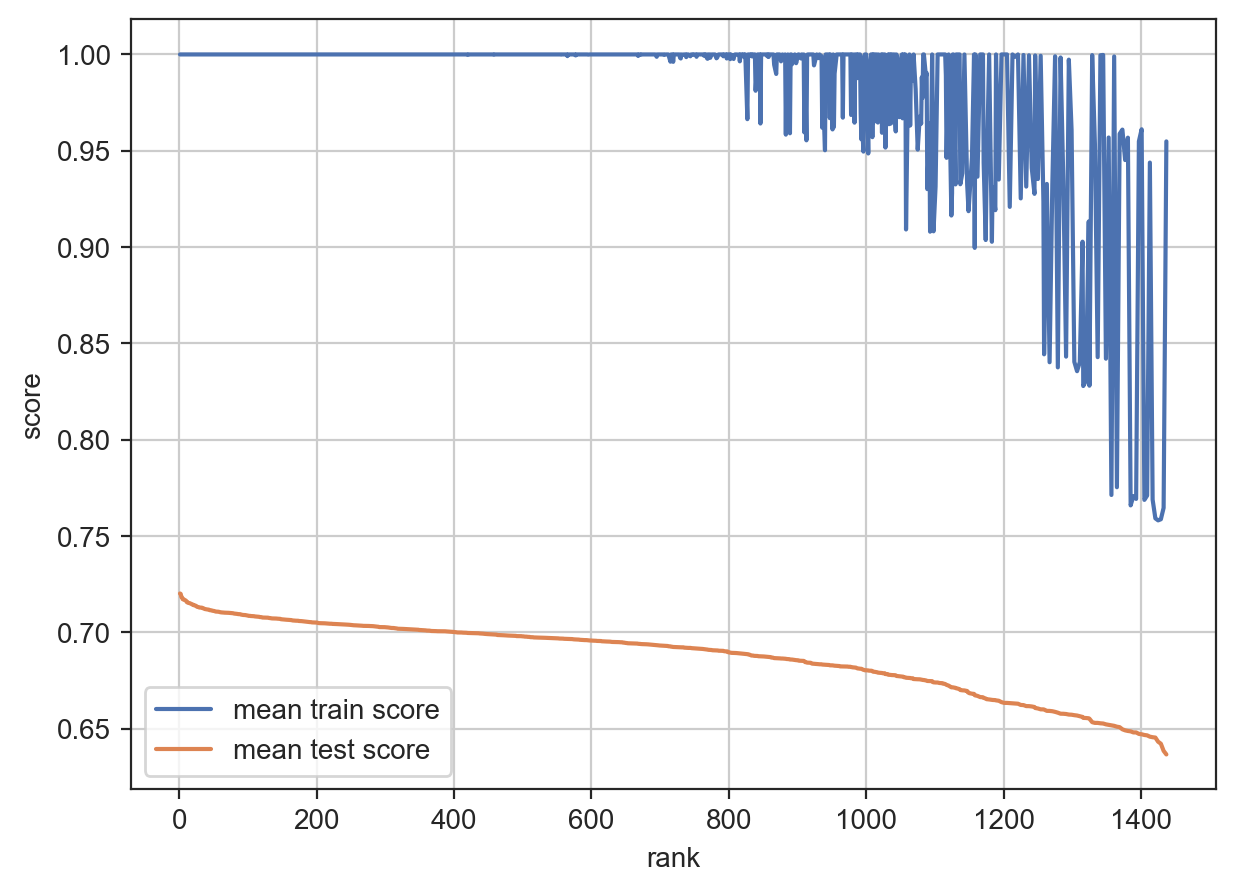

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=hgb_results,x='rank_test_score',y='mean_train_score',ax=ax,ci=None)
sns.lineplot(data=hgb_results,x='rank_test_score',y='mean_test_score',ax=ax,ci=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_hgb = grid_search.best_estimator_

In [ ]:
winning_hgb

HistGradientBoostingClassifier(l2_regularization=0, learning_rate=0.5,
                               max_depth=20, max_iter=50, max_leaf_nodes=200,
                               min_samples_leaf=10, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_hgb = winning_hgb.predict(X_val_selected)
class_report_hgb = classification_report(y_val, y_pred_hgb)
print("\nClassification Report:")
print(class_report_hgb)


Classification Report:
              precision    recall  f1-score   support

           A       0.58      0.63      0.61       210
           D       0.33      0.25      0.28       160
           H       0.67      0.71      0.69       299

    accuracy                           0.58       669
   macro avg       0.53      0.53      0.53       669
weighted avg       0.56      0.58      0.57       669



In [ ]:
X_val_selected

HS    AS  HST  AST    HF    HC   AC   HY   AY   HR  ...  Year  \
1211  13.0  12.0  2.0  5.0  12.0   9.0  5.0  1.0  0.0  0.0  ...  2016   
4015  14.0  10.0  5.0  3.0   9.0   5.0  5.0  1.0  2.0  1.0  ...  2023   
2095  23.0   3.0  6.0  2.0  10.0  12.0  2.0  3.0  7.0  0.0  ...  2018   
3534  17.0   4.0  7.0  1.0   5.0   7.0  1.0  1.0  1.0  0.0  ...  2022   
488   17.0   6.0  6.0  3.0  12.0  14.0  3.0  5.0  3.0  0.0  ...  2014   
...    ...   ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
975   16.0   5.0  3.0  3.0   9.0   9.0  0.0  0.0  2.0  0.0  ...  2015   
3716   9.0  15.0  3.0  7.0   8.0   3.0  8.0  0.0  2.0  0.0  ...  2022   
801   17.0  14.0  6.0  6.0  14.0   5.0  1.0  1.0  2.0  0.0  ...  2015   
2493  10.0   9.0  6.0  2.0   6.0   8.0  5.0  1.0  1.0  0.0  ...  2019   
1607  14.0   6.0  3.0  2.0  11.0  10.0  3.0  3.0  3.0  0.0  ...  2017   

      Max>2.5  Max<2.5  Avg>2.5  TGD  Elo_Before_Home  Days_D   SP_diff  \
1211     2.28     1.73     2.19   -1       961.189633     0.0 -0.266667   
4015     1.90     2.05     1.85   17      1063.551260    -1.0  0.533333   
2095     1.85     2.17     1.75   26      1131.512040     0.0  0.200000   
3534     1.54     2.75     1.49   16      1084.518441     1.0  0.533333   
488      2.32     1.73     2.19    4       989.334073    -1.0  0.133333   
...       ...      ...      ...  ...              ...     ...       ...   
975      2.24     1.81     2.10  -28       972.896942     1.0 -0.600000   
3716     1.77     2.22     1.72  -80       822.682938     0.0 -0.666667   
801      2.32     1.71     2.25   -2       975.914621     0.0 -0.083333   
2493     1.75     2.35     1.68   36      1105.512482     0.0  0.333333   
1607     1.71     2.35     1.66    8      1067.177378     1.0  0.000000   

      Overall_diff  Attack_diff  
1211            -1           -3  
4015             6            5  
2095             8           12  
3534             6            5  
488              1            2  
...            ...          ...  
975              1           -2  
3716            -9           -8  
801             -4           -5  
2493             8            8  
1607             6            8  

[669 rows x 25 columns]

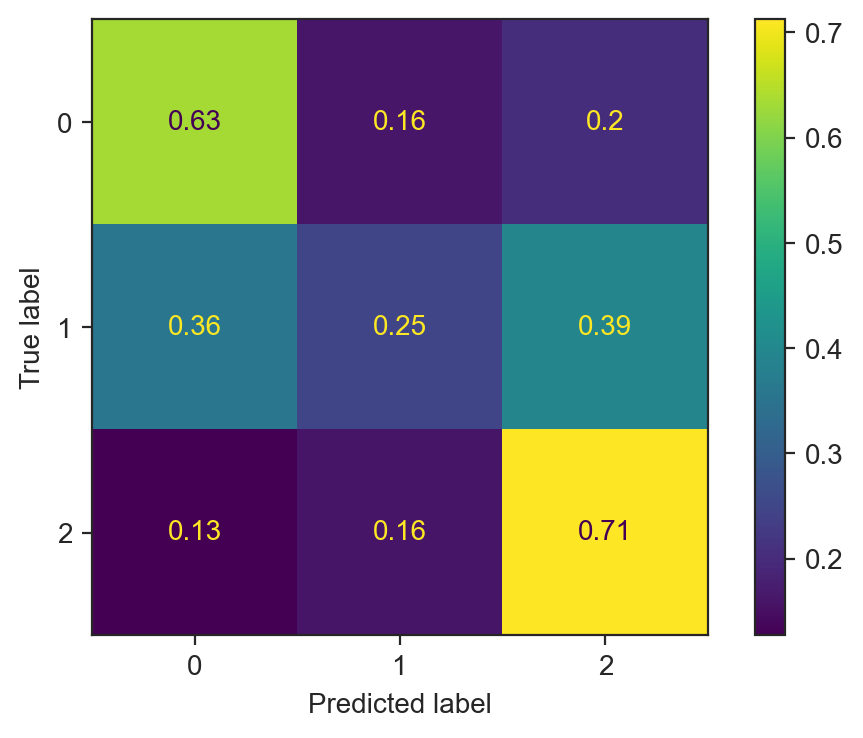

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_hgb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
hgb_results['diff']=abs(hgb_results['mean_train_score']-hgb_results['mean_test_score'])

sorted_table = hgb_results[['param_l2_regularization', 'param_learning_rate', 'param_max_depth',\
       'param_max_iter', 'param_max_leaf_nodes', 'param_min_samples_leaf','mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

param_l2_regularization param_learning_rate param_max_depth  \
495                     0.1                 0.1               3   
491                     0.1                 0.1               3   
483                     0.1                 0.1               3   
487                     0.1                 0.1               3   
971                    0.01                 0.1               3   
..                      ...                 ...             ...   
268                       0                 0.5               3   
266                       0                 0.5               3   
262                       0                 0.5               3   
258                       0                 0.5               3   
270                       0                 0.5               3   

    param_max_iter param_max_leaf_nodes param_min_samples_leaf  \
495             50                  200                     20   
491             50                  100                     20   
483             50                   20                     20   
487             50                   50                     20   
971             50                  100                     20   
..             ...                  ...                    ...   
268            100                  200                      2   
266            100                  100                     10   
262            100                   50                     10   
258            100                   20                     10   
270            100                  200                     10   

     mean_train_score  mean_test_score      diff  rank_test_score  
495          0.759195         0.645402  0.113793             1421  
491          0.759195         0.645402  0.113793             1421  
483          0.759195         0.645402  0.113793             1421  
487          0.759195         0.645402  0.113793             1421  
971          0.758146         0.643257  0.114889             1425  
..                ...              ...       ...              ...  
268          0.999738         0.652697  0.347041             1345  
266          0.998953         0.651493  0.347460             1361  
262          0.998953         0.651493  0.347460             1361  
258          0.998953         0.651493  0.347460             1361  
270          0.998953         0.651493  0.347460             1361  

[1440 rows x 10 columns]

In [ ]:
sorted_table.iloc[0]

param_l2_regularization         0.1
param_learning_rate             0.1
param_max_depth                   3
param_max_iter                   50
param_max_leaf_nodes            200
param_min_samples_leaf           20
mean_train_score           0.759195
mean_test_score            0.645402
diff                       0.113793
rank_test_score                1421
Name: 495, dtype: object

In [ ]:
# Select the top model (small gap and high test score)
first_model = sorted_table.iloc[0]

# Display the first model's information
print("first Model:")
print(first_model)

first Model:
param_l2_regularization         0.1
param_learning_rate             0.1
param_max_depth                   3
param_max_iter                   50
param_max_leaf_nodes            200
param_min_samples_leaf           20
mean_train_score           0.759195
mean_test_score            0.645402
diff                       0.113793
rank_test_score                1421
Name: 495, dtype: object


In [ ]:
# Define hyperparameters for the first model (adjust these values based on your first model)
first_model_hyperparameters = {
    'l2_regularization': 0.1,
    'learning_rate': 0.1,
    'max_depth': 3,
    'max_leaf_nodes': 200,
    'min_samples_leaf': 20,
    'max_iter': 50
}

# Create a new instance of the HistGradientBoostingClassifier with the first model's hyperparameters
first_hgb = HistGradientBoostingClassifier(**first_model_hyperparameters)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

first_hgb.fit(X_train_fold_resampled, y_train_fold_resampled)

y_val_pred = first_hgb.predict(X_val_selected)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.5844544095665172


In [ ]:
from sklearn.metrics import classification_report

y_pred_hgb = first_hgb.predict(X_val_selected)
class_report_hgb = classification_report(y_val, y_pred_hgb)
print("\nClassification Report:")
print(class_report_hgb)


Classification Report:
              precision    recall  f1-score   support

           A       0.57      0.66      0.61       210
           D       0.35      0.29      0.32       160
           H       0.71      0.69      0.70       299

    accuracy                           0.58       669
   macro avg       0.54      0.55      0.54       669
weighted avg       0.58      0.58      0.58       669



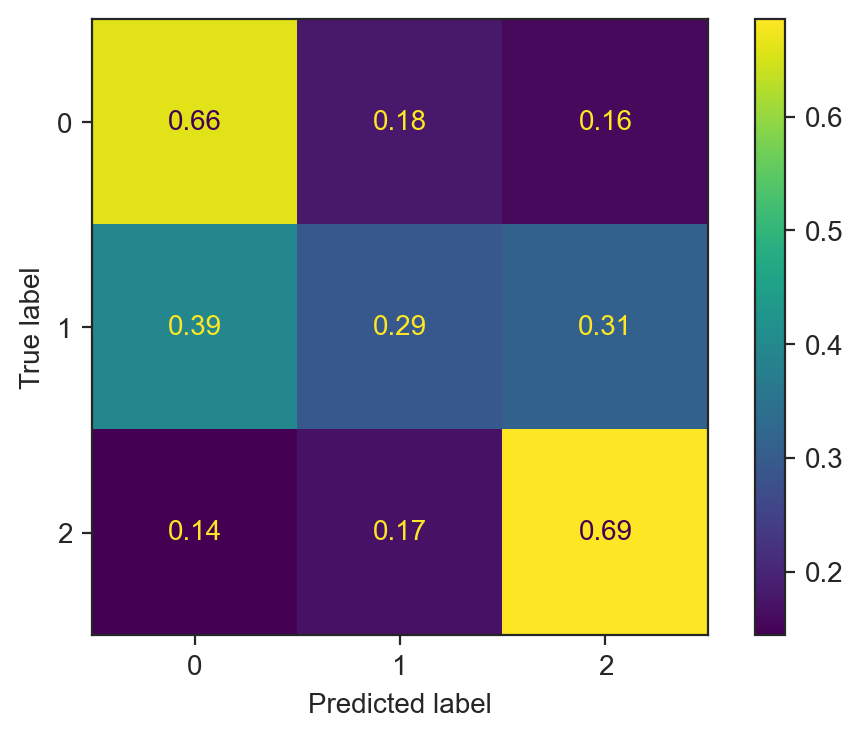

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,first_hgb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# **K- Nearest neighbor**

### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
sdscaling_transformer=Pipeline(
    steps=[
        ("standard",StandardScaler()),

    ]
)

sdscaling_transformer

Pipeline(steps=[('standard', StandardScaler())])

In [ ]:
normscaling_transformer=Pipeline(
    steps=[
        ("normalize",MinMaxScaler()),

    ]
)

normscaling_transformer

Pipeline(steps=[('normalize', MinMaxScaler())])

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ("std",sdscaling_transformer,std_cols),
        ("norm",normscaling_transformer,norm_cols)
    ],
    remainder='passthrough',verbose_feature_names_out=False
).set_output(transform="pandas")

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('std',
                                 Pipeline(steps=[('standard',
                                                  StandardScaler())]),
                                 ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
                                  'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD',
                                  'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
                                  'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD',
                                  'Prob_D', 'Elo_Before_Home',
                                  'Elo_Before_Away', 'Days_D', 'form_diff',
                                  'SP_diff']),
                                ('norm',
                                 Pipeline(steps=[('normalize',
                                                  MinMaxScaler())]),
                                 ['MW', 'Year', 'Overall_diff', 'Attack_diff',
                                  'Midfield_diff', 'Defence_diff'])],
                  verbose_feature_names_out=False)

In [ ]:
X_train_scale = preprocessor.fit_transform(X_train)

X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
349  -1.396419  0.555852 -0.342593  1.196182  0.439857 -0.258782 -0.921011   
3918  2.468657 -0.466638  1.760932 -0.838788 -1.043524 -1.097526  0.692840   
3457  1.238860  0.146856  0.709170 -0.431794 -0.450171 -2.495432  0.370070   
1793 -1.396419  1.373844 -1.394355 -0.024800  0.736533  1.139124 -1.243782   
926  -0.517992  0.351354 -0.693180 -0.024800  0.143181 -0.258782 -0.598241   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
349  -0.630620  1.220044 -0.585084  ...         1.341247  0.093985  -2.073264   
3918 -0.630620 -0.421615 -1.357973  ...         0.841969 -0.093076  -0.088650   
3457 -0.630620 -0.421615 -1.357973  ...        -0.407460 -0.093076   0.087822   
1793  2.332769  1.220044  0.960694  ...         2.074483  0.093985  -0.902241   
926   0.480651 -0.421615 -0.585084  ...         0.171091  0.187516  -0.005569   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
349  -0.171657  0.918919   0.0      0.269231     0.277778       0.275862   
3918 -0.567289  0.297297   1.0      0.538462     0.416667       0.620690   
3457  2.004324  0.081081   0.9      0.769231     0.638889       0.793103   
1793 -0.171657  0.729730   0.4      0.346154     0.416667       0.344828   
926  -1.160738  0.432432   0.2      0.384615     0.416667       0.413793   

      Defence_diff  
349       0.266667  
3918      0.566667  
3457      0.800000  
1793      0.333333  
926       0.300000  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
1211 -0.163338  0.073125 -1.073667  0.280915  0.426005  0.298330  1.022407   
4015  0.018481 -0.336252 -0.049985 -0.503771 -0.473040 -0.557024 -0.271192   
2095  1.654851 -1.769070  0.291242 -0.896114 -0.173358  0.868566  1.992606   
3534  0.563938 -1.564382  0.632469 -1.288458 -1.671767 -1.127260  0.375608   
488   0.563938 -1.155005  0.291242 -0.503771  0.426005  1.153684  2.639406   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
1211  0.070750 -0.497892 -1.378599  ...        -0.300668  0.029292  -0.021987   
4015  0.070750 -0.497892  0.219811  ...        -0.787930 -0.054452   0.756453   
2095 -1.021518  1.159272  4.215836  ...         0.265328  0.029292   0.266892   
3534 -1.385607 -0.497892 -0.579394  ...        -0.183157  0.113035   0.124521   
488  -0.657428  2.816437  1.019016  ...        -0.435738 -0.054452  -0.104982   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
1211 -0.758409  0.189189   0.3      0.461538     0.400000       0.428571   
4015  1.721466  0.567568   1.0      0.730769     0.628571       0.785714   
2095  0.688185  0.513514   0.5      0.807692     0.828571       0.785714   
3534  1.721466  0.297297   0.9      0.730769     0.628571       0.785714   
488   0.481529  0.270270   0.1      0.538462     0.542857       0.500000   

      Defence_diff  
1211      0.500000  
4015      0.666667  
2095      0.700000  
3534      0.700000  
488       0.533333  

[5 rows x 35 columns]

### Fitting simple model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [ ]:
X_train_scale

HS        AS       HST       AST        HF        AF        HC  \
349  -1.396419  0.555852 -0.342593  1.196182  0.439857 -0.258782 -0.921011   
3918  2.468657 -0.466638  1.760932 -0.838788 -1.043524 -1.097526  0.692840   
3457  1.238860  0.146856  0.709170 -0.431794 -0.450171 -2.495432  0.370070   
1793 -1.396419  1.373844 -1.394355 -0.024800  0.736533  1.139124 -1.243782   
926  -0.517992  0.351354 -0.693180 -0.024800  0.143181 -0.258782 -0.598241   
...        ...       ...       ...       ...       ...       ...       ...   
3229  1.590231  0.146856  0.358582  0.382194 -0.153495  0.859542  1.661151   
1848  0.184749  0.351354  0.709170 -0.024800 -0.746848  0.579961  0.047299   
1629 -0.869363  0.146856 -1.043768 -0.024800  0.143181 -0.258782  0.047299   
462  -0.166622 -0.262140 -0.342593 -0.024800  0.439857 -0.817945 -0.598241   
689  -0.693678  0.964848 -1.394355  1.196182 -0.746848 -0.817945  1.983921   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
349  -0.630620  1.220044 -0.585084  ...         1.341247  0.093985  -2.073264   
3918 -0.630620 -0.421615 -1.357973  ...         0.841969 -0.093076  -0.088650   
3457 -0.630620 -0.421615 -1.357973  ...        -0.407460 -0.093076   0.087822   
1793  2.332769  1.220044  0.960694  ...         2.074483  0.093985  -0.902241   
926   0.480651 -0.421615 -0.585084  ...         0.171091  0.187516  -0.005569   
...        ...       ...       ...  ...              ...       ...        ...   
3229 -1.741892  0.399215 -0.585084  ...        -2.084115  0.093985  -0.098232   
1848 -1.001044 -1.242444 -1.357973  ...        -1.608261  0.000455   0.949199   
1629 -0.260197  2.040873 -0.585084  ...        -0.303647  0.093985   0.051921   
462  -0.630620 -1.242444 -1.357973  ...         0.848986 -0.186607  -0.280768   
689   0.851074  0.399215 -0.585084  ...         0.537313  0.093985  -0.753059   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
349  -0.171657  0.918919   0.0      0.269231     0.277778       0.275862   
3918 -0.567289  0.297297   1.0      0.538462     0.416667       0.620690   
3457  2.004324  0.081081   0.9      0.769231     0.638889       0.793103   
1793 -0.171657  0.729730   0.4      0.346154     0.416667       0.344828   
926  -1.160738  0.432432   0.2      0.384615     0.416667       0.413793   
...        ...       ...   ...           ...          ...            ...   
3229  0.223976  0.486486   0.8      0.769231     0.750000       0.758621   
1848  1.015242  0.864865   0.4      0.500000     0.444444       0.482759   
1629 -0.765106  0.270270   0.4      0.500000     0.527778       0.482759   
462  -2.545453  0.216216   0.1      0.115385     0.222222       0.172414   
689   0.421793  0.810811   0.1      0.192308     0.222222       0.310345   

      Defence_diff  
349       0.266667  
3918      0.566667  
3457      0.800000  
1793      0.333333  
926       0.300000  
...            ...  
3229      0.700000  
1848      0.466667  
1629      0.500000  
462       0.133333  
689       0.166667  

[2675 rows x 35 columns]

In [ ]:
print(X_val_scale.dtypes)

HS                 float64
AS                 float64
HST                float64
AST                float64
HF                 float64
AF                 float64
HC                 float64
AC                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
AvgH               float64
AvgD               float64
AvgA               float64
MaxH               float64
MaxD               float64
MaxA               float64
Max>2.5            float64
Max<2.5            float64
Avg>2.5            float64
Avg<2.5            float64
TGD                float64
Prob_D             float64
Elo_Before_Home    float64
Elo_Before_Away    float64
Days_D             float64
form_diff          float64
SP_diff            float64
MW                 float64
Year               float64
Overall_diff       float64
Attack_diff        float64
Midfield_diff      float64
Defence_diff       float64
dtype: object


In [ ]:
from sklearn.metrics import classification_report

y_pred_knn = knn.predict(X_val_scale)
class_report_knn = classification_report(y_val, y_pred_knn)
print("\nClassification Report:")
print(class_report_knn)


Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.63      0.56       210
           D       0.29      0.23      0.25       160
           H       0.65      0.60      0.63       299

    accuracy                           0.52       669
   macro avg       0.48      0.49      0.48       669
weighted avg       0.52      0.52      0.51       669



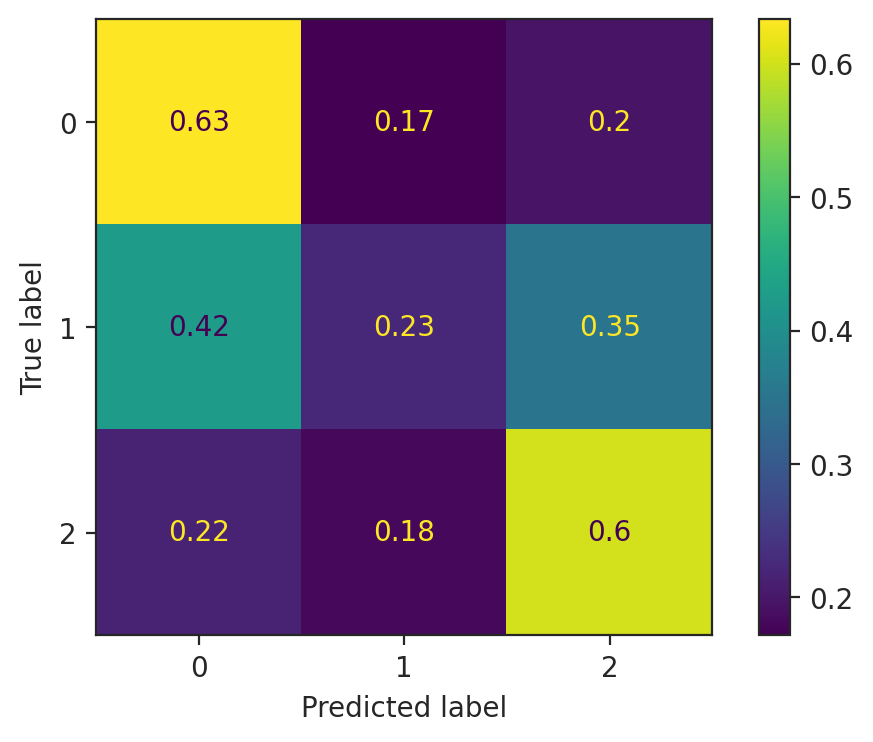

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,knn.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = knn.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5216741405082213

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
knn = KNeighborsClassifier()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(knn,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
knn.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['HS', 'HST', 'AST', 'AC', 'HR', 'AR', 'MaxH', 'MaxD', 'Overall_diff',
       'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = knn.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5440956651718983

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'n_neighbors': [2,5,8,10],
    'weights': ['uniform','distance'],

}


knn = KNeighborsClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scorer, cv=kfold, return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

FTR
H    238
A    169
D    128
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

FTR
H    1193
A     842
D     640
Name: count, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

FTR
H    955
D    955
A    955
Name: count, dtype: int64

In [ ]:
grid_search.best_score_

0.6940107011951664

In [ ]:
grid_search.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
knn_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
knn_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'param_weights', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
knn_results[['param_n_neighbors', 'param_weights','mean_train_score','mean_test_score','rank_test_score']]

param_n_neighbors param_weights  mean_train_score  mean_test_score  \
1                 2      distance          1.000000         0.694011   
3                 5      distance          1.000000         0.668006   
5                 8      distance          1.000000         0.664993   
7                10      distance          1.000000         0.661059   
0                 2       uniform          0.818928         0.623181   
2                 5       uniform          0.744485         0.604728   
6                10       uniform          0.670626         0.593420   
4                 8       uniform          0.689702         0.589465   

   rank_test_score  
1                1  
3                2  
5                3  
7                4  
0                5  
2                6  
6                7  
4                8

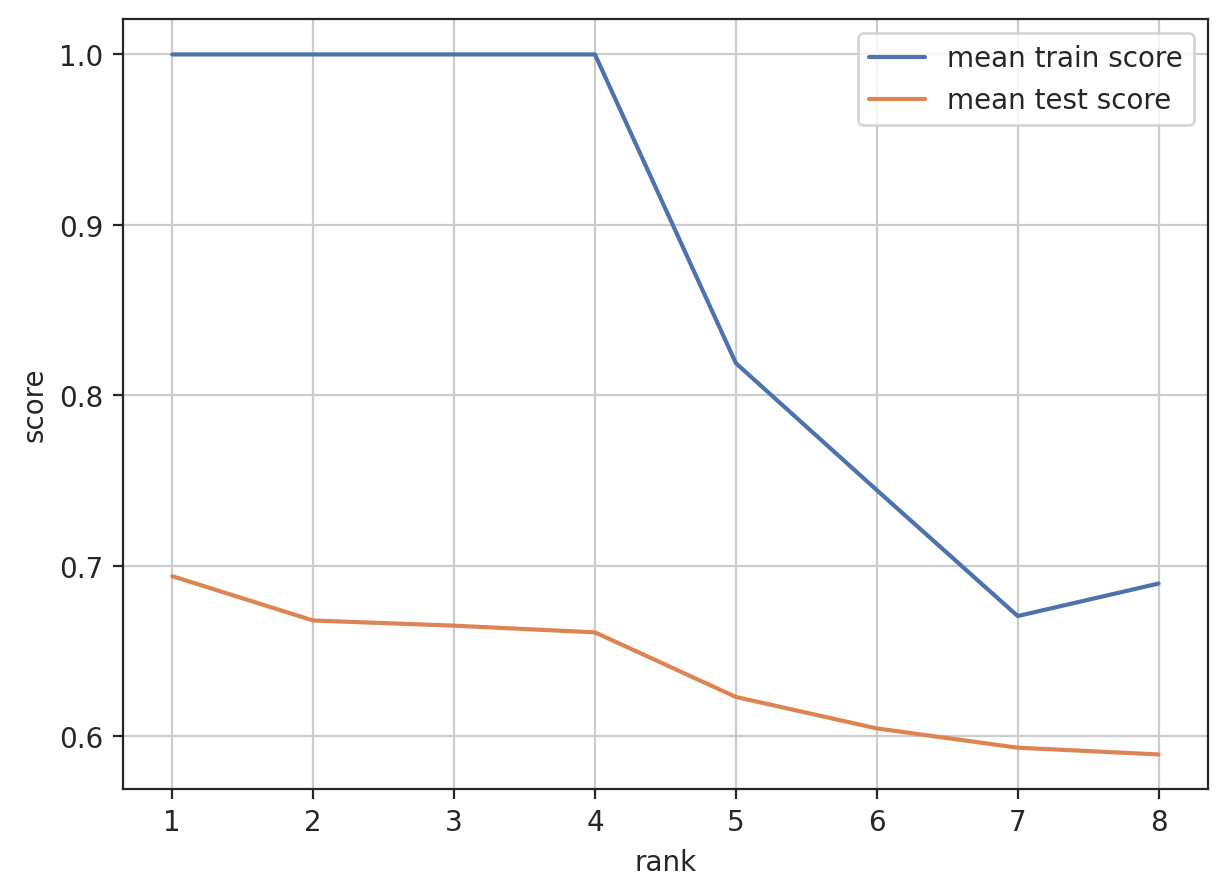

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=knn_results,x='rank_test_score',y='mean_train_score',ax=ax,errorbar=None)
sns.lineplot(data=knn_results,x='rank_test_score',y='mean_test_score',ax=ax,errorbar=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_knn = grid_search.best_estimator_

In [ ]:
winning_knn

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [ ]:
from sklearn.metrics import classification_report

y_pred_lg = winning_knn.predict(X_val_selected)
class_report_lg = classification_report(y_val, y_pred_lg)
print("\nClassification Report:")
print(class_report_lg)


Classification Report:
              precision    recall  f1-score   support

           A       0.49      0.50      0.50       210
           D       0.24      0.26      0.25       160
           H       0.61      0.59      0.60       299

    accuracy                           0.48       669
   macro avg       0.45      0.45      0.45       669
weighted avg       0.49      0.48      0.48       669



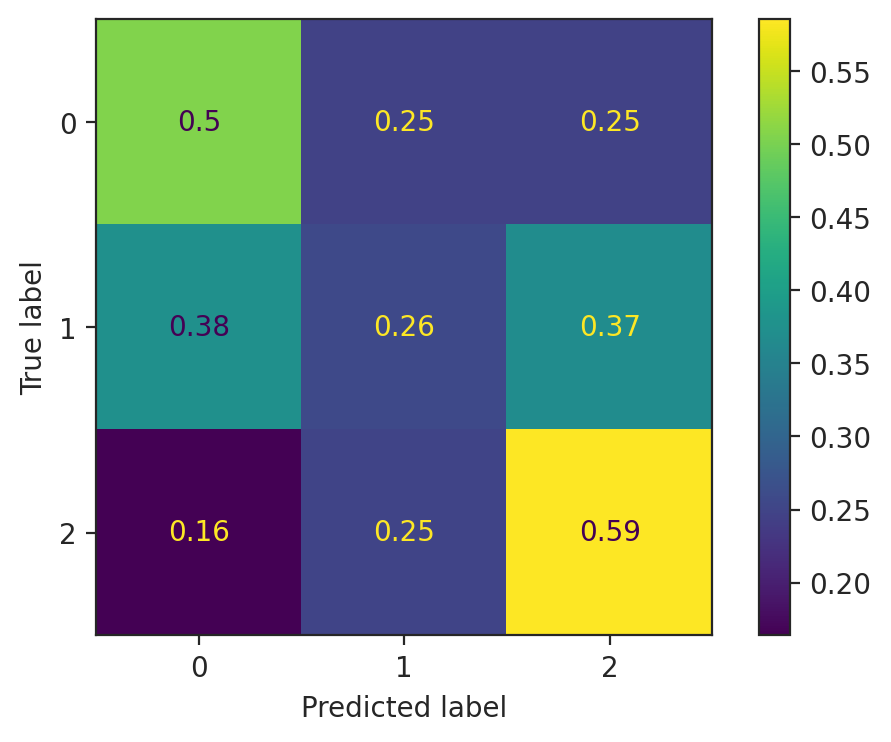

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_knn.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = winning_knn.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.4813153961136024

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10 , weights = 'uniform')

In [ ]:
X_train_selected = X_train_scale[['HS', 'HST', 'AST', 'AC', 'HR', 'AR', 'MaxH', 'MaxD', 'Overall_diff',
       'Attack_diff', 'Midfield_diff', 'Defence_diff']]

X_val_selected = X_val_scale[['HS', 'HST', 'AST', 'AC', 'HR', 'AR', 'MaxH', 'MaxD', 'Overall_diff',
       'Attack_diff', 'Midfield_diff', 'Defence_diff']]

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

knn.fit(X_train_fold_resampled, y_train_fold_resampled)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.metrics import classification_report

y_pred_knn = knn.predict(X_val_selected)
class_report_knn = classification_report(y_val, y_pred_knn)
print("\nClassification Report:")
print(class_report_knn)


Classification Report:
              precision    recall  f1-score   support

           A       0.57      0.62      0.59       210
           D       0.27      0.39      0.32       160
           H       0.69      0.49      0.57       299

    accuracy                           0.51       669
   macro avg       0.51      0.50      0.50       669
weighted avg       0.55      0.51      0.52       669



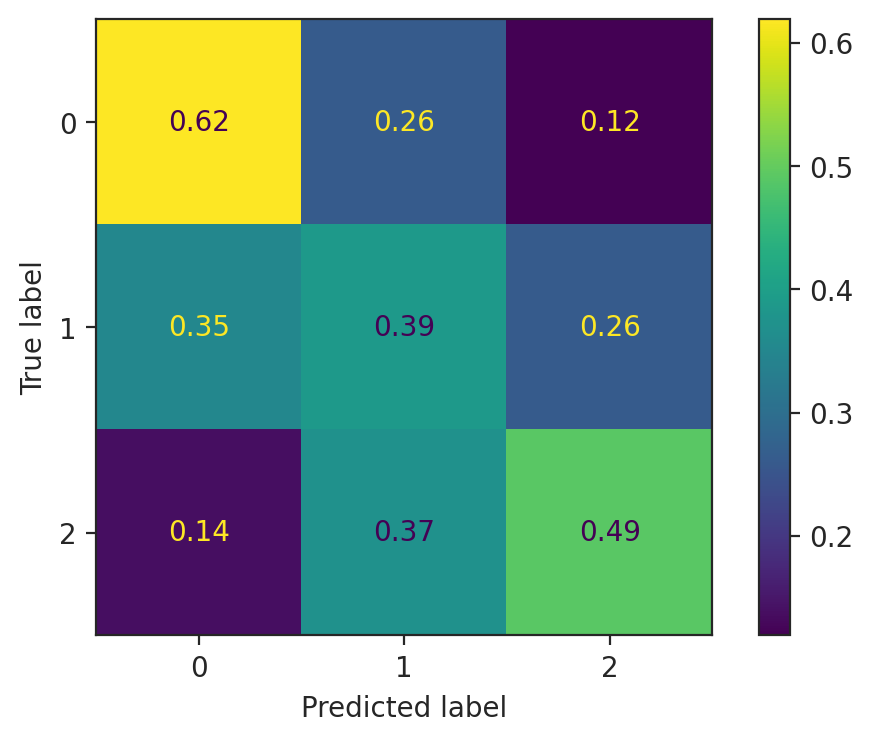

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,knn.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
# X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = knn.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5067264573991032

# **SVM**

In [ ]:
from sklearn.svm import SVC
svc =SVC()

### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
sdscaling_transformer=Pipeline(
    steps=[
        ("standard",StandardScaler()),

    ]
)

sdscaling_transformer

Pipeline(steps=[('standard', StandardScaler())])

In [ ]:
normscaling_transformer=Pipeline(
    steps=[
        ("normalize",MinMaxScaler()),

    ]
)

normscaling_transformer

Pipeline(steps=[('normalize', MinMaxScaler())])

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ("std",sdscaling_transformer,std_cols),
        ("norm",normscaling_transformer,norm_cols)
    ],
    remainder='passthrough',verbose_feature_names_out=False
).set_output(transform="pandas")

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('std',
                                 Pipeline(steps=[('standard',
                                                  StandardScaler())]),
                                 ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
                                  'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD',
                                  'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
                                  'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD',
                                  'Prob_D', 'Elo_Before_Home',
                                  'Elo_Before_Away', 'Days_D', 'form_diff',
                                  'SP_diff']),
                                ('norm',
                                 Pipeline(steps=[('normalize',
                                                  MinMaxScaler())]),
                                 ['MW', 'Year', 'Overall_diff', 'Attack_diff',
                                  'Midfield_diff', 'Defence_diff'])],
                  verbose_feature_names_out=False)

In [ ]:
X_train_scale = preprocessor.fit_transform(X_train)

X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
349  -1.396419  0.555852 -0.342593  1.196182  0.439857 -0.258782 -0.921011   
3918  2.468657 -0.466638  1.760932 -0.838788 -1.043524 -1.097526  0.692840   
3457  1.238860  0.146856  0.709170 -0.431794 -0.450171 -2.495432  0.370070   
1793 -1.396419  1.373844 -1.394355 -0.024800  0.736533  1.139124 -1.243782   
926  -0.517992  0.351354 -0.693180 -0.024800  0.143181 -0.258782 -0.598241   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
349  -0.630620  1.220044 -0.585084  ...         1.341247  0.093985  -2.073264   
3918 -0.630620 -0.421615 -1.357973  ...         0.841969 -0.093076  -0.088650   
3457 -0.630620 -0.421615 -1.357973  ...        -0.407460 -0.093076   0.087822   
1793  2.332769  1.220044  0.960694  ...         2.074483  0.093985  -0.902241   
926   0.480651 -0.421615 -0.585084  ...         0.171091  0.187516  -0.005569   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
349  -0.171657  0.918919   0.0      0.269231     0.277778       0.275862   
3918 -0.567289  0.297297   1.0      0.538462     0.416667       0.620690   
3457  2.004324  0.081081   0.9      0.769231     0.638889       0.793103   
1793 -0.171657  0.729730   0.4      0.346154     0.416667       0.344828   
926  -1.160738  0.432432   0.2      0.384615     0.416667       0.413793   

      Defence_diff  
349       0.266667  
3918      0.566667  
3457      0.800000  
1793      0.333333  
926       0.300000  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
1211 -0.163338  0.073125 -1.073667  0.280915  0.426005  0.298330  1.022407   
4015  0.018481 -0.336252 -0.049985 -0.503771 -0.473040 -0.557024 -0.271192   
2095  1.654851 -1.769070  0.291242 -0.896114 -0.173358  0.868566  1.992606   
3534  0.563938 -1.564382  0.632469 -1.288458 -1.671767 -1.127260  0.375608   
488   0.563938 -1.155005  0.291242 -0.503771  0.426005  1.153684  2.639406   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
1211  0.070750 -0.497892 -1.378599  ...        -0.300668  0.029292  -0.021987   
4015  0.070750 -0.497892  0.219811  ...        -0.787930 -0.054452   0.756453   
2095 -1.021518  1.159272  4.215836  ...         0.265328  0.029292   0.266892   
3534 -1.385607 -0.497892 -0.579394  ...        -0.183157  0.113035   0.124521   
488  -0.657428  2.816437  1.019016  ...        -0.435738 -0.054452  -0.104982   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
1211 -0.758409  0.189189   0.3      0.461538     0.400000       0.428571   
4015  1.721466  0.567568   1.0      0.730769     0.628571       0.785714   
2095  0.688185  0.513514   0.5      0.807692     0.828571       0.785714   
3534  1.721466  0.297297   0.9      0.730769     0.628571       0.785714   
488   0.481529  0.270270   0.1      0.538462     0.542857       0.500000   

      Defence_diff  
1211      0.500000  
4015      0.666667  
2095      0.700000  
3534      0.700000  
488       0.533333  

[5 rows x 35 columns]

### Fitting simple model

In [ ]:
svc.fit(X_train_scale,y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = svc.predict(X_val_scale)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.58      0.68      0.62       210
           D       0.40      0.10      0.16       160
           H       0.66      0.84      0.74       299

    accuracy                           0.61       669
   macro avg       0.55      0.54      0.51       669
weighted avg       0.57      0.61      0.56       669



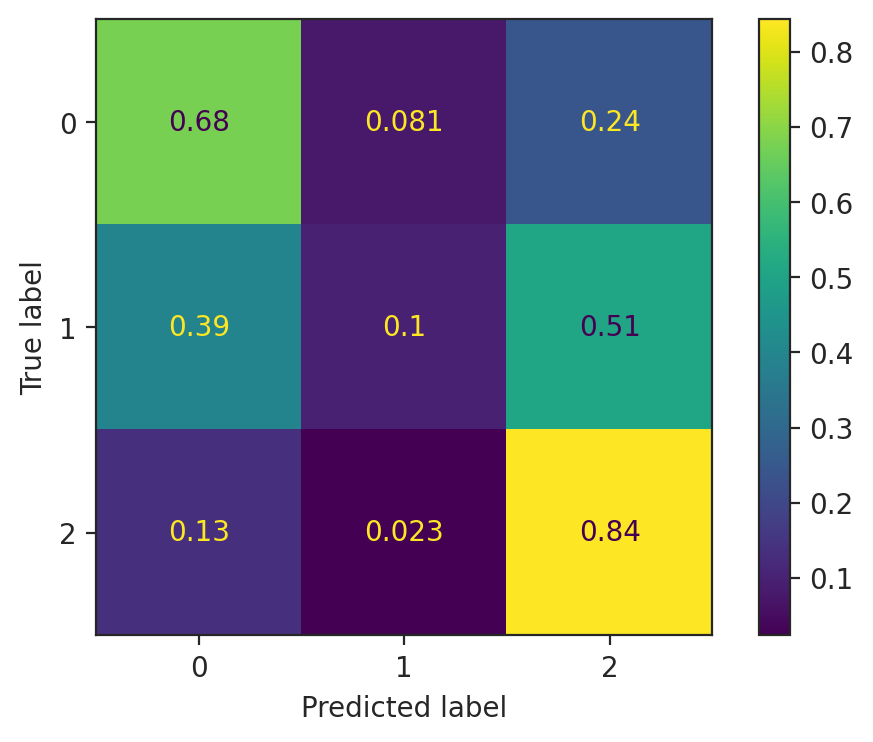

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,svc.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = svc.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.6128550074738416

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
svc =SVC()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(svc,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train_scale, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train_scale.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train_scale[selected_feature_names]

# Train your Logistic Regression model on the selected features
svc.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)





Selected feature names: Index(['HS', 'AS', 'HST', 'AST', 'AC', 'HR', 'AR', 'AvgA', 'MaxH', 'MaxA',
       'MW', 'Overall_diff', 'Midfield_diff'],
      dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = svc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.6098654708520179

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Kernel type: linear, radial basis function (RBF), polynomial
    'degree': [2, 3, 4],                   # Degree for polynomial kernel (if used)
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],  # Kernel coefficient (gamma), 'scale', 'auto', or specific values
    'class_weight': ['balanced', None],     # Class weight: balanced or None
}


svc = SVC()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

FTR
H    238
A    169
D    128
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

FTR
H    1193
A     842
D     640
Name: count, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

FTR
H    955
D    955
A    955
Name: count, dtype: int64

In [ ]:
grid_search.best_score_

0.705930890168163

In [ ]:
grid_search.best_params_

{'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
svc_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
svc_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_degree', 'param_gamma',
       'param_kernel', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [ ]:
svc_results[['param_C', 'param_class_weight', 'param_degree', 'param_gamma','param_kernel','mean_train_score','mean_test_score','rank_test_score']]

param_C param_class_weight param_degree param_gamma param_kernel  \
538      10               None            4           1          rbf   
466      10           balanced            3           1          rbf   
520      10               None            3           1          rbf   
502      10               None            2           1          rbf   
448      10           balanced            2           1          rbf   
..      ...                ...          ...         ...          ...   
155    0.01           balanced            4        0.01         poly   
152    0.01           balanced            4       0.001         poly   
44    0.001           balanced            4       0.001         poly   
101   0.001               None            4        0.01         poly   
98    0.001               None            4       0.001         poly   

     mean_train_score  mean_test_score  rank_test_score  
538          0.992676         0.705931                1  
466          0.992676         0.705931                1  
520          0.992676         0.705931                1  
502          0.992676         0.705931                1  
448          0.992676         0.705931                1  
..                ...              ...              ...  
155          0.174580         0.174013              527  
152          0.174580         0.174013              527  
44           0.174580         0.174013              527  
101          0.174580         0.174013              527  
98           0.174580         0.174013              527  

[540 rows x 8 columns]

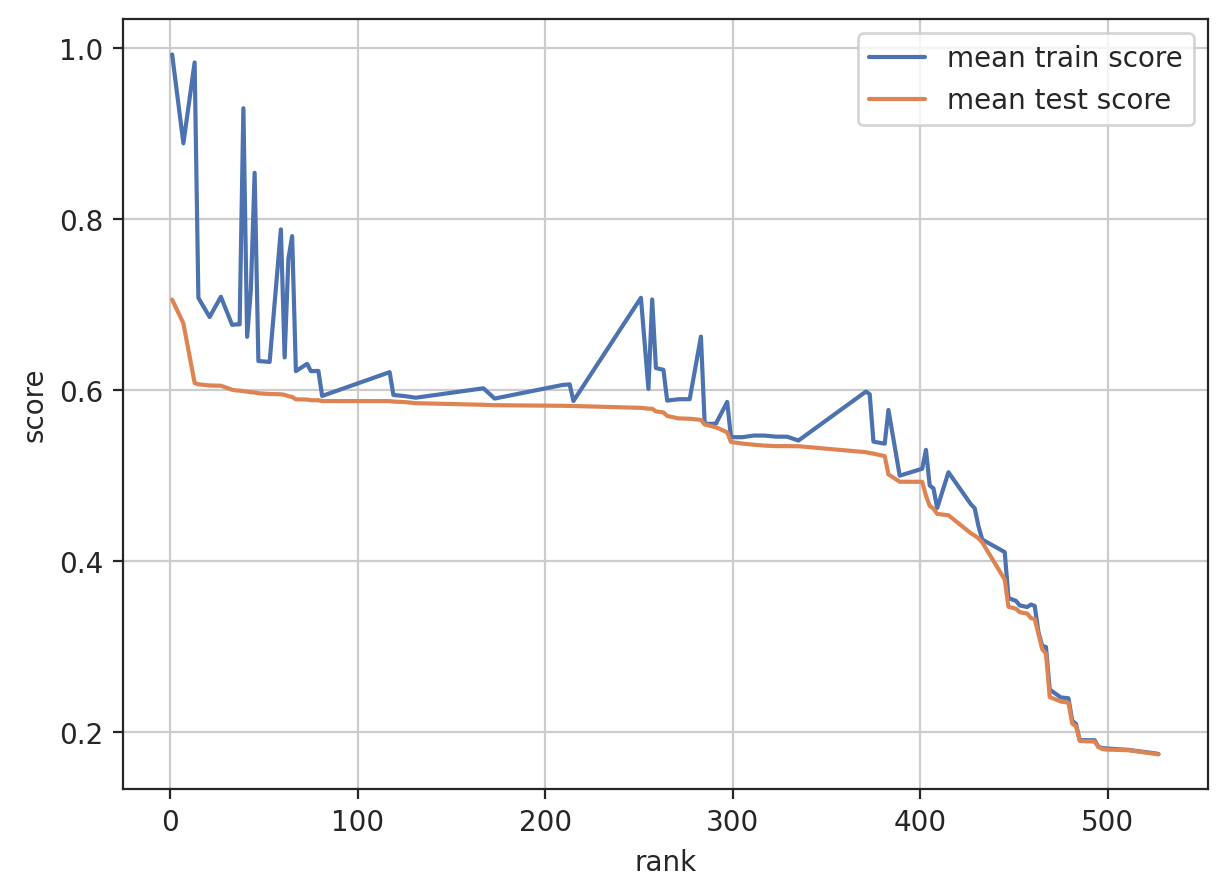

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=svc_results,x='rank_test_score',y='mean_train_score',ax=ax,errorbar=None)
sns.lineplot(data=svc_results,x='rank_test_score',y='mean_test_score',ax=ax,errorbar=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_svc = grid_search.best_estimator_

In [ ]:
winning_svc

SVC(C=10, class_weight='balanced', degree=2, gamma=1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = winning_svc.predict(X_val_selected)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.49      0.47      0.48       210
           D       0.30      0.28      0.29       160
           H       0.61      0.66      0.63       299

    accuracy                           0.51       669
   macro avg       0.47      0.47      0.47       669
weighted avg       0.50      0.51      0.50       669



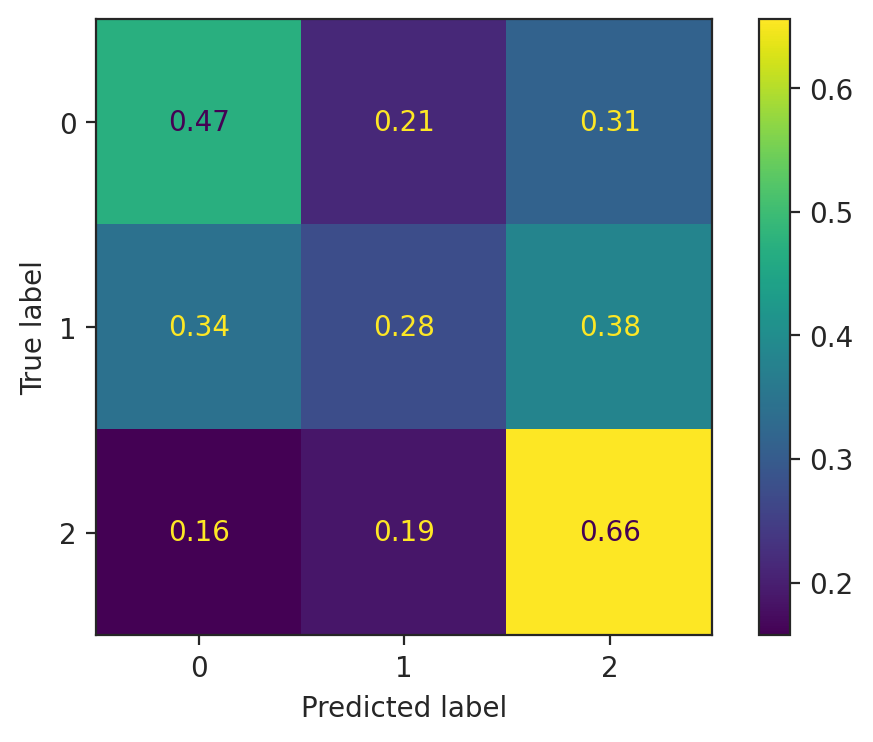

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_svc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = winning_svc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5067264573991032

In [ ]:
svc_results['diff']=abs(svc_results['mean_train_score']-svc_results['mean_test_score'])

sorted_table = svc_results[['param_C', 'param_class_weight', 'param_degree', 'param_gamma','param_kernel',\
                            'mean_train_score','mean_test_score','diff','rank_test_score']]\
                            .sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])
sorted_table

param_C param_class_weight param_degree param_gamma param_kernel  \
59    0.001               None            2        auto         poly   
5     0.001           balanced            2        auto         poly   
56    0.001               None            2       scale         poly   
2     0.001           balanced            2       scale         poly   
26    0.001           balanced            3       0.001         poly   
..      ...                ...          ...         ...          ...   
484      10           balanced            4           1          rbf   
431       1               None            4           1         poly   
377       1           balanced            4           1         poly   
539      10               None            4           1         poly   
485      10           balanced            4           1         poly   

     mean_train_score  mean_test_score      diff  rank_test_score  
59           0.182847         0.182659  0.000188              495  
5            0.182847         0.182659  0.000188              495  
56           0.190125         0.189738  0.000387              485  
2            0.190125         0.189738  0.000387              485  
26           0.179360         0.178945  0.000415              511  
..                ...              ...       ...              ...  
484          0.992676         0.705931  0.286745                1  
431          0.929784         0.598870  0.330914               39  
377          0.929784         0.598870  0.330914               39  
539          0.983339         0.608435  0.374904               13  
485          0.983339         0.608435  0.374904               13  

[540 rows x 9 columns]

In [ ]:
sorted_table.loc[sorted_table['mean_test_score'] > 0.50].sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])

param_C param_class_weight param_degree param_gamma param_kernel  \
403       1               None            3       0.001          rbf   
331       1           balanced            2       0.001          rbf   
349       1           balanced            3       0.001          rbf   
385       1               None            2       0.001          rbf   
421       1               None            4       0.001          rbf   
..      ...                ...          ...         ...          ...   
484      10           balanced            4           1          rbf   
431       1               None            4           1         poly   
377       1           balanced            4           1         poly   
539      10               None            4           1         poly   
485      10           balanced            4           1         poly   

     mean_train_score  mean_test_score      diff  rank_test_score  
403          0.560570         0.559945  0.000625              285  
331          0.560570         0.559945  0.000625              285  
349          0.560570         0.559945  0.000625              285  
385          0.560570         0.559945  0.000625              285  
421          0.560570         0.559945  0.000625              285  
..                ...              ...       ...              ...  
484          0.992676         0.705931  0.286745                1  
431          0.929784         0.598870  0.330914               39  
377          0.929784         0.598870  0.330914               39  
539          0.983339         0.608435  0.374904               13  
485          0.983339         0.608435  0.374904               13  

[388 rows x 9 columns]

In [ ]:
param_svc = sorted_table.loc[(sorted_table['mean_test_score'] > 0.50) & (sorted_table['rank_test_score'] < 200)]\
.sort_values(by=['diff', 'mean_test_score'], ascending=[True, False])

param_svc

param_C param_class_weight param_degree param_gamma param_kernel  \
270     0.1               None            2       scale       linear   
288     0.1               None            3       scale       linear   
315     0.1               None            4        0.01       linear   
273     0.1               None            2        auto       linear   
276     0.1               None            2       0.001       linear   
..      ...                ...          ...         ...          ...   
484      10           balanced            4           1          rbf   
431       1               None            4           1         poly   
377       1           balanced            4           1         poly   
539      10               None            4           1         poly   
485      10           balanced            4           1         poly   

     mean_train_score  mean_test_score      diff  rank_test_score  
270          0.593255         0.587256  0.005999               81  
288          0.593255         0.587256  0.005999               81  
315          0.593255         0.587256  0.005999               81  
273          0.593255         0.587256  0.005999               81  
276          0.593255         0.587256  0.005999               81  
..                ...              ...       ...              ...  
484          0.992676         0.705931  0.286745                1  
431          0.929784         0.598870  0.330914               39  
377          0.929784         0.598870  0.330914               39  
539          0.983339         0.608435  0.374904               13  
485          0.983339         0.608435  0.374904               13  

[208 rows x 9 columns]

In [ ]:
param_svc.iloc[0]

param_C                    0.1
param_class_weight        None
param_degree                 2
param_gamma              scale
param_kernel            linear
mean_train_score      0.593255
mean_test_score       0.587256
diff                  0.005999
rank_test_score             81
Name: 270, dtype: object

In [ ]:
from sklearn.svm import SVC
svc = SVC(C =0.1, class_weight = None, degree = 2, gamma = 'scale', kernel = 'linear')

In [ ]:
X_train_selected = X_train_scale[['HS', 'AS', 'HST', 'AST', 'AC', 'HR', 'AR', 'AvgA', 'MaxH', 'MaxA',
       'MW', 'Overall_diff', 'Midfield_diff']]

X_val_selected = X_val_scale[['HS', 'AS', 'HST', 'AST', 'AC', 'HR', 'AR', 'AvgA', 'MaxH', 'MaxA',
       'MW', 'Overall_diff', 'Midfield_diff']]

In [ ]:

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

svc.fit(X_train_fold_resampled, y_train_fold_resampled)

SVC(C=0.1, degree=2, kernel='linear')

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = svc.predict(X_val_selected)
class_report_svc = classification_report(y_val, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)


Classification Report:
              precision    recall  f1-score   support

           A       0.63      0.64      0.64       210
           D       0.35      0.46      0.39       160
           H       0.75      0.61      0.67       299

    accuracy                           0.58       669
   macro avg       0.58      0.57      0.57       669
weighted avg       0.62      0.58      0.60       669



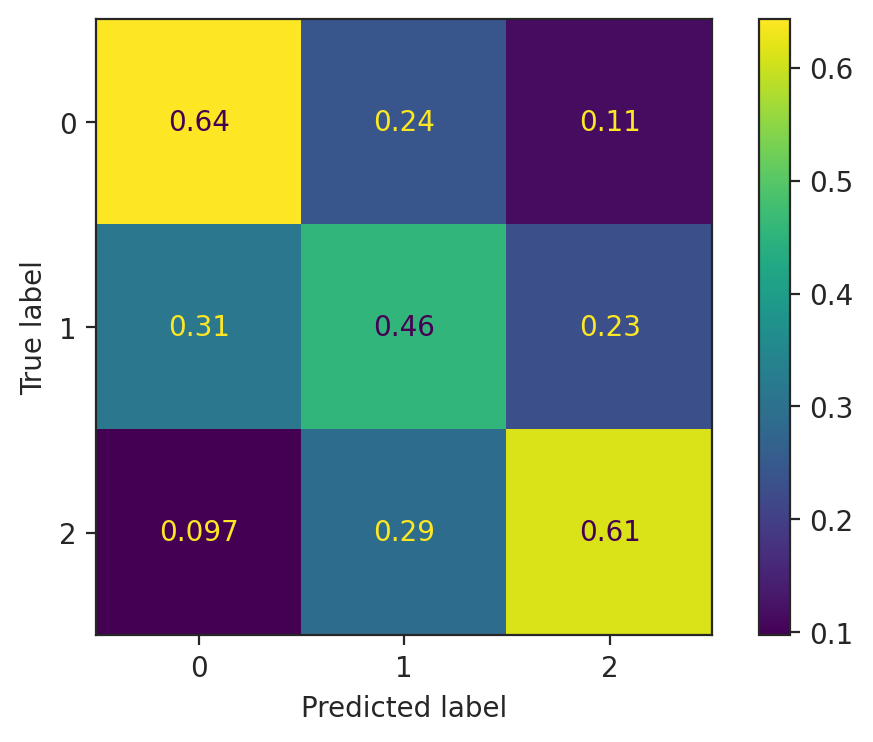

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,svc.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
# X_val_selected = X_val_scale[selected_feature_names]
y_val_pred = svc.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5844544095665172

# **GNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

### calculating `priors` for hyperparameter search in gridsearchcv

In [ ]:
np.mean(filtered_data1['Prob_A'])

0.3141749247776314

In [ ]:
np.mean(filtered_data1['Prob_D'])

0.2306686736258189

In [ ]:
np.mean(filtered_data1['Prob_H'])

0.4583331676489884

In [ ]:
prob = [0.31, 0.23, 0.46]

### Fitting simple model

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred_nb = nb.predict(X_val)
class_report_nb = classification_report(y_val, y_pred_nb)
print("\nClassification Report:")
print(class_report_nb)


Classification Report:
              precision    recall  f1-score   support

           A       0.54      0.54      0.54       210
           D       0.29      0.54      0.38       160
           H       0.73      0.40      0.51       299

    accuracy                           0.48       669
   macro avg       0.52      0.49      0.48       669
weighted avg       0.56      0.48      0.49       669



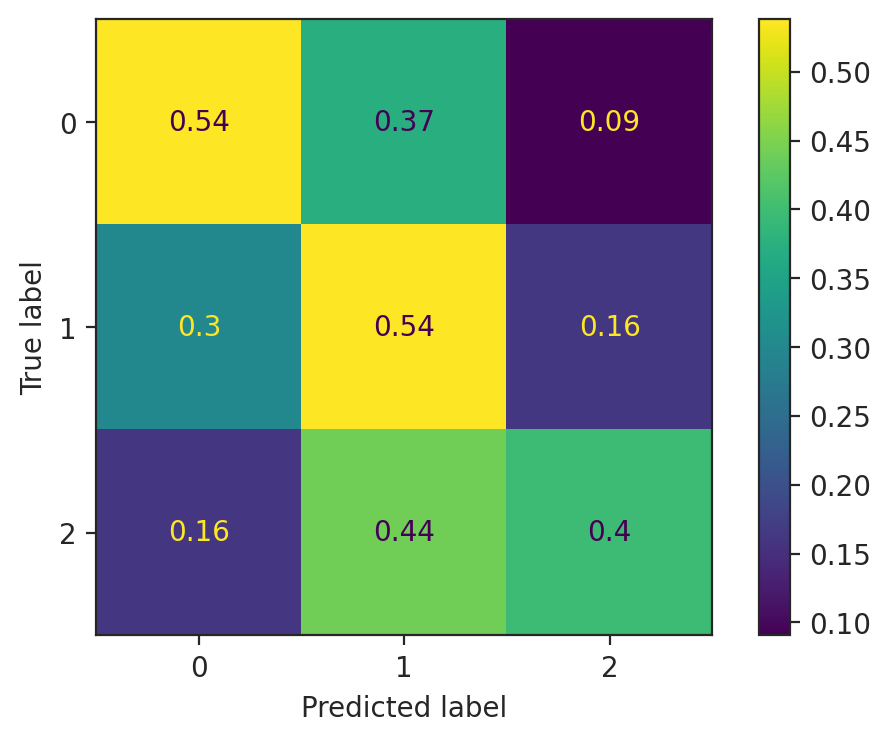

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,nb.predict(X_val),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = nb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.47533632286995514

### Sequential feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your Logistic Regression model
nb = GaussianNB()

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(nb,
                                k_features='best',  # Select the best subset of features
                                forward=True,        # Forward selection (you can also try backward=False)
                                scoring='accuracy',  # Use accuracy as the evaluation metric
                                cv=kfold)

# Fit the SFS to your training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = np.array(sfs.k_feature_idx_)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_indices]

# Select the features from your training data
X_train_selected = X_train[selected_feature_names]

# Train your Logistic Regression model on the selected features
nb.fit(X_train_selected, y_train)

# Print the selected feature names
print("Selected feature names:", selected_feature_names)





Selected feature names: Index(['HST', 'AST', 'Defence_diff'], dtype='object')


In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = nb.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.585949177877429

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
   'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  # Smoothing parameter for avoiding zero probabilities
   'priors' : [prob, None]
}



nb = GaussianNB()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_selected, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_selected.iloc[train_idx], X_train_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

FTR
H    238
A    169
D    128
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

FTR
H    1193
A     842
D     640
Name: count, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

FTR
H    955
D    955
A    955
Name: count, dtype: int64

In [ ]:
grid_search.best_score_

0.5320683813334751

In [ ]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
nb_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
nb_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_priors', 'param_var_smoothing', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
nb_results[['param_var_smoothing', 'param_priors', 'mean_train_score','mean_test_score','rank_test_score']]

param_var_smoothing        param_priors  mean_train_score  mean_test_score  \
5                 0.0                None          0.535797         0.532068   
6                 0.0                None          0.535797         0.532068   
7                 0.0                None          0.535797         0.532068   
8            0.000001                None          0.535797         0.532068   
9             0.00001                None          0.535797         0.532068   
0                 0.0  [0.31, 0.23, 0.46]          0.441004         0.437477   
1                 0.0  [0.31, 0.23, 0.46]          0.441004         0.437477   
2                 0.0  [0.31, 0.23, 0.46]          0.441004         0.437477   
3            0.000001  [0.31, 0.23, 0.46]          0.441004         0.437477   
4             0.00001  [0.31, 0.23, 0.46]          0.441004         0.437477   

   rank_test_score  
5                1  
6                1  
7                1  
8                1  
9                1  
0                6  
1                6  
2                6  
3                6  
4                6

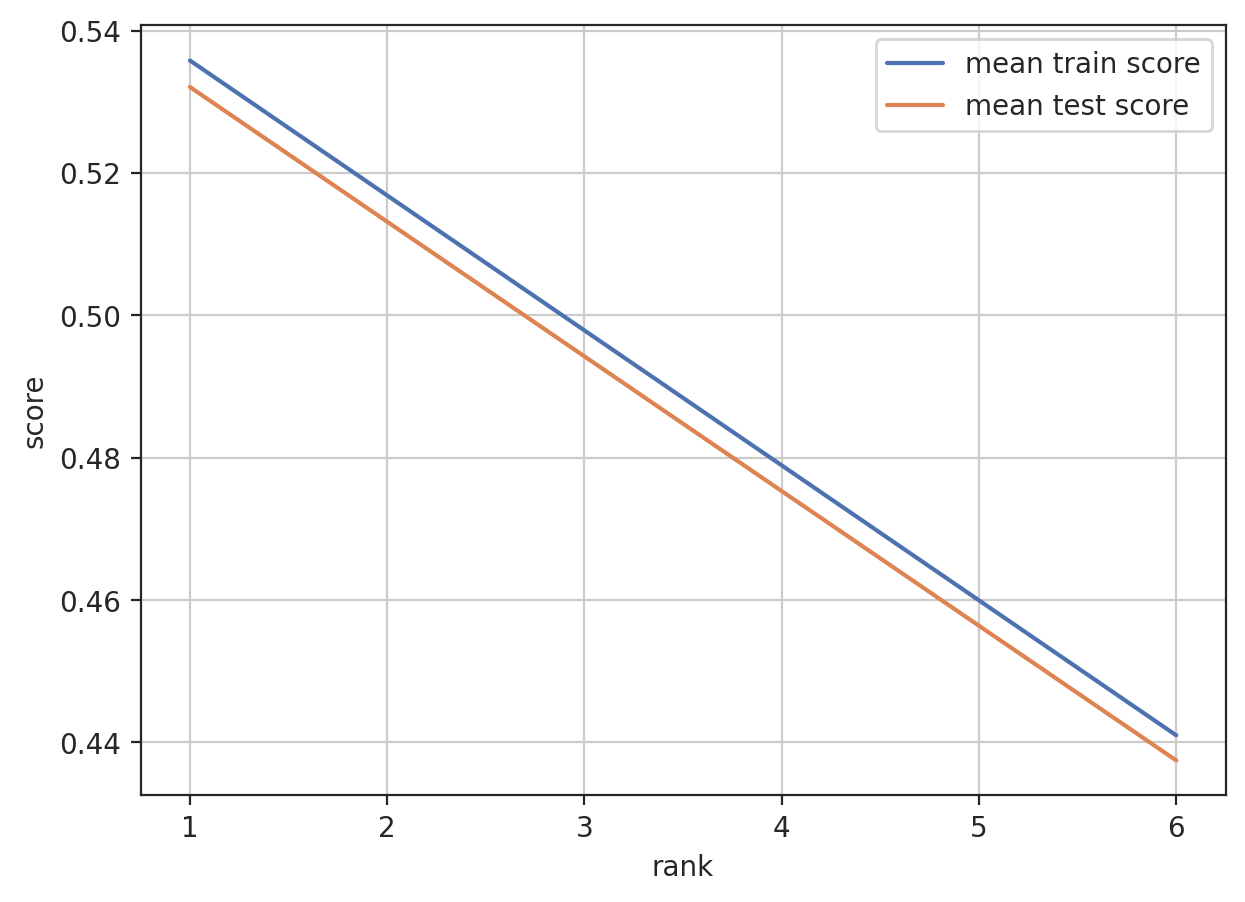

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=nb_results,x='rank_test_score',y='mean_train_score',ax=ax,errorbar=None)
sns.lineplot(data=nb_results,x='rank_test_score',y='mean_test_score',ax=ax,errorbar=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_nb = grid_search.best_estimator_

In [ ]:
winning_nb

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred_nb = winning_nb.predict(X_val_selected)
class_report_nb = classification_report(y_val, y_pred_nb)
print("\nClassification Report:")
print(class_report_nb)


Classification Report:
              precision    recall  f1-score   support

           A       0.58      0.61      0.60       210
           D       0.29      0.37      0.32       160
           H       0.68      0.56      0.62       299

    accuracy                           0.53       669
   macro avg       0.52      0.51      0.51       669
weighted avg       0.56      0.53      0.54       669



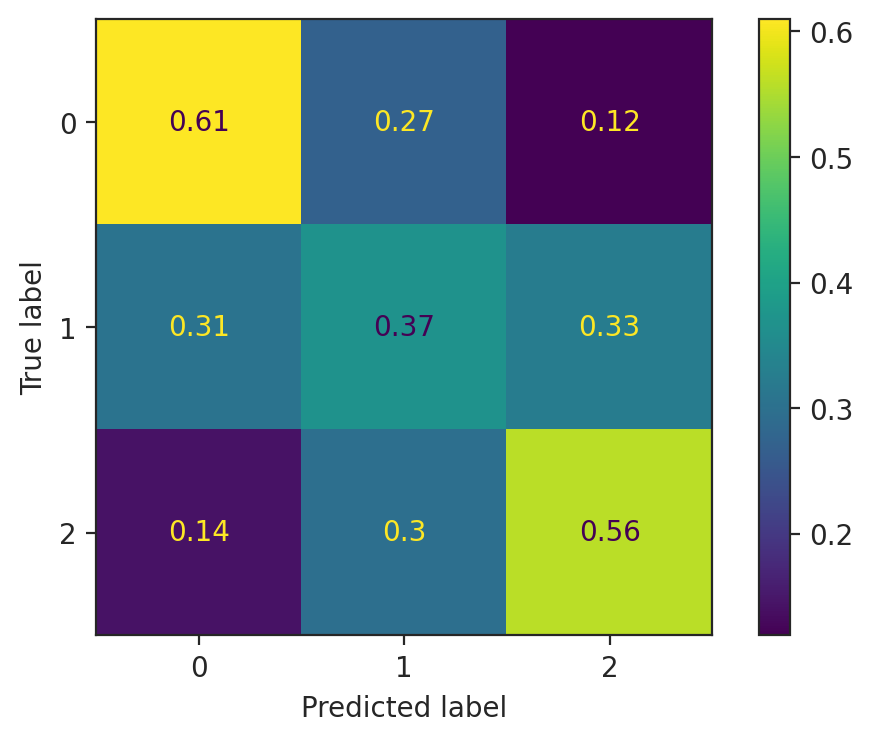

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_nb.predict(X_val_selected),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set
X_val_selected = X_val[selected_feature_names]
y_val_pred = winning_nb.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

NameError: name 'X_val' is not defined

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier


### scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
sdscaling_transformer=Pipeline(
    steps=[
        ("standard",StandardScaler()),

    ]
)

sdscaling_transformer

Pipeline(steps=[('standard', StandardScaler())])

In [ ]:
normscaling_transformer=Pipeline(
    steps=[
        ("normalize",MinMaxScaler()),

    ]
)

normscaling_transformer

Pipeline(steps=[('normalize', MinMaxScaler())])

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ("std",sdscaling_transformer,std_cols),
        ("norm",normscaling_transformer,norm_cols)
    ],
    remainder='passthrough',verbose_feature_names_out=False
).set_output(transform="pandas")

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('std',
                                 Pipeline(steps=[('standard',
                                                  StandardScaler())]),
                                 ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
                                  'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD',
                                  'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
                                  'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD',
                                  'Prob_D', 'Elo_Before_Home',
                                  'Elo_Before_Away', 'Days_D', 'form_diff',
                                  'SP_diff']),
                                ('norm',
                                 Pipeline(steps=[('normalize',
                                                  MinMaxScaler())]),
                                 ['MW', 'Year', 'Overall_diff', 'Attack_diff',
                                  'Midfield_diff', 'Defence_diff'])],
                  verbose_feature_names_out=False)

In [ ]:
X_train_scale = preprocessor.fit_transform(X_train)

X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
349  -1.396419  0.555852 -0.342593  1.196182  0.439857 -0.258782 -0.921011   
3918  2.468657 -0.466638  1.760932 -0.838788 -1.043524 -1.097526  0.692840   
3457  1.238860  0.146856  0.709170 -0.431794 -0.450171 -2.495432  0.370070   
1793 -1.396419  1.373844 -1.394355 -0.024800  0.736533  1.139124 -1.243782   
926  -0.517992  0.351354 -0.693180 -0.024800  0.143181 -0.258782 -0.598241   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
349  -0.630620  1.220044 -0.585084  ...         1.341247  0.093985  -2.073264   
3918 -0.630620 -0.421615 -1.357973  ...         0.841969 -0.093076  -0.088650   
3457 -0.630620 -0.421615 -1.357973  ...        -0.407460 -0.093076   0.087822   
1793  2.332769  1.220044  0.960694  ...         2.074483  0.093985  -0.902241   
926   0.480651 -0.421615 -0.585084  ...         0.171091  0.187516  -0.005569   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
349  -0.171657  0.918919   0.0      0.269231     0.277778       0.275862   
3918 -0.567289  0.297297   1.0      0.538462     0.416667       0.620690   
3457  2.004324  0.081081   0.9      0.769231     0.638889       0.793103   
1793 -0.171657  0.729730   0.4      0.346154     0.416667       0.344828   
926  -1.160738  0.432432   0.2      0.384615     0.416667       0.413793   

      Defence_diff  
349       0.266667  
3918      0.566667  
3457      0.800000  
1793      0.333333  
926       0.300000  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
1211 -0.163338  0.073125 -1.073667  0.280915  0.426005  0.298330  1.022407   
4015  0.018481 -0.336252 -0.049985 -0.503771 -0.473040 -0.557024 -0.271192   
2095  1.654851 -1.769070  0.291242 -0.896114 -0.173358  0.868566  1.992606   
3534  0.563938 -1.564382  0.632469 -1.288458 -1.671767 -1.127260  0.375608   
488   0.563938 -1.155005  0.291242 -0.503771  0.426005  1.153684  2.639406   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
1211  0.070750 -0.497892 -1.378599  ...        -0.300668  0.029292  -0.021987   
4015  0.070750 -0.497892  0.219811  ...        -0.787930 -0.054452   0.756453   
2095 -1.021518  1.159272  4.215836  ...         0.265328  0.029292   0.266892   
3534 -1.385607 -0.497892 -0.579394  ...        -0.183157  0.113035   0.124521   
488  -0.657428  2.816437  1.019016  ...        -0.435738 -0.054452  -0.104982   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
1211 -0.758409  0.189189   0.3      0.461538     0.400000       0.428571   
4015  1.721466  0.567568   1.0      0.730769     0.628571       0.785714   
2095  0.688185  0.513514   0.5      0.807692     0.828571       0.785714   
3534  1.721466  0.297297   0.9      0.730769     0.628571       0.785714   
488   0.481529  0.270270   0.1      0.538462     0.542857       0.500000   

      Defence_diff  
1211      0.500000  
4015      0.666667  
2095      0.700000  
3534      0.700000  
488       0.533333  

[5 rows x 35 columns]

### Fitting simple model

In [ ]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scale,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1500)

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = mlp.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.51      0.56      0.53       210
           D       0.26      0.24      0.25       160
           H       0.62      0.60      0.61       299

    accuracy                           0.50       669
   macro avg       0.46      0.47      0.46       669
weighted avg       0.50      0.50      0.50       669



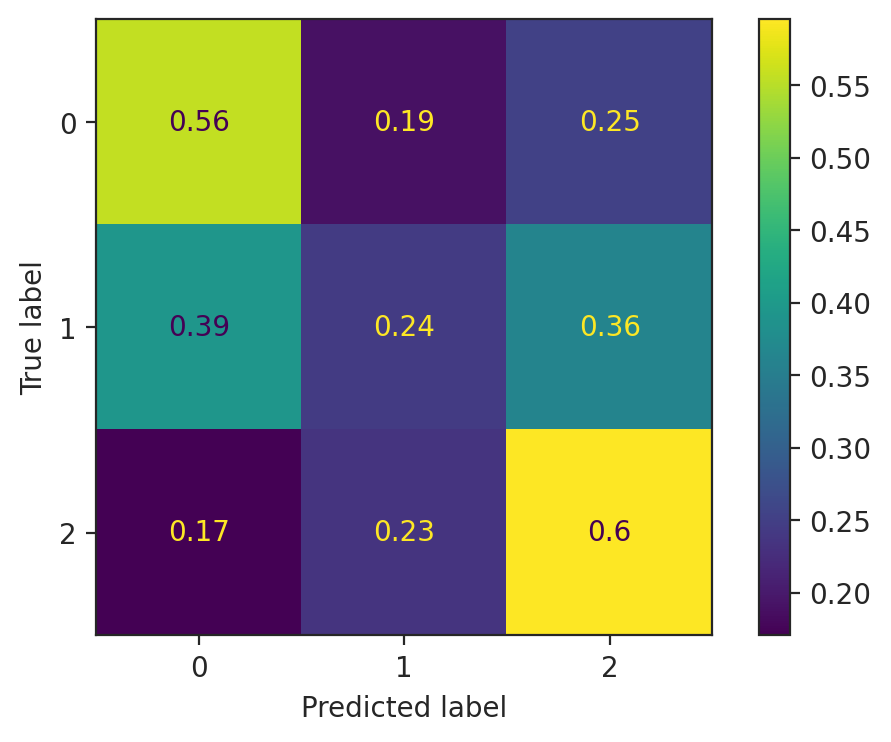

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,mlp.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = mlp.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.4992526158445441

### gridsearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh', 'logistic','identity'],       # Activation functions for hidden layers
    'solver': ['adam', 'lbfgs'],                     # Optimization algorithm
    'alpha': [0.0001, 0.001, 0.01],                 # L2 regularization term
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'max_iter': [2000, 3000],                     # Maximum number of iterations
    'early_stopping' : [True]
}



mlp = MLPClassifier()

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_scale, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

grid_search.fit(X_train_fold_resampled, y_train_fold_resampled)


best_estimator = grid_search.best_estimator_

In [ ]:
y_val_fold.value_counts()

FTR
H    238
A    169
D    128
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

FTR
H    1193
A     842
D     640
Name: count, dtype: int64

In [ ]:
y_train_fold_resampled.value_counts()

FTR
H    955
D    955
A    955
Name: count, dtype: int64

In [ ]:
grid_search.best_score_

0.692467566047431

In [ ]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'early_stopping': True,
 'hidden_layer_sizes': (150,),
 'learning_rate': 'adaptive',
 'max_iter': 3000,
 'solver': 'lbfgs'}

In [ ]:
mlp_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [ ]:
mlp_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_activation', 'param_alpha', 'param_early_stopping',
       'param_hidden_layer_sizes', 'param_learning_rate', 'param_max_iter',
       'param_solver', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [ ]:
 mlp_results[['param_activation', 'param_alpha', 'param_early_stopping',\
       'param_hidden_layer_sizes', 'param_learning_rate', 'param_max_iter',\
       'param_solver', 'mean_train_score','mean_test_score','rank_test_score']]

param_activation param_alpha param_early_stopping  \
107             relu        0.01                 True   
209             tanh        0.01                 True   
207             tanh        0.01                 True   
213             tanh        0.01                 True   
143             tanh      0.0001                 True   
..               ...         ...                  ...   
228         logistic      0.0001                 True   
296         logistic        0.01                 True   
260         logistic       0.001                 True   
248         logistic      0.0001                 True   
304         logistic        0.01                 True   

    param_hidden_layer_sizes param_learning_rate param_max_iter param_solver  \
107                   (150,)            adaptive           3000        lbfgs   
209                   (150,)          invscaling           2000        lbfgs   
207                   (150,)            constant           3000        lbfgs   
213                   (150,)            adaptive           2000        lbfgs   
143                   (150,)            adaptive           3000        lbfgs   
..                       ...                 ...            ...          ...   
228                   (100,)            constant           2000         adam   
296                    (50,)            adaptive           2000         adam   
260                    (50,)            adaptive           2000         adam   
248                   (150,)            adaptive           2000         adam   
304                   (100,)          invscaling           2000         adam   

     mean_train_score  mean_test_score  rank_test_score  
107          1.000000         0.692468                1  
209          1.000000         0.690218                2  
207          1.000000         0.688657                3  
213          1.000000         0.688447                4  
143          1.000000         0.687536                5  
..                ...              ...              ...  
228          0.576242         0.564198              428  
296          0.587278         0.561611              429  
260          0.585165         0.561517              430  
248          0.564913         0.560707              431  
304          0.578195         0.550167              432  

[432 rows x 10 columns]

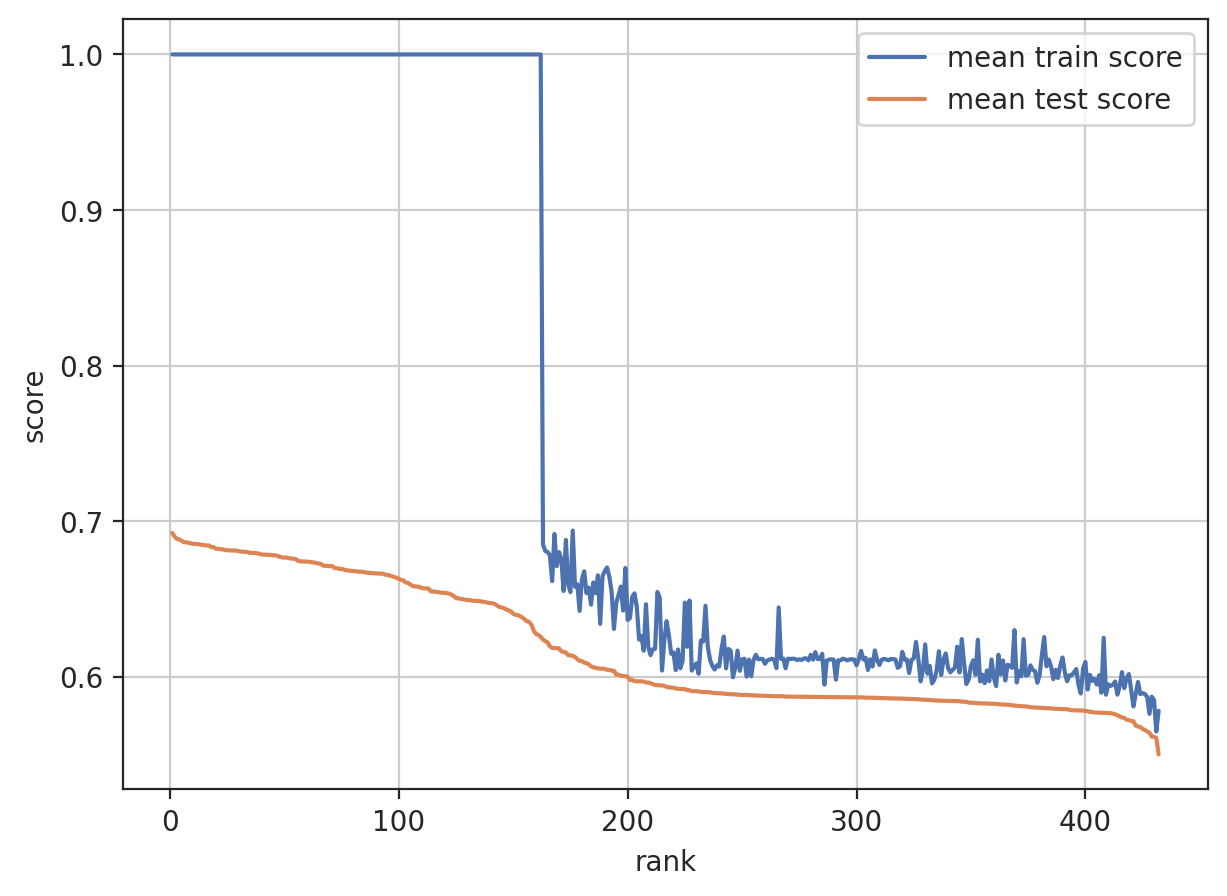

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=mlp_results,x='rank_test_score',y='mean_train_score',ax=ax,errorbar=None)
sns.lineplot(data=mlp_results,x='rank_test_score',y='mean_test_score',ax=ax,errorbar=None)
ax.legend(['mean train score','mean test score'])
ax.set_xlabel('rank')
ax.set_ylabel('score')
plt.grid(visible=True)

In [ ]:
winning_mlp = grid_search.best_estimator_

In [ ]:
winning_mlp

MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(150,),
              learning_rate='adaptive', max_iter=3000, solver='lbfgs')

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = winning_mlp.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.51      0.51       210
           D       0.31      0.28      0.29       160
           H       0.66      0.69      0.67       299

    accuracy                           0.53       669
   macro avg       0.49      0.49      0.49       669
weighted avg       0.53      0.53      0.53       669



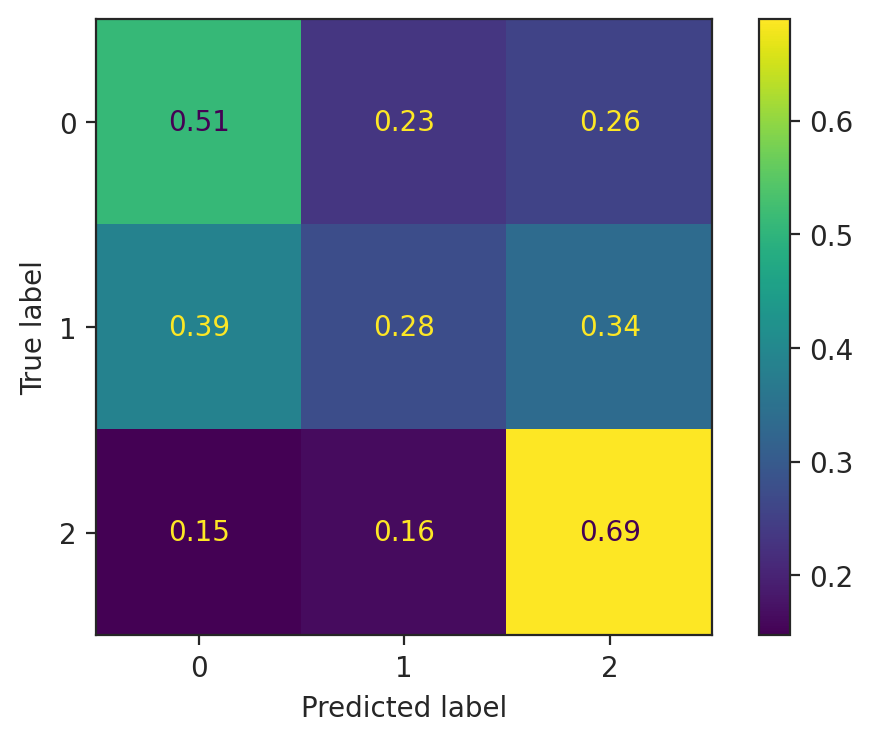

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,winning_mlp.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# evaluate the model on your validation or test set

y_val_pred = winning_mlp.predict(X_val_scale)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_accuracy

0.5336322869955157

In [ ]:
mlp_table = mlp_results.loc[mlp_results['mean_train_score']!=1]

In [ ]:
mlp_table = mlp_table.sort_values(by=['mean_test_score'],ascending=False)
mlp_table[['param_activation', 'param_alpha', 'param_early_stopping',\
       'param_hidden_layer_sizes', 'param_learning_rate', 'param_max_iter',\
       'param_solver', 'mean_train_score','mean_test_score','rank_test_score']]

param_activation param_alpha param_early_stopping  \
66              relu       0.001                 True   
104             relu        0.01                 True   
22              relu      0.0001                 True   
24              relu      0.0001                 True   
18              relu      0.0001                 True   
..               ...         ...                  ...   
228         logistic      0.0001                 True   
296         logistic        0.01                 True   
260         logistic       0.001                 True   
248         logistic      0.0001                 True   
304         logistic        0.01                 True   

    param_hidden_layer_sizes param_learning_rate param_max_iter param_solver  \
66                    (150,)          invscaling           3000         adam   
104                   (150,)            adaptive           2000         adam   
22                    (100,)            adaptive           3000         adam   
24                    (150,)            constant           2000         adam   
18                    (100,)          invscaling           3000         adam   
..                       ...                 ...            ...          ...   
228                   (100,)            constant           2000         adam   
296                    (50,)            adaptive           2000         adam   
260                    (50,)            adaptive           2000         adam   
248                   (150,)            adaptive           2000         adam   
304                   (100,)          invscaling           2000         adam   

     mean_train_score  mean_test_score  rank_test_score  
66           0.685007         0.623981              163  
104          0.680906         0.622947              164  
22           0.680244         0.622195              165  
24           0.678327         0.619636              166  
18           0.661543         0.618672              167  
..                ...              ...              ...  
228          0.576242         0.564198              428  
296          0.587278         0.561611              429  
260          0.585165         0.561517              430  
248          0.564913         0.560707              431  
304          0.578195         0.550167              432  

[270 rows x 10 columns]

In [ ]:
mlp_table[['param_activation', 'param_alpha', 'param_early_stopping',\
       'param_hidden_layer_sizes', 'param_learning_rate', 'param_max_iter',\
       'param_solver', 'mean_train_score','mean_test_score','rank_test_score']].iloc[0]

param_activation                  relu
param_alpha                      0.001
param_early_stopping              True
param_hidden_layer_sizes        (150,)
param_learning_rate         invscaling
param_max_iter                    3000
param_solver                      adam
mean_train_score              0.685007
mean_test_score               0.623981
rank_test_score                    163
Name: 66, dtype: object

In [ ]:
mlp_new = MLPClassifier(activation = "relu",alpha = 0.001 , early_stopping = True,\
                       hidden_layer_sizes = (150,), learning_rate = "invscaling",\
                       max_iter = 3000, solver ="adam")

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store cross-validation results
cv_scores = []

# Iterate over the cross-validation folds
for train_idx, val_idx in kfold.split(X_train_scale, y_train):
    # Split the training data into training and validation sets for the fold
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


smote = SMOTE(sampling_strategy='auto', random_state=42)

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator= mlp_new, param_grid=param_grid, scoring=scorer, cv=kfold,return_train_score=True)

X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
mlp_new.fit(X_train_fold_resampled, y_train_fold_resampled)

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(150,),
              learning_rate='invscaling', max_iter=3000)

In [ ]:
from sklearn.metrics import classification_report

y_pred_mlp = mlp_new.predict(X_val_scale)
class_report_mlp = classification_report(y_val, y_pred_mlp)
print("\nClassification Report:")
print(class_report_mlp)


Classification Report:
              precision    recall  f1-score   support

           A       0.59      0.64      0.62       210
           D       0.28      0.31      0.29       160
           H       0.72      0.65      0.68       299

    accuracy                           0.57       669
   macro avg       0.53      0.53      0.53       669
weighted avg       0.58      0.57      0.57       669



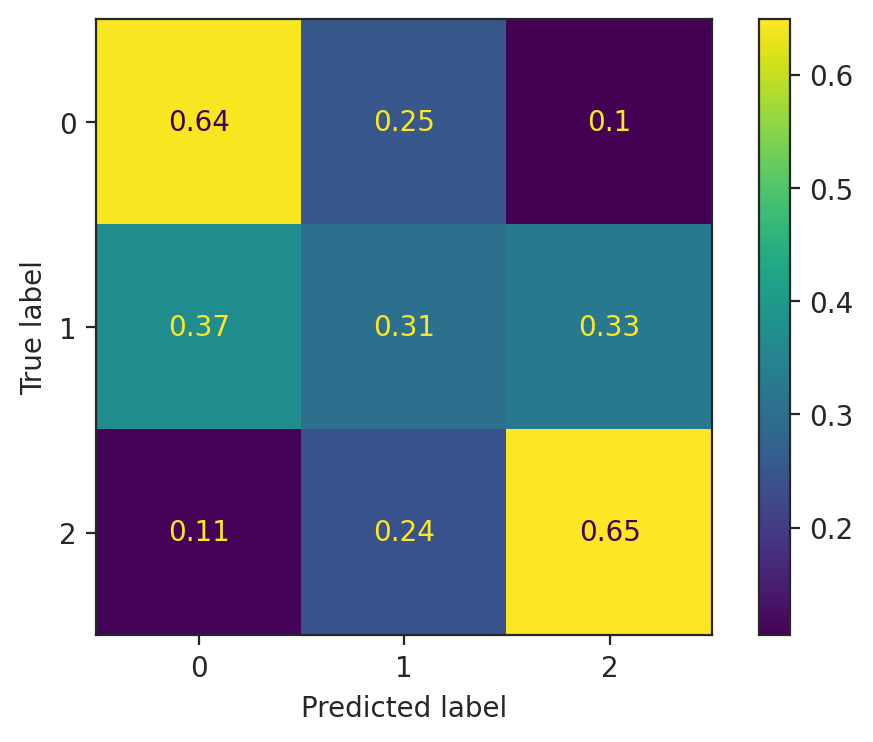

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val,mlp_new.predict(X_val_scale),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# **CNN**

### **Train_test_splitting the data**

In [ ]:
# from sklearn.model_selection import train_test_split


# X = pl.drop(columns=['DND'])
# y = pl['DND']

# # Split the data into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [ ]:
# len(X.columns)

### **scaling the data**

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
sdscaling_transformer=Pipeline(
    steps=[
        ("standard",StandardScaler()),

    ]
)

sdscaling_transformer

Pipeline(steps=[('standard', StandardScaler())])

In [ ]:
normscaling_transformer=Pipeline(
    steps=[
        ("normalize",MinMaxScaler()),

    ]
)

normscaling_transformer

Pipeline(steps=[('normalize', MinMaxScaler())])

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ("std",sdscaling_transformer,std_cols),
        ("norm",normscaling_transformer,norm_cols)
    ],
    remainder='passthrough',verbose_feature_names_out=False
).set_output(transform="pandas")

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('std',
                                 Pipeline(steps=[('standard',
                                                  StandardScaler())]),
                                 ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
                                  'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD',
                                  'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
                                  'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD',
                                  'Prob_D', 'Elo_Before_Home',
                                  'Elo_Before_Away', 'Days_D', 'form_diff',
                                  'SP_diff']),
                                ('norm',
                                 Pipeline(steps=[('normalize',
                                                  MinMaxScaler())]),
                                 ['MW', 'Year', 'Overall_diff', 'Attack_diff',
                                  'Midfield_diff', 'Defence_diff'])],
                  verbose_feature_names_out=False)

In [ ]:
X_train_scale = preprocessor.fit_transform(X_train)

X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
349  -1.396419  0.555852 -0.342593  1.196182  0.439857 -0.258782 -0.921011   
3918  2.468657 -0.466638  1.760932 -0.838788 -1.043524 -1.097526  0.692840   
3457  1.238860  0.146856  0.709170 -0.431794 -0.450171 -2.495432  0.370070   
1793 -1.396419  1.373844 -1.394355 -0.024800  0.736533  1.139124 -1.243782   
926  -0.517992  0.351354 -0.693180 -0.024800  0.143181 -0.258782 -0.598241   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
349  -0.630620  1.220044 -0.585084  ...         1.341247  0.093985  -2.073264   
3918 -0.630620 -0.421615 -1.357973  ...         0.841969 -0.093076  -0.088650   
3457 -0.630620 -0.421615 -1.357973  ...        -0.407460 -0.093076   0.087822   
1793  2.332769  1.220044  0.960694  ...         2.074483  0.093985  -0.902241   
926   0.480651 -0.421615 -0.585084  ...         0.171091  0.187516  -0.005569   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
349  -0.171657  0.918919   0.0      0.269231     0.277778       0.275862   
3918 -0.567289  0.297297   1.0      0.538462     0.416667       0.620690   
3457  2.004324  0.081081   0.9      0.769231     0.638889       0.793103   
1793 -0.171657  0.729730   0.4      0.346154     0.416667       0.344828   
926  -1.160738  0.432432   0.2      0.384615     0.416667       0.413793   

      Defence_diff  
349       0.266667  
3918      0.566667  
3457      0.800000  
1793      0.333333  
926       0.300000  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
1211 -0.163338  0.073125 -1.073667  0.280915  0.426005  0.298330  1.022407   
4015  0.018481 -0.336252 -0.049985 -0.503771 -0.473040 -0.557024 -0.271192   
2095  1.654851 -1.769070  0.291242 -0.896114 -0.173358  0.868566  1.992606   
3534  0.563938 -1.564382  0.632469 -1.288458 -1.671767 -1.127260  0.375608   
488   0.563938 -1.155005  0.291242 -0.503771  0.426005  1.153684  2.639406   

            AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
1211  0.070750 -0.497892 -1.378599  ...        -0.300668  0.029292  -0.021987   
4015  0.070750 -0.497892  0.219811  ...        -0.787930 -0.054452   0.756453   
2095 -1.021518  1.159272  4.215836  ...         0.265328  0.029292   0.266892   
3534 -1.385607 -0.497892 -0.579394  ...        -0.183157  0.113035   0.124521   
488  -0.657428  2.816437  1.019016  ...        -0.435738 -0.054452  -0.104982   

       SP_diff        MW  Year  Overall_diff  Attack_diff  Midfield_diff  \
1211 -0.758409  0.189189   0.3      0.461538     0.400000       0.428571   
4015  1.721466  0.567568   1.0      0.730769     0.628571       0.785714   
2095  0.688185  0.513514   0.5      0.807692     0.828571       0.785714   
3534  1.721466  0.297297   0.9      0.730769     0.628571       0.785714   
488   0.481529  0.270270   0.1      0.538462     0.542857       0.500000   

      Defence_diff  
1211      0.500000  
4015      0.666667  
2095      0.700000  
3534      0.700000  
488       0.533333  

[5 rows x 35 columns]

### **fitting the model**

In [ ]:
num_classes = 3

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical target variables to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Get the number of classes in the target variable
num_classes = len(label_encoder.classes_)

In [ ]:
from keras.callbacks import Callback

class LossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}/{self.params['epochs']} - ")

In [ ]:
X_train_scale.columns

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D', 'Elo_Before_Home',
       'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff', 'MW', 'Year',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
X_train_cnn = np.expand_dims(X_train_scale, axis=-1)
X_val_cnn = np.expand_dims(X_val_scale, axis=-1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score

#  learning rate
custom_learning_rate = 0.001

# Initialize lists to store cross-validation results
cv_scores = []

# Define the number of splits for StratifiedKFold
n_splits = 5

# Create an instance of the custom callback
loss_callback = LossCallback()

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_cnn, y_train_encoded):
    X_train_fold, X_val_fold = X_train_cnn[train_idx], X_train_cnn[val_idx]
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    X_train_fold_reshaped = X_train_fold.reshape(X_train_fold.shape[0], -1)  # Flatten the 3D input data
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold_reshaped, y_train_fold)
    X_train_fold_resampled = X_train_fold_resampled.reshape(X_train_fold_resampled.shape[0], X_train_fold.shape[1], 1)  # Reshape back to 3D

    # Create and compile the model inside the loop (if you want to start fresh for each fold)
    model = keras.Sequential([
    # 1D convolutional layer with 32 filters and kernel size of 3
        layers.Conv1D(64, kernel_size=3, strides=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    # MaxPooling layer to downsample the data
        # layers.MaxPooling1D(pool_size=2),
        layers.AveragePooling1D(pool_size=2),
    # Dropout layer with a specified dropout rate
        layers.Dropout(0.1),
    # Flatten the data to prepare for the fully connected layers
        layers.Flatten(),
    # fully connected (dense) layer with 64 neurons, ReLU activation, and L2 regularization
        layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Adjust the L2 regularization strength as needed
    # Dropout layer
        layers.Dropout(0.5),
    # output layer with the number of classes and softmax activation
        layers.Dense(num_classes, activation='softmax')

    ])

    # Use the Adam optimizer with the custom learning rate
    custom_optimizer = Adam(learning_rate=custom_learning_rate)

    model.compile(optimizer = custom_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model for a fixed number of epochs
    history = model.fit(X_train_fold_resampled, y_train_fold_resampled, epochs=50, batch_size=64,
                        validation_data=(X_val_fold, y_val_fold),
                        callbacks=[loss_callback])

    # Training the model in the training set
    train_loss, train_acc = model.evaluate(X_val_fold, y_val_fold)



Epoch 1/50
41/45 [==========================>...] - ETA: 0s - loss: 1.7884 - accuracy: 0.4497
Epoch 1/50 - 
45/45 [==============================] - 9s 9ms/step - loss: 1.7595 - accuracy: 0.4500 - val_loss: 1.3717 - val_accuracy: 0.5196
Epoch 2/50
44/45 [============================>.] - ETA: 0s - loss: 1.2477 - accuracy: 0.5149
Epoch 2/50 - 
45/45 [==============================] - 0s 3ms/step - loss: 1.2451 - accuracy: 0.5157 - val_loss: 1.0791 - val_accuracy: 0.5626
Epoch 3/50
42/45 [===========================>..] - ETA: 0s - loss: 1.0863 - accuracy: 0.5294
Epoch 3/50 - 
45/45 [==============================] - 0s 3ms/step - loss: 1.0797 - accuracy: 0.5342 - val_loss: 0.9808 - val_accuracy: 0.5720
Epoch 4/50
43/45 [===========================>..] - ETA: 0s - loss: 1.0251 - accuracy: 0.5323
Epoch 4/50 - 
45/45 [==============================] - 0s 3ms/step - loss: 1.0246 - accuracy: 0.5311 - val_loss: 0.9749 - val_accuracy: 0.5832
Epoch 5/50
44/45 [============================>.] - 

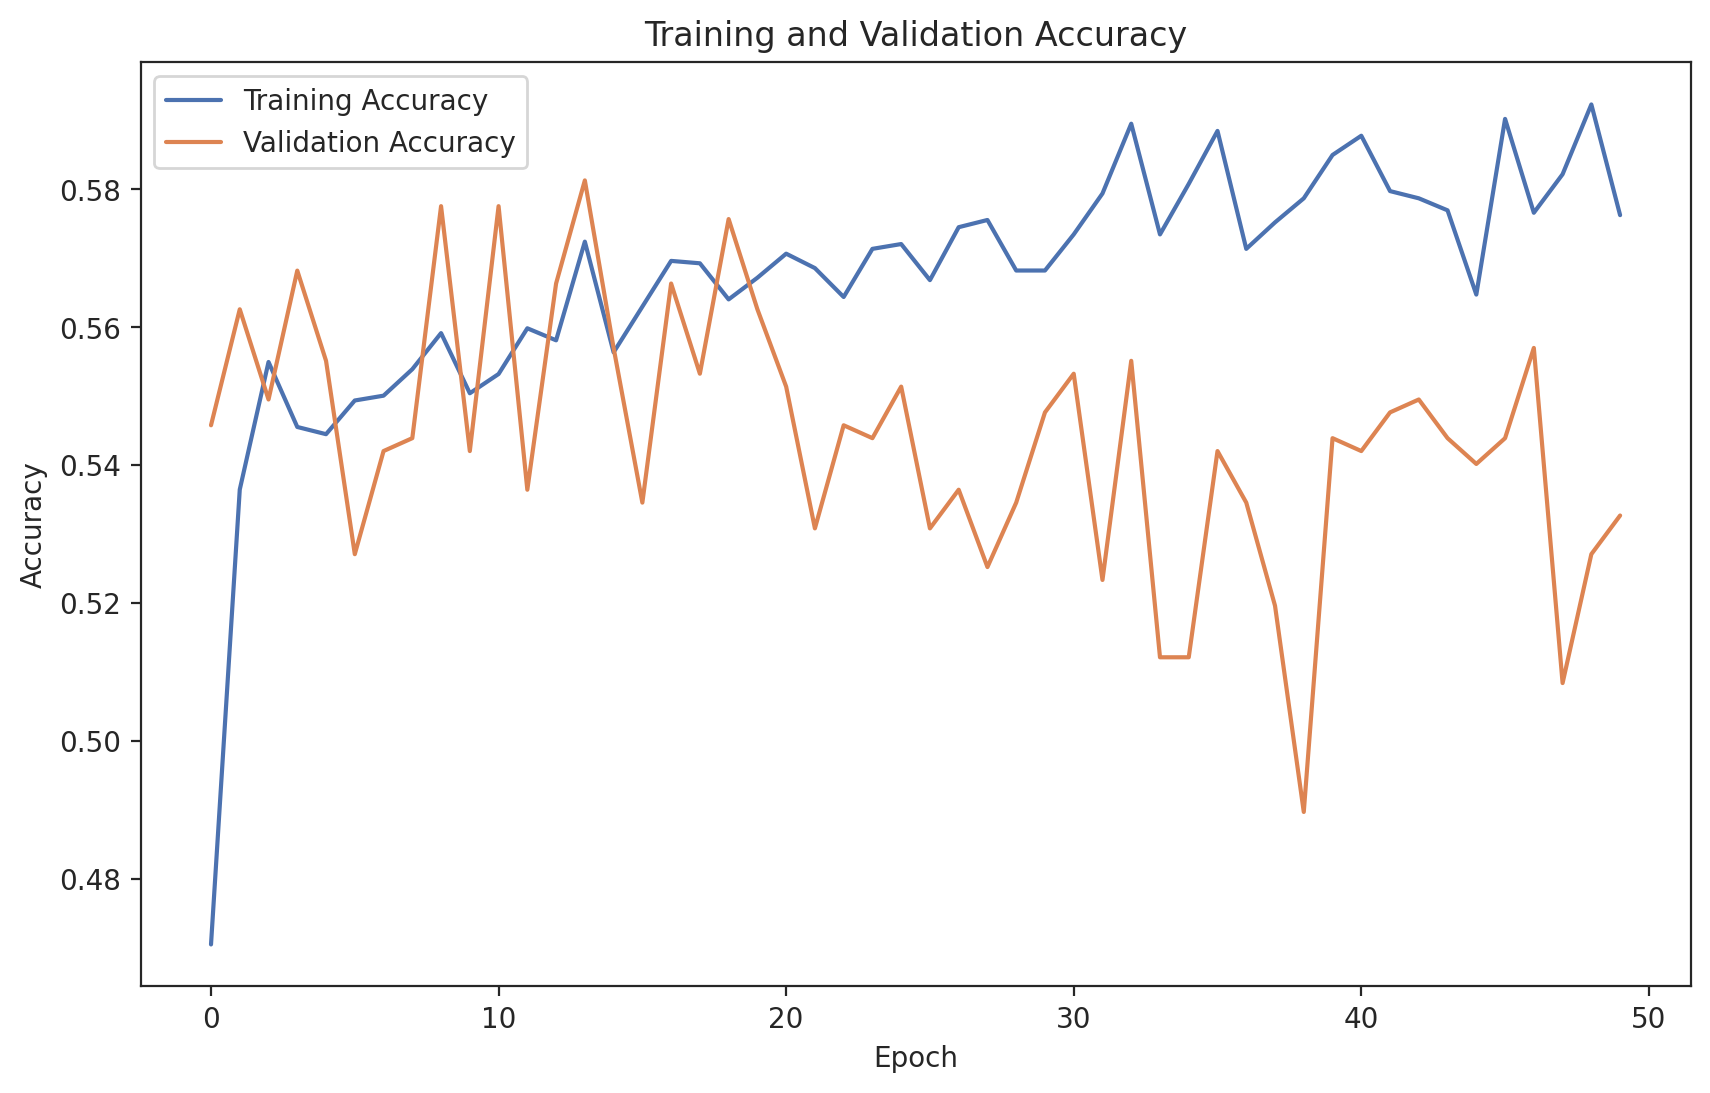

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Convert the Pandas DataFrame to a NumPy array
X_val_scale_array = X_val_scale.values

# Reshape the NumPy array to add the channel dimension
X_val_scale_reshaped = X_val_scale_array.reshape(X_val_scale_array.shape[0], X_val_scale_array.shape[1], 1)


In [ ]:
# Evaluate the model on the validation set
valid_loss, valid_acc = model.evaluate(X_val_scale_reshaped, y_val_encoded)

21/21 [==============================] - 0s 3ms/step - loss: 0.9158 - accuracy: 0.5785


In [ ]:
from sklearn.metrics import classification_report
# Convert probabilities to class labels
y_pred_cnn = model.predict(X_val_scale_reshaped);
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# Now, you can use classification_report with discrete class labels
class_report_cnn = classification_report(y_val_encoded, y_pred_cnn_labels)
print("\nClassification Report:")
print(class_report_cnn)


21/21 [==============================] - 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       210
           1       0.33      0.44      0.38       160
           2       0.72      0.66      0.69       299

    accuracy                           0.58       669
   macro avg       0.57      0.56      0.56       669
weighted avg       0.60      0.58      0.59       669



21/21 [==============================] - 0s 1ms/step


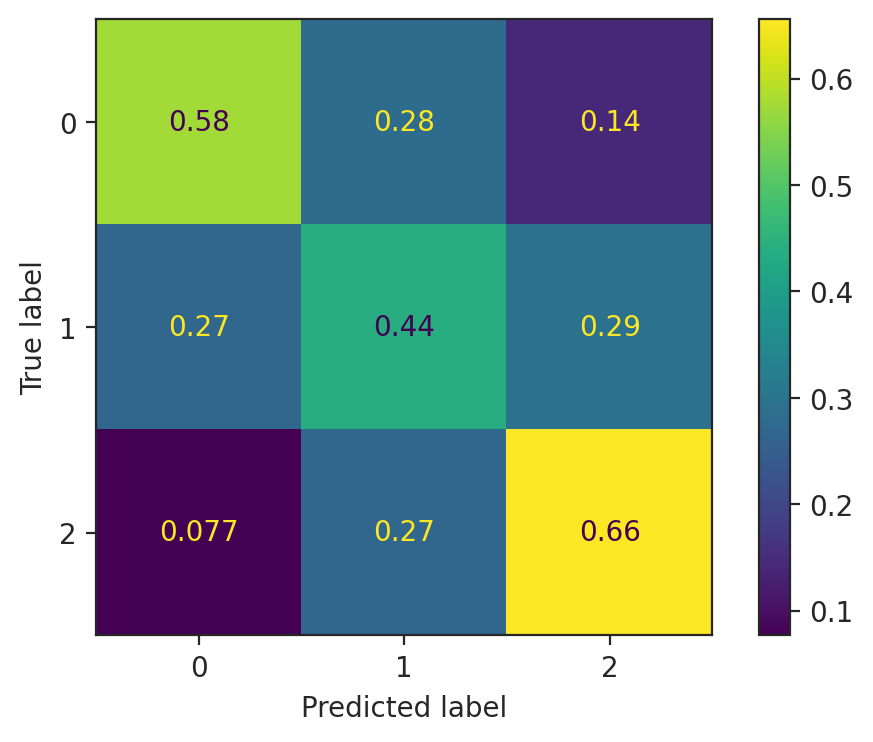

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded,np.argmax(model.predict(X_val_scale_reshaped), axis=1),normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();